Crea un nuevo notebook llamado “PIDA_M4_Nombre_Apellido.ipynb” (Reemplaza Nombre y Apellido por tus datos). Una vez creado importa las librerías que necesitarás para realizar el 1° avance del PI. # type: ignore

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code. 

In [ ]:
data=pd.read_csv('data_latinoamerica.csv',sep=',')

In [3]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

In [4]:
np.shape(data)

(12216057, 50)

Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [ ]:
# Definir una lista de países seleccionados que se desea filtrar en el DataFrame
paises_seleccionados = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame original `data` para crear un nuevo DataFrame llamado `data_latinoamerica`
# que contenga solo los datos de los países que están en la lista `paises_seleccionados`
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


en el script de arriba lo que se hace es una mascara, para filtrar los paises que necesitamos para nuestro analisis


In [8]:
np.shape(data_latinoamerica)

(11970289, 50)

In [9]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>400000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689
population_age_40_49                      1465689
population_age_50_59                      1465689
population_age_60_69                      1465689
population_age_70_79                      1465689


In [10]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','BR','CL','CO','MX','PE'])]

In [11]:
np.shape(data_latinoamerica_paises)

(5946, 50)

Filtra los datos en fechas mayores a 2021-01-01.

In [2]:
data_latinoamerica_paises_fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

NameError: name 'data_latinoamerica_paises' is not defined

In [13]:
data_latinoamerica_paises_fecha.shape


(3744, 50)

Compara a nivel de país para llenar valores faltantes.

In [14]:
# Contamos valores nulos
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()

# Verificar si hay valores nulos mayores a 0
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))


location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.

In [15]:
#usamos un for para completar los valores faltantes con la media de cada pais
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha['new_confirmed']=data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_fecha['new_deceased']=data_latinoamerica_paises_fecha['new_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_fecha['cumulative_confirmed']=data_latinoamerica_paises_fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_fecha['cumulative_deceased']=data_latinoamerica_paises_fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_fecha['rainfall_mm']=data_latinoamerica_paises_fecha['rainfall_mm'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_fecha['relative_humidity']=data_latinoamerica_paises_fecha['relative_humidity'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_fecha['average_temperature_celsius']=data_latinoamerica_paises_fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['minimum_temperature_celsius']=data_latinoamerica_paises_fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['maximum_temperature_celsius']=data_latinoamerica_paises_fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

#llenar con NaN
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_recovered'] = data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)




C:\Users\Usuario\AppData\Local\Temp\ipykernel_22368\89436953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed']=data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22368\89436953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased']=data_latinoamerica_pa

In [16]:
# Contamos valores nulos
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()

# Verificar si hay valores nulos mayores a 0
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.


In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
data_latinoamerica_paises_fecha=pd.read_csv('DatosFinalesFiltrados.csv',sep=',')

In [3]:
data_latinoamerica_paises_fecha.to_csv('DatosFinalesFiltrados.csv', index=False)

In [4]:
data_latinoamerica_paises_fecha.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

In [9]:
paises_seleccionados=['Argentina','Brazil','Chile','Colombia','Mexico','Peru']

# Filtrar las columnas relevantes para el análisis
columnas_interes = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 'relative_humidity', 
    'average_temperature_celsius', 'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Supongamos que tu dataset se llama 'data_latinoamerica_paises_Fecha'

# Crear un diccionario para almacenar las estadísticas de cada país
estadisticas_por_pais = {}

# Bucle para calcular estadísticas descriptivas para cada país
for pais in paises_seleccionados:
    # Filtrar los datos para el país actual
    data_pais = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais]
    
    # Calcular estadísticas descriptivas solo para las columnas relevantes
    estadisticas_pais = data_pais[columnas_interes].describe()
    
    # Guardar las estadísticas en el diccionario
    estadisticas_por_pais[pais] = estadisticas_pais

    # Imprimir las estadísticas para cada país
    print(f"Estadísticas descriptivas para {pais}:\n")
    print(estadisticas_pais)
    print("\n")

# Si se desea, podrías almacenar los resultados en un DataFrame o exportarlos a un archivo CSV


Estadísticas descriptivas para Argentina:

       new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count     624.000000    624.000000          6.240000e+02           624.000000   
mean    12911.385484    134.379032          6.079579e+06        105716.119355   
std     23524.093736    166.009263          2.724206e+06         27515.859661   
min         0.000000      0.000000          1.670634e+06         46688.000000   
25%      1238.000000      8.000000          4.066006e+06         89128.250000   
50%      5223.500000     64.000000          5.322403e+06        116707.000000   
75%     14275.250000    186.250000          9.065860e+06        128689.750000   
max    174174.000000    656.000000          9.697763e+06        129830.000000   

       rainfall_mm  relative_humidity  average_temperature_celsius  \
count   624.000000         624.000000                   624.000000   
mean      1.947172          57.165769                    17.180877   
std       4.90556

In [5]:
# Iterar a través de cada elemento en el DataFrame `data_latinoamerica_paises_fecha`
for i in data_latinoamerica_paises_fecha:
    # Imprimir el nombre de cada columna del DataFrame
    print(i)
    
    # Imprimir un resumen estadístico del DataFrame `data_latinoamerica_paises_fecha`
    print(data_latinoamerica_paises_fecha.describe())
    
    # Imprimir una línea de separación para mejorar la legibilidad de la salida
    print('_________________')


location_key


       new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13930.531008    276.363237          6.780429e+06        192646.443778   
std     24205.550042    507.133193          7.977327e+06        182624.944321   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9

In [7]:
# Obtener un resumen estadístico del DataFrame `data_latinoamerica_paises_fecha`
# Se utiliza el método `describe` para generar estadísticas descriptivas
data_latinoamerica_paises_fecha.describe


<bound method NDFrame.describe of      location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.

In [10]:

# Definir la función para calcular las estadísticas
def calcular_mediana_varianza_rango_por_pais(df, columnas_interes, paises_seleccionados):
    # Crear un DataFrame vacío para almacenar los resultados
    resultados_por_pais = pd.DataFrame()

    # Iterar sobre cada país seleccionado
    for pais in paises_seleccionados:
        # Filtrar los datos del país actual
        df_pais = df[df['country_name'] == pais]
        
        # Cálculo de estadísticas
        mediana = df_pais[columnas_interes].median()
        varianza = df_pais[columnas_interes].var()
        rango = df_pais[columnas_interes].max() - df_pais[columnas_interes].min()
        
        # Crear un DataFrame con los resultados
        df_resultado = pd.DataFrame({
            'Mediana': mediana,
            'Varianza': varianza,
            'Rango': rango
        })
        
        # Añadir una columna para identificar el país
        df_resultado['country_name'] = pais
        
        # Agregar los resultados al DataFrame final
        resultados_por_pais = pd.concat([resultados_por_pais, df_resultado], axis=0)
    
    return resultados_por_pais

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado data_latinoamerica_paises_fecha
resultados_por_pais = calcular_mediana_varianza_rango_por_pais(data_latinoamerica_paises_fecha, columnas_interes, paises_seleccionados)

# Mostrar los resultados en formato de tabla
print(resultados_por_pais)



                                  Mediana      Varianza         Rango  \
new_confirmed                5.223500e+03  5.533830e+08  1.741740e+05   
new_deceased                 6.400000e+01  2.755908e+04  6.560000e+02   
cumulative_confirmed         5.322403e+06  7.421300e+12  8.027129e+06   
cumulative_deceased          1.167070e+05  7.571225e+08  8.314200e+04   
rainfall_mm                  0.000000e+00  2.406458e+01  3.874911e+01   
relative_humidity            5.716577e+01  1.903174e+02  7.097950e+01   
average_temperature_celsius  1.674969e+01  3.866994e+01  2.966049e+01   
minimum_temperature_celsius  9.160859e+00  4.157311e+01  2.929444e+01   
maximum_temperature_celsius  2.534974e+01  3.610196e+01  3.377778e+01   
new_confirmed                3.238200e+04  1.566620e+09  2.989810e+05   
new_deceased                 3.890000e+02  7.560220e+05  4.242000e+03   
cumulative_confirmed         2.188326e+07  6.145807e+13  2.848925e+07   
cumulative_deceased          6.095100e+05  2.239508

AVANCE 2


Importa las librerías que necesites utilizar en este avance.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país.

In [12]:

# Definir la función para calcular medidas estadísticas y correlaciones
def analisis_estadistico_por_pais(df, columnas_interes, paises_seleccionados):
    # Crear un DataFrame vacío para almacenar los resultados
    resultados_por_pais = pd.DataFrame()

    # Iterar sobre cada país seleccionado
    for pais in paises_seleccionados:
        # Filtrar los datos del país actual
        df_pais = df[df['country_name'] == pais]
        
        # Cálculo de estadísticas
        media = df_pais[columnas_interes].mean()
        mediana = df_pais[columnas_interes].median()
        varianza = df_pais[columnas_interes].var()
        desviacion_std = df_pais[columnas_interes].std()
        rango = df_pais[columnas_interes].max() - df_pais[columnas_interes].min()
        
        # Calcular la correlación entre las variables
        correlaciones = df_pais[columnas_interes].corr()
        
        # Crear un DataFrame con los resultados
        df_resultado = pd.DataFrame({
            'Media': media,
            'Mediana': mediana,
            'Varianza': varianza,
            'Desviación Estándar': desviacion_std,
            'Rango': rango
        })
        
        # Añadir una columna para identificar el país
        df_resultado['country_name'] = pais
        
        # Mostrar las correlaciones
        print(f"Correlaciones para {pais}:")
        print(correlaciones)
        print("\n")
        
        # Agregar los resultados al DataFrame final
        resultados_por_pais = pd.concat([resultados_por_pais, df_resultado], axis=0)
    
    return resultados_por_pais

# Ejecutar el análisis estadístico por país
resultados_estadisticos = analisis_estadistico_por_pais(data_latinoamerica_paises_fecha, columnas_interes, paises_seleccionados)

# Mostrar los resultados en formato de tabla
print(resultados_estadisticos)


Correlaciones para Argentina:
                             new_confirmed  new_deceased  \
new_confirmed                     1.000000      0.371832   
new_deceased                      0.371832      1.000000   
cumulative_confirmed             -0.077119     -0.515880   
cumulative_deceased              -0.068289     -0.508430   
rainfall_mm                       0.028134      0.004372   
relative_humidity                 0.017006      0.246158   
average_temperature_celsius       0.260777     -0.130160   
minimum_temperature_celsius       0.252613     -0.090692   
maximum_temperature_celsius       0.249878     -0.167203   

                             cumulative_confirmed  cumulative_deceased  \
new_confirmed                           -0.077119            -0.068289   
new_deceased                            -0.515880            -0.508430   
cumulative_confirmed                     1.000000             0.902346   
cumulative_deceased                      0.902346             1.000000   

In [13]:
# Convertir la columna 'date' del DataFrame `data_latinoamerica_paises_fecha` a un tipo de dato de fecha y hora (datetime)
data_latinoamerica_paises_fecha['date'] = pd.to_datetime(data_latinoamerica_paises_fecha['date'])

# Establecer la columna 'date' como el índice del DataFrame `data_latinoamerica_paises_fecha`
# Esto permite que las operaciones de análisis de series temporales sean más eficientes
data_latinoamerica_paises_fecha.set_index('date', inplace=True)

# Obtener información sobre el DataFrame `data_latinoamerica_paises_fecha`
# Esto incluye el número de entradas, el tipo de datos de cada columna y la cantidad de valores no nulos
data_latinoamerica_paises_fecha.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  

Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. Debes incluir:

Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

Gráficos de barras para comparar diferentes regiones.

Mapas de calor para identificar correlaciones entre diferentes variables.

Gráficos de dispersión para explorar posibles relaciones entre las variables.

Las visualizaciones que puedes realizar son:

Gráficos de barras de países contra el resto de variables.
Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.
Histogramas de las variables que “Sí” tenga cambios de valores.
Diagrama de dispersión de la temperatura media contra los casos confirmados.
Diagrama de dispersión de la temperatura media contra las muertes confirmadas.
Comportamiento de las dosis administradas de todos los países (Valor medio).
Evolución de dosis administradas por mes de cada país.
Muertes por mes de cada país.
 Casos confirmados por mes de cada país.
Recuperaciones de casos por mes de cada país.
Comparación del Número de Casos Nuevos entre Países.
Dosis acumuladas por país
Boxplot de temperatura media de cada país.
Violinplot de las variables que “Sí” tenga cambios de valores.
Distribución de la población por grupos de edad.
Mapa de calor de Métricas por país.
Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.
Matriz de correlación de indicadores demográficos y de salud.
Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

Gráficos de barras de países contra el resto de variables.

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Py

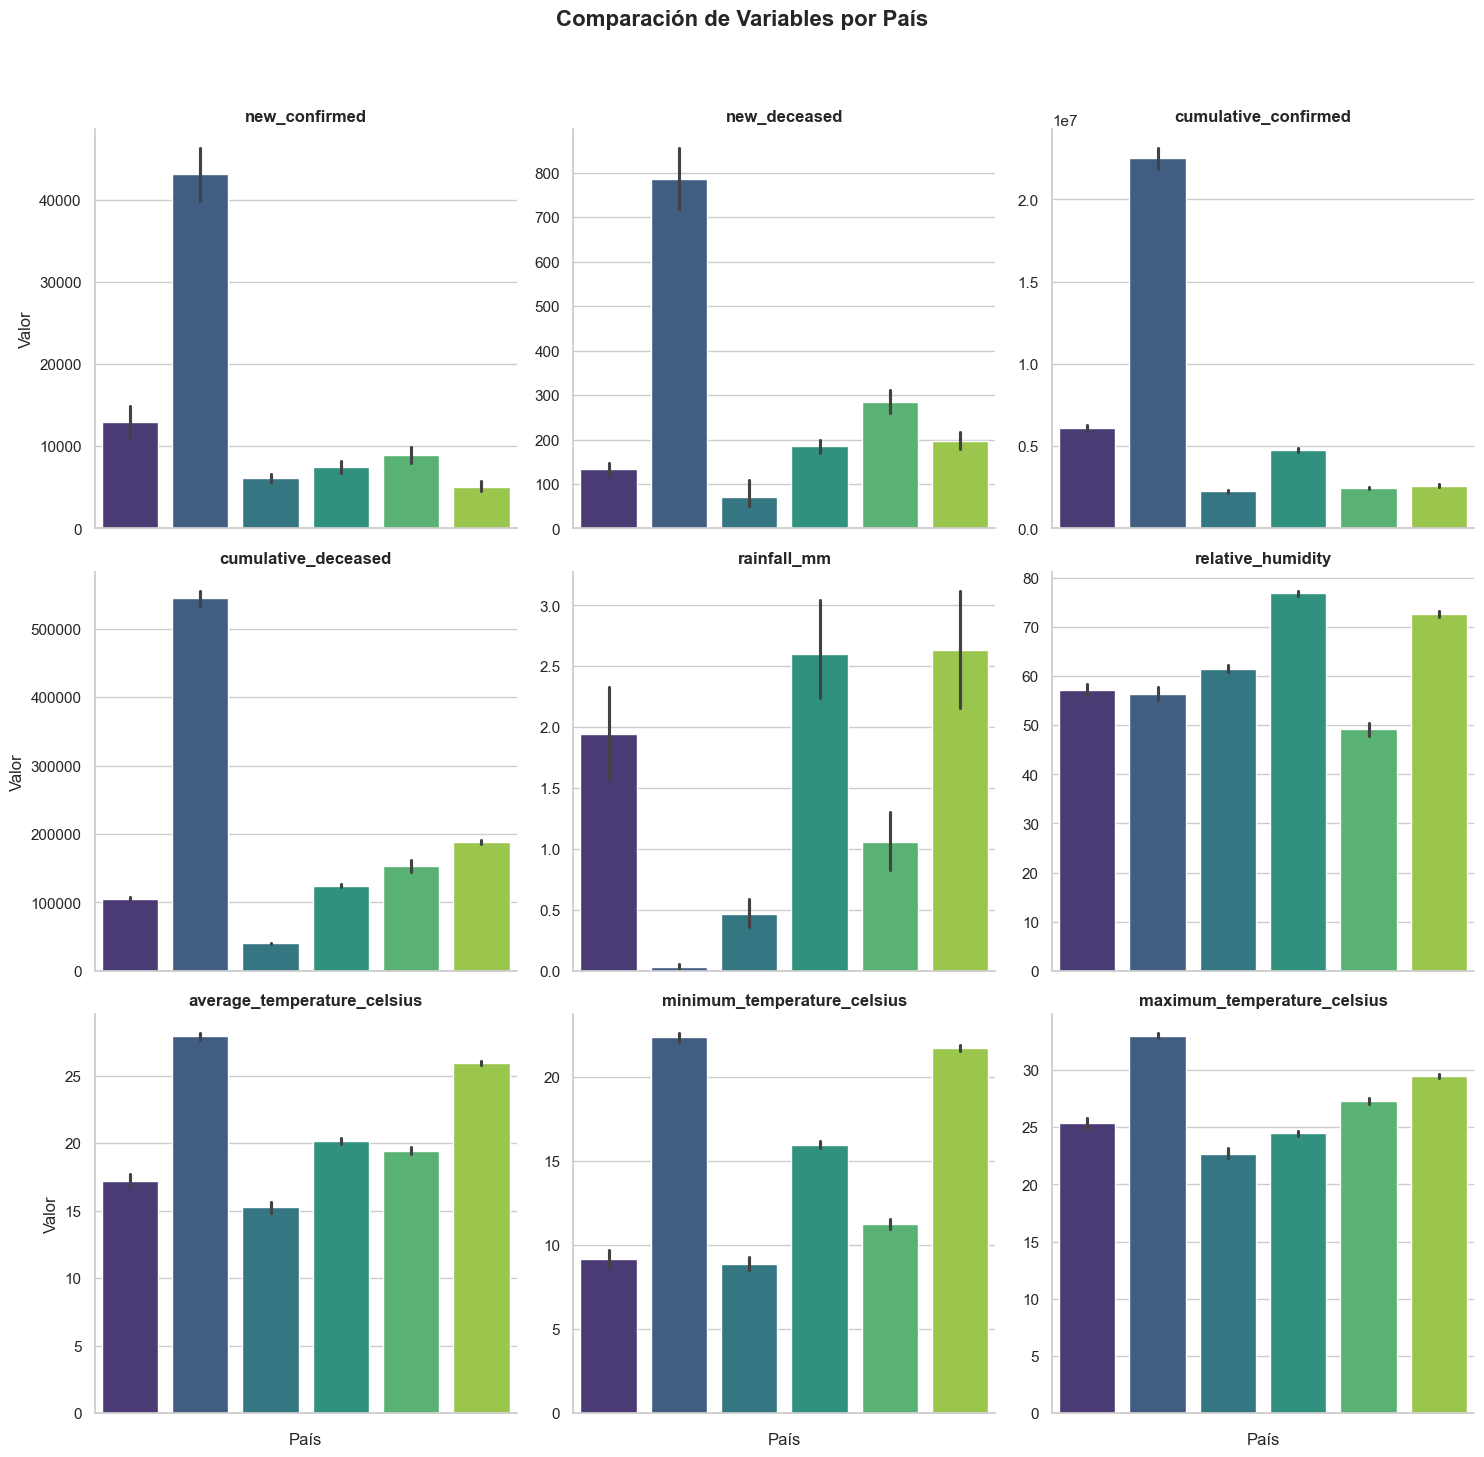

In [14]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Función para graficar barras comparando las variables por país usando FacetGrid
def graficar_estadisticas_por_pais_facetgrid(data_latinoamerica_paises_fecha, columnas_interes):
    # Reorganizar el DataFrame para que tenga una columna con las variables y otra con los valores
    data_melted = data_latinoamerica_paises_fecha.melt(id_vars=['country_name'], 
                                                       value_vars=columnas_interes, 
                                                       var_name='Variable', 
                                                       value_name='Valor')
    
    # Crear la cuadrícula FacetGrid
    g = sns.FacetGrid(data_melted, col='Variable', col_wrap=3, height=5, sharex=True, sharey=False)
    
    # Usar un gráfico de barras para cada gráfico de la cuadrícula
    g.map(sns.barplot, 'country_name', 'Valor', palette='viridis', order=data_melted['country_name'].value_counts().index)
    
    # Ajustar etiquetas y títulos
    g.set_titles("{col_name}", fontsize=14, fontweight='bold')
    g.set_axis_labels("País", "Valor", fontsize=12)
    
    # Ajustar la rotación de las etiquetas del eje x
    g.set_xticklabels(rotation=45, fontsize=10)
    
    # Ajustar el diseño para evitar superposición
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Comparación de Variables por País', fontsize=16, fontweight='bold')
    
    # Mostrar el gráfico
    plt.show()

# Ejecutar la función para graficar las variables por país en una sola hoja
columnas_interes = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 
    'cumulative_deceased', 'rainfall_mm', 'relative_humidity', 
    'average_temperature_celsius', 'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

graficar_estadisticas_por_pais_facetgrid(data_latinoamerica_paises_fecha, columnas_interes)


Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.


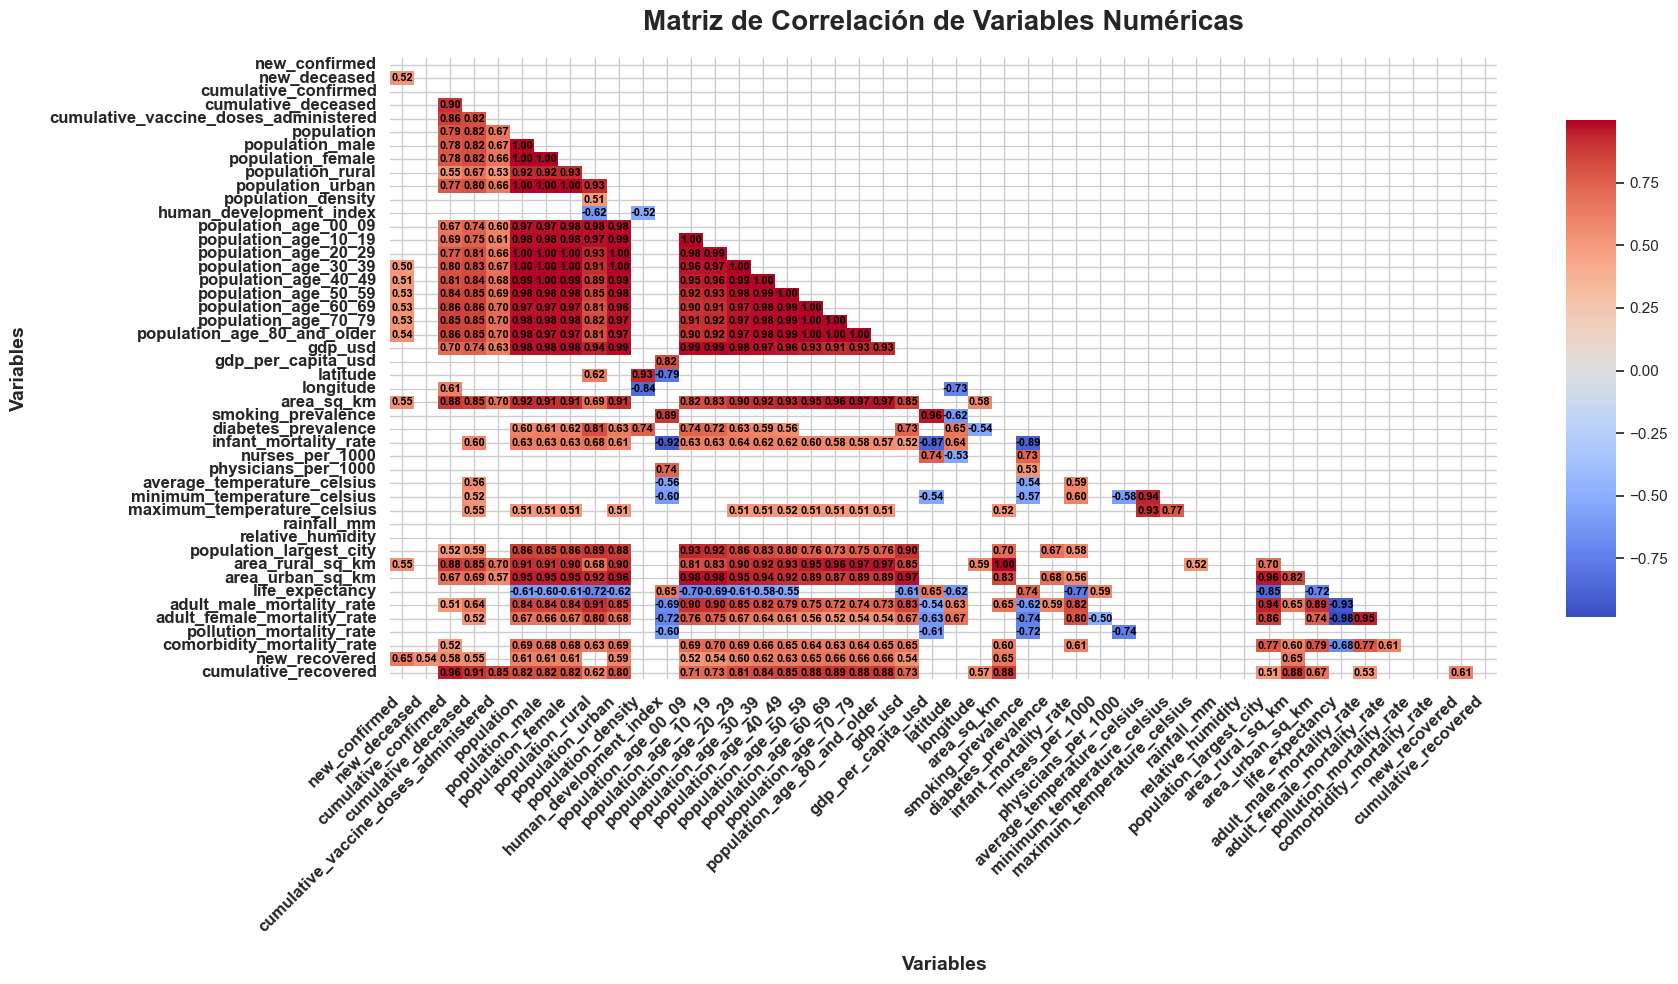

In [15]:

# Seleccionar columnas numéricas y calcular la matriz de correlación
numeric_columns = data_latinoamerica_paises_fecha.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises_fecha[numeric_columns].corr()

# Crear máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Mostrar valores superiores a 0.5
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Configuración de la figura y visualización
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
    annot_kws={"size": 8, "fontweight": "bold", "color": "black"}, cbar_kws={"shrink": 0.8, "aspect": 10}
)

# Título y configuraciones
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=12, rotation=0, fontweight='bold')
plt.xlabel("Variables", fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel("Variables", fontsize=14, labelpad=15, fontweight='bold')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()




Histogramas de las variables que “Sí” tenga cambios de valores.

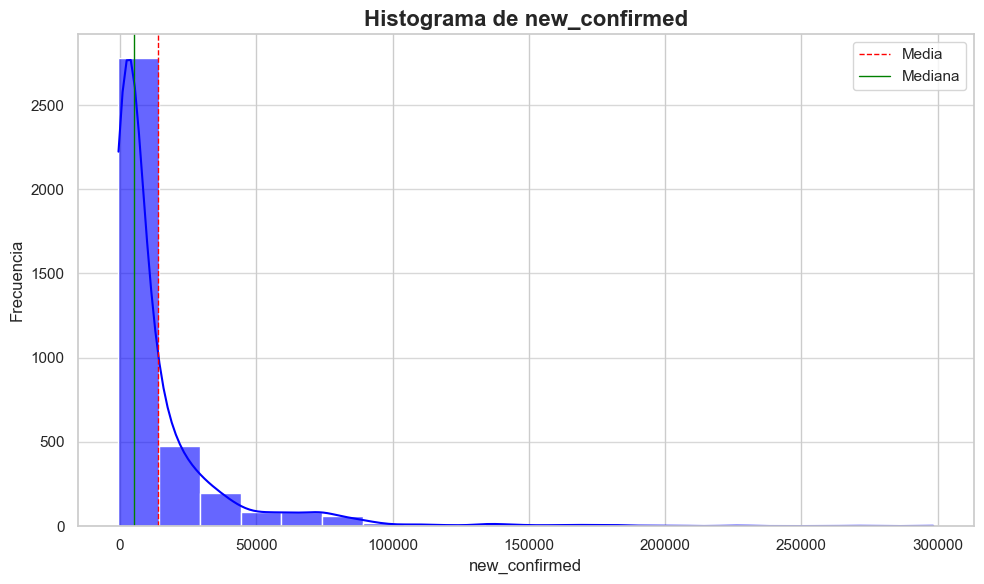

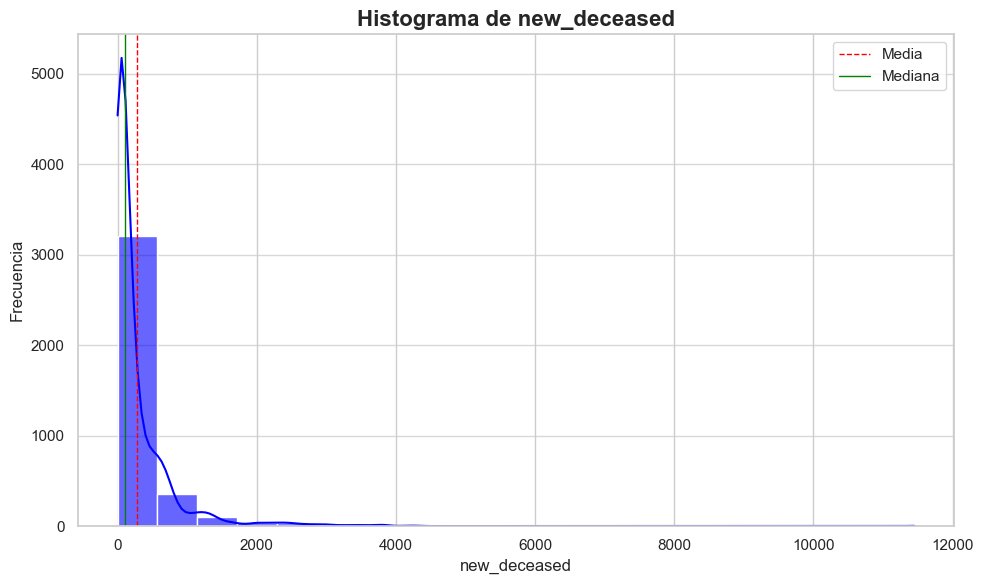

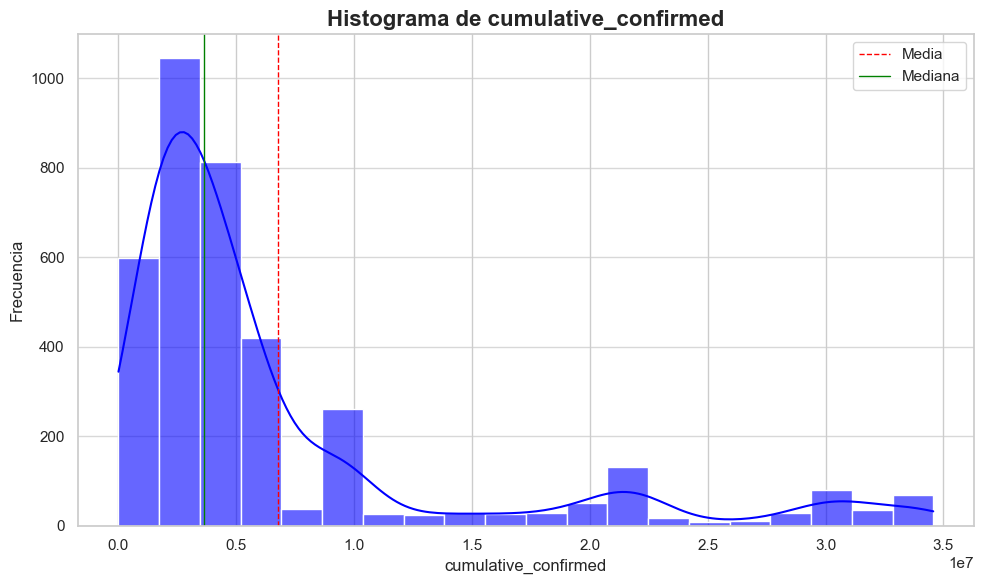

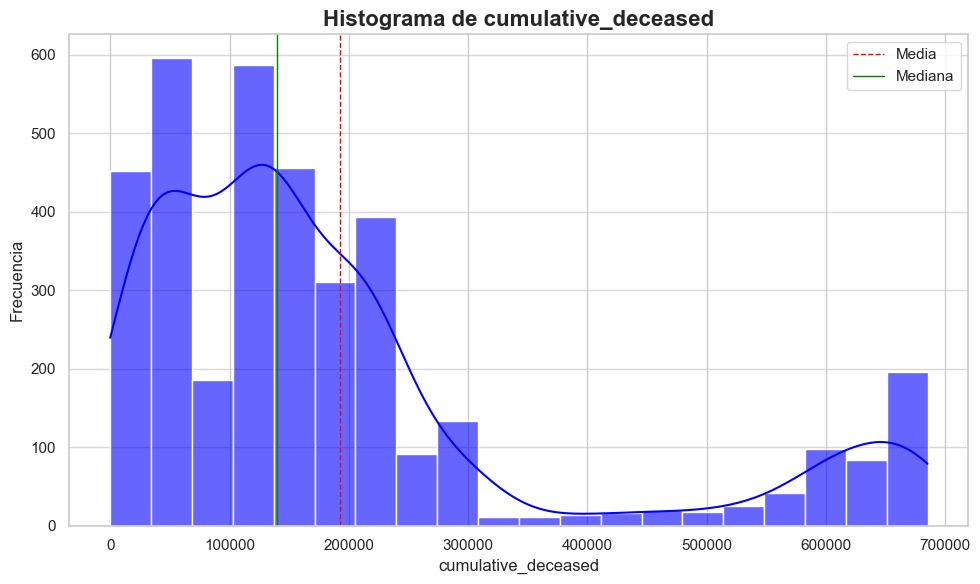

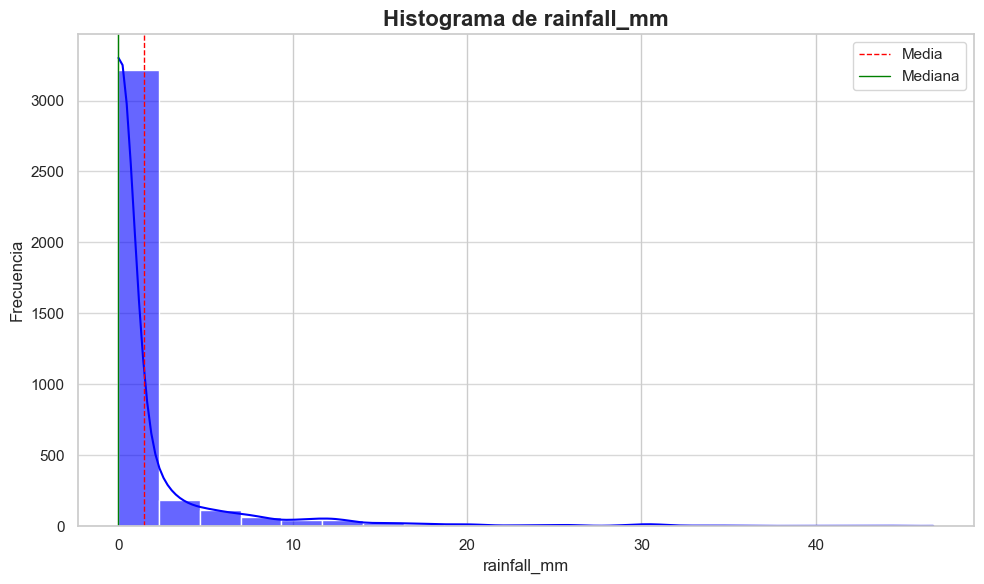

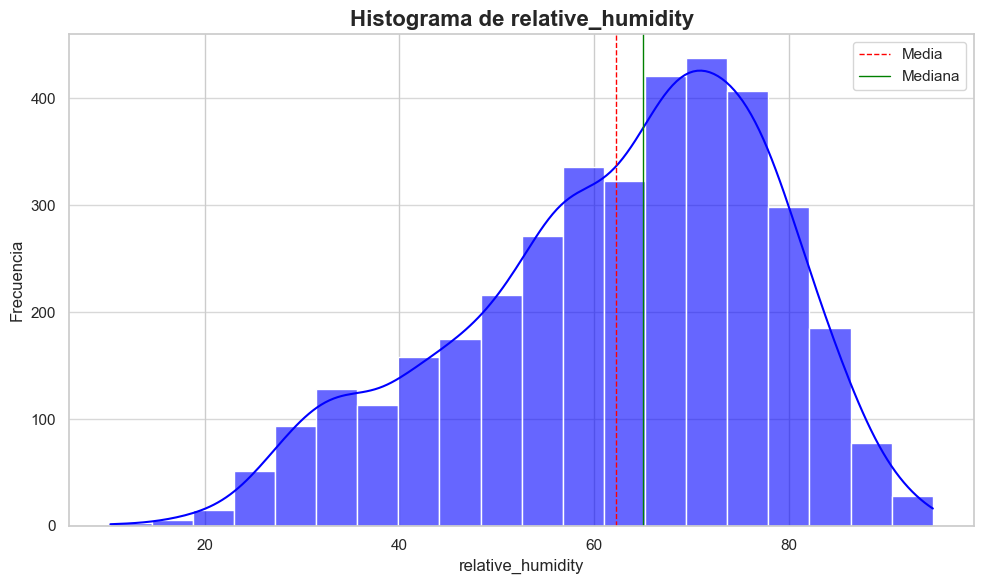

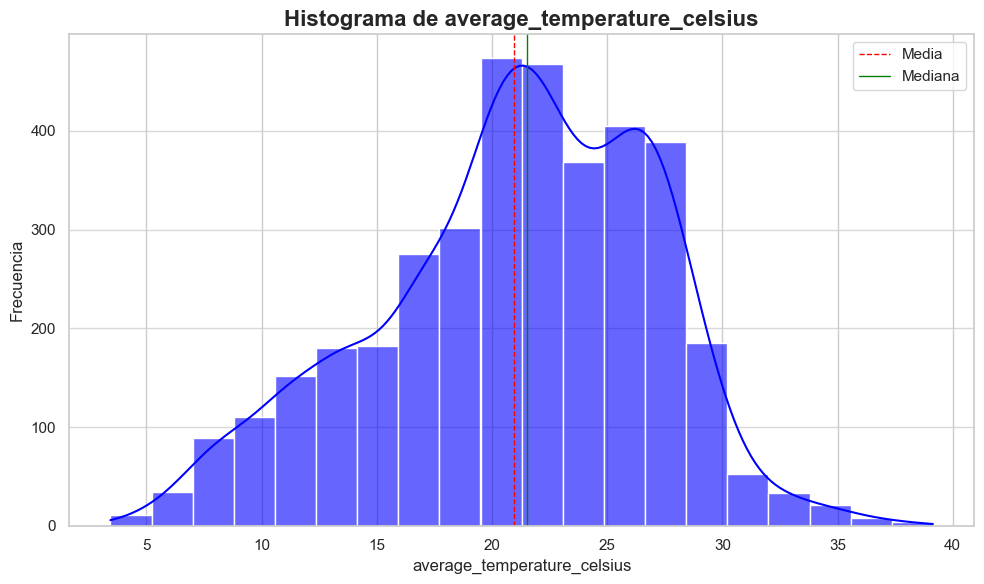

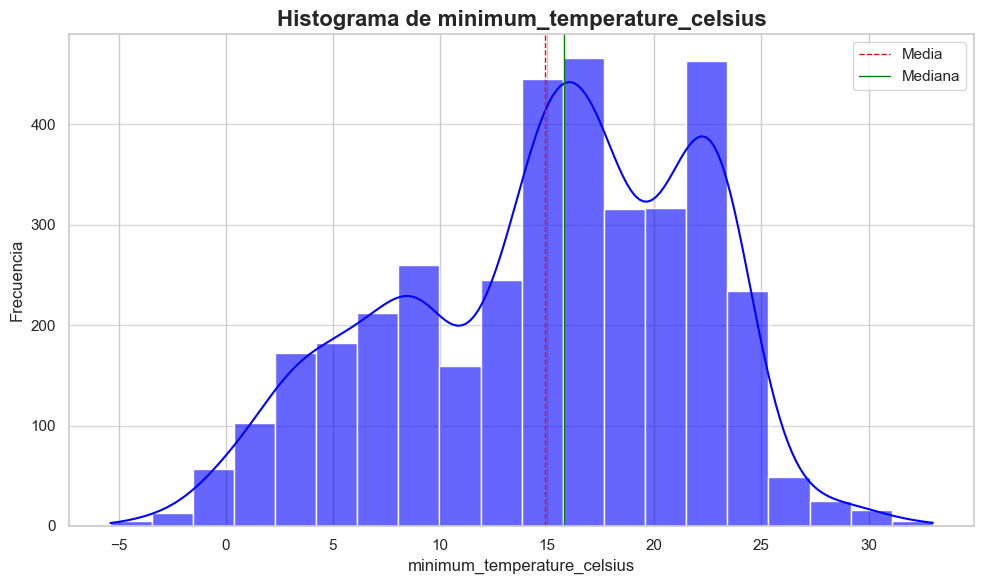

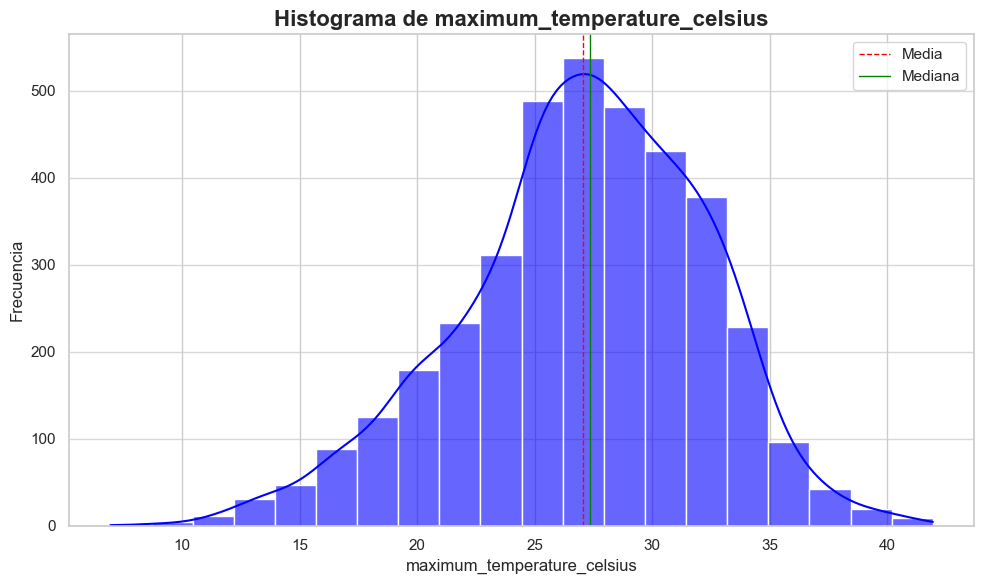

In [16]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Función para generar histogramas de las variables que tienen cambios de valores
def graficar_histogramas(data_latinoamerica_paises_fecha, columnas_interes):
    # Filtrar las columnas que tienen cambios de valores (no son constantes)
    columnas_con_cambios = [col for col in columnas_interes if data_latinoamerica_paises_fecha[col].nunique() > 1]
    
    # Crear un histograma para cada columna que tiene cambios de valores
    for columna in columnas_con_cambios:
        plt.figure(figsize=(10, 6))  # Tamaño del gráfico aumentado para mejor visualización
        sns.histplot(data_latinoamerica_paises_fecha[columna], bins=20, kde=True, color='blue', alpha=0.6)  # Histograma con línea KDE
        plt.title(f'Histograma de {columna}', fontsize=16, fontweight='bold')
        plt.xlabel(columna, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='y', alpha=0.75)  # Añadir grid para facilitar la lectura
        
        # Añadir líneas de referencia para la media y la mediana
        mean_value = data_latinoamerica_paises_fecha[columna].mean()
        median_value = data_latinoamerica_paises_fecha[columna].median()
        
        plt.axvline(mean_value, color='red', linestyle='--', linewidth=1, label='Media')
        plt.axvline(median_value, color='green', linestyle='-', linewidth=1, label='Mediana')
        
        plt.legend()  # Mostrar leyenda
        plt.tight_layout()  # Ajustar el layout para evitar superposición
        plt.show()

# Ejecutar la función con las columnas de interés
columnas_interes = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 
    'cumulative_deceased', 'rainfall_mm', 'relative_humidity', 
    'average_temperature_celsius', 'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Llamar a la función para graficar los histogramas
graficar_histogramas(data_latinoamerica_paises_fecha, columnas_interes)


Diagrama de dispersión de la temperatura media contra los casos confirmados.

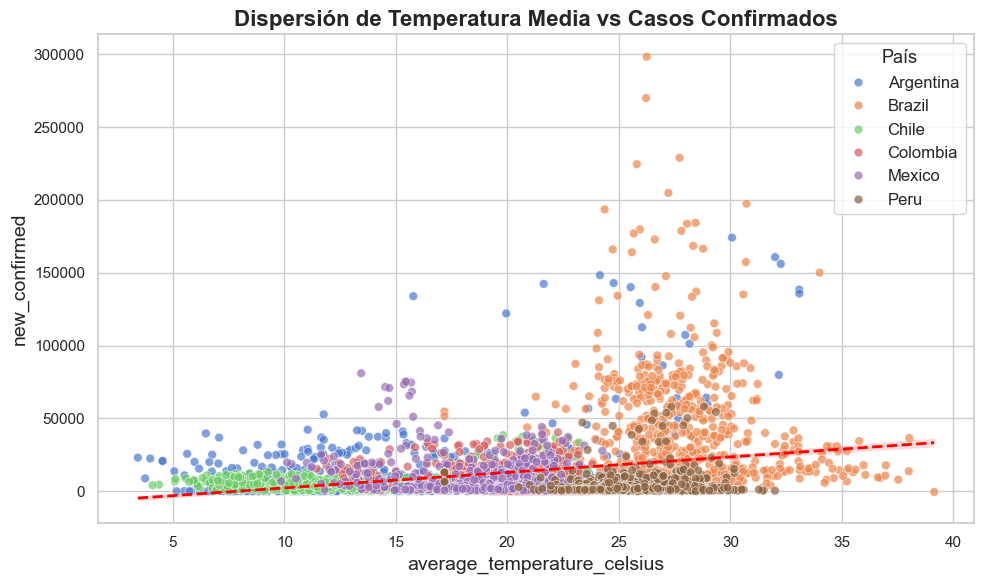

In [17]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Crear el diagrama de dispersión de temperatura media contra los casos confirmados, con distintos colores para cada país
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', 
                y='new_confirmed', 
                data=data_latinoamerica_paises_fecha, 
                hue='country_name',    # Color distintivo por país
                alpha=0.7, 
                edgecolor='w', 
                s=40)  # Tamaño de los puntos y color de borde blanco

# Añadir etiquetas y título
plt.title('Dispersión de Temperatura Media vs Casos Confirmados', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura Media (°C)', fontsize=14)
plt.ylabel('Casos Confirmados Acumulados', fontsize=14)

# Añadir una línea de tendencia
sns.regplot(x='average_temperature_celsius', 
            y='new_confirmed', 
            data=data_latinoamerica_paises_fecha, 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2, 'linestyle': '--', 'label': 'Línea de Tendencia'})

# Añadir leyenda
plt.legend(title="País", fontsize=12, title_fontsize='13')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar superposición
plt.show()


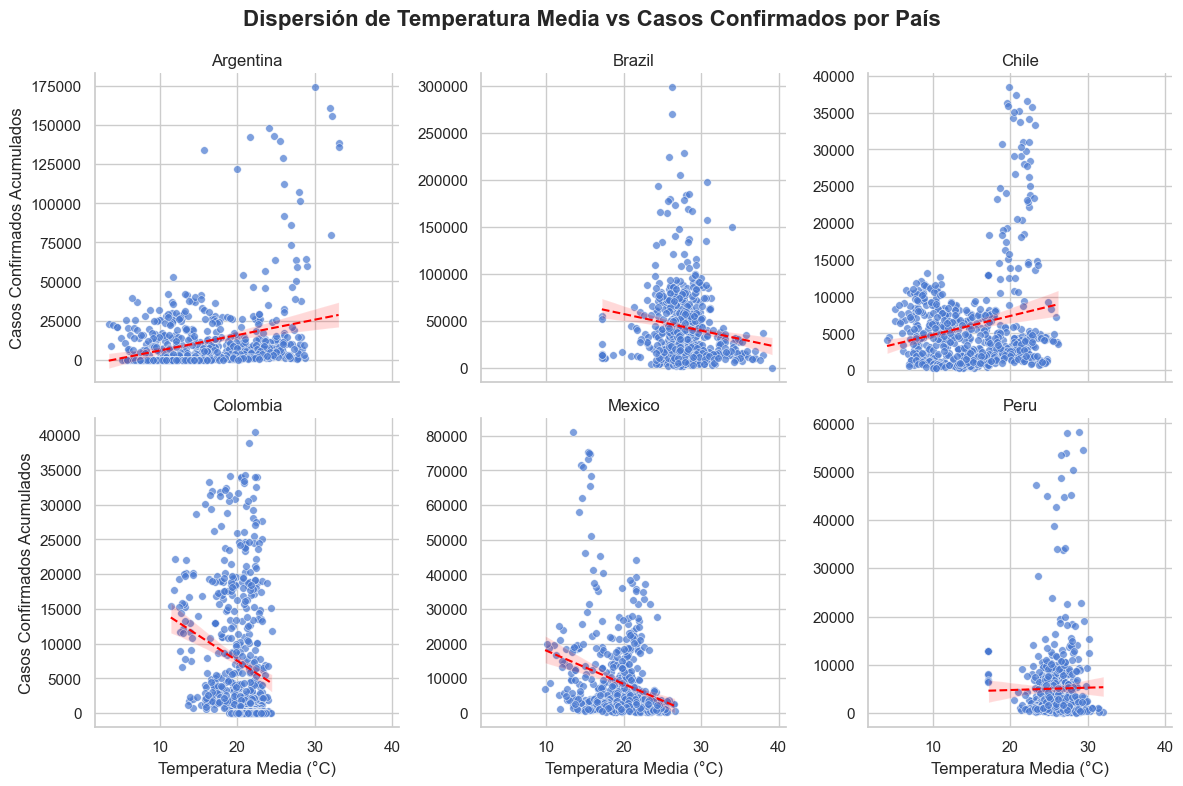

In [40]:

# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Crear un FacetGrid para mostrar cada país por separado con su respectiva línea de tendencia
g = sns.FacetGrid(data_latinoamerica_paises_fecha, col="country_name", col_wrap=3, height=4, sharey=False)

# Agregar gráficos de dispersión y líneas de tendencia a cada país
g.map_dataframe(sns.scatterplot, x='average_temperature_celsius', y='new_confirmed', s=30, alpha=0.7, edgecolor='w')
g.map_dataframe(sns.regplot, x='average_temperature_celsius', y='new_confirmed', scatter=False, color='red',line_kws={'linewidth': 1.5, 'linestyle': '--'})

# Añadir etiquetas y título general
g.set_titles("{col_name}")
g.set_axis_labels("Temperatura Media (°C)", "Casos Confirmados Acumulados")
g.fig.suptitle('Dispersión de Temperatura Media vs Casos Confirmados por País', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # Ajustar para que el título general no se superponga con los gráficos

# Mostrar el gráfico
plt.show()

Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

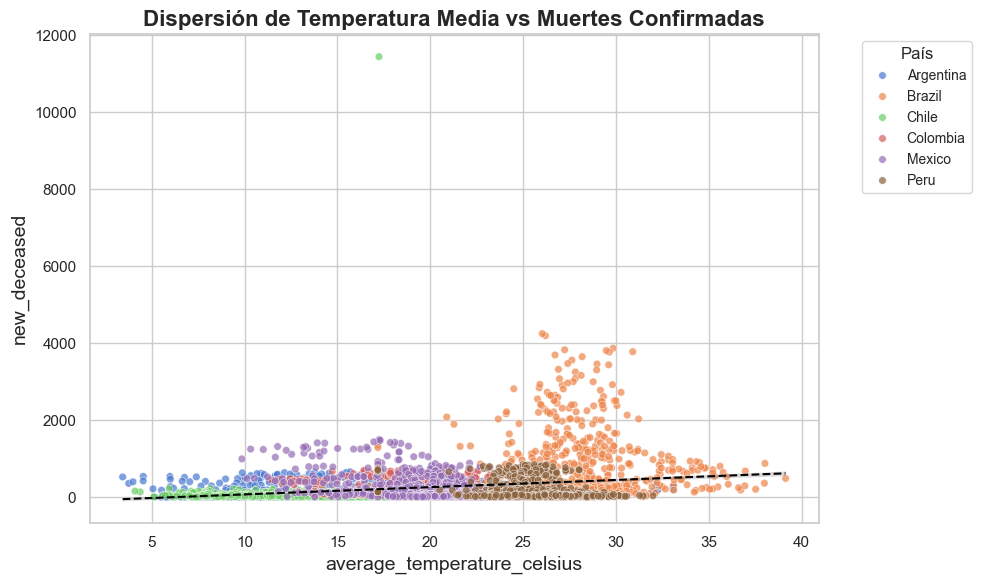

In [18]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted")

# Crear el diagrama de dispersión de temperatura media contra las muertes confirmadas, diferenciando colores por país
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', 
                y='new_deceased', 
                data=data_latinoamerica_paises_fecha, 
                hue='country_name',  # Asigna un color distinto para cada país
                alpha=0.7, 
                edgecolor='w', 
                s=30)  # Tamaño de los puntos y color de borde blanco

# Añadir etiquetas y título
plt.title('Dispersión de Temperatura Media vs Muertes Confirmadas', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura Media (°C)', fontsize=14)
plt.ylabel('Muertes Confirmadas', fontsize=14)

# Añadir una línea de tendencia general (opcional para cada país si se desea también)
sns.regplot(x='average_temperature_celsius', 
            y='new_deceased', 
            data=data_latinoamerica_paises_fecha, 
            scatter=False, 
            color='black', 
            line_kws={'linewidth': 1.5, 'linestyle': '--', 'label': 'Línea de Tendencia General'})

# Añadir leyenda y ajuste de layout
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()  # Ajustar el layout para evitar superposición

# Mostrar el gráfico
plt.show()


Comportamiento de las dosis administradas de todos los países (Valor medio).

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\651778829.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=dosis_media_por_pais, palette='viridis')


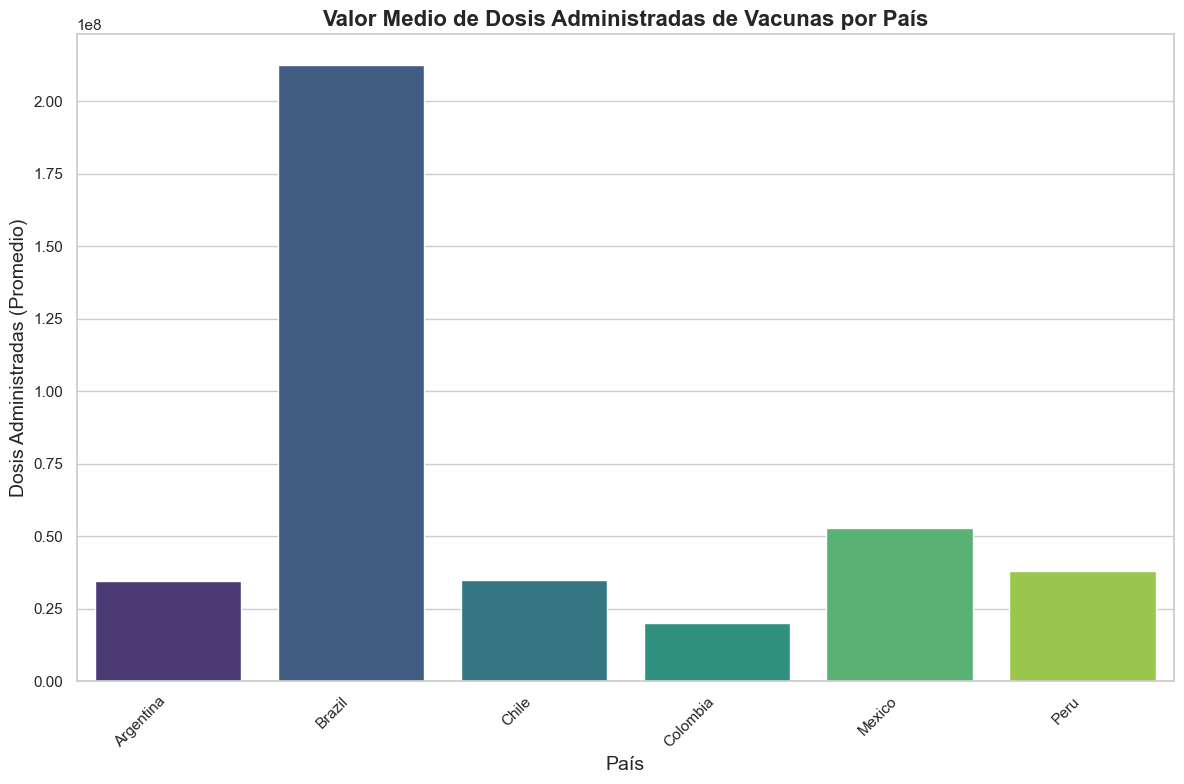

In [19]:

# Calcular el valor medio de dosis administradas por país
dosis_media_por_pais = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()

# Configuración del estilo y colores
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=dosis_media_por_pais, palette='viridis')

# Títulos y etiquetas
plt.title('Valor Medio de Dosis Administradas de Vacunas por País', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Dosis Administradas (Promedio)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotación de etiquetas para mejorar legibilidad

# Ajustes finales y leyenda
plt.tight_layout()
plt.show()



Evolución de dosis administradas por mes de cada país

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\444466293.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dosis_por_mes = data_latinoamerica_paises_fecha.groupby('country_name').resample('M').sum(numeric_only=True)['cumulative_vaccine_doses_administered'].reset_index()


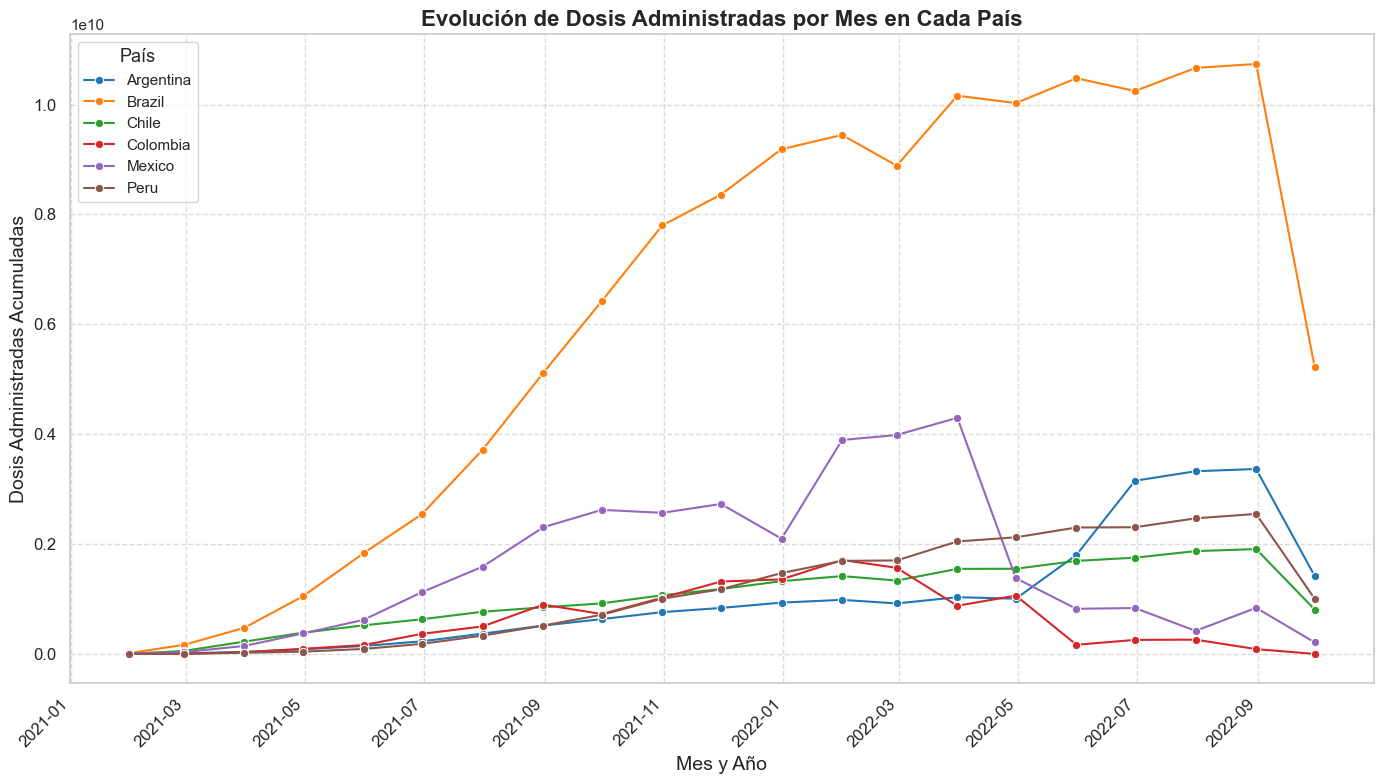

In [20]:

# Agrupar los datos por país y mes sobre el índice de fechas
dosis_por_mes = data_latinoamerica_paises_fecha.groupby('country_name').resample('M').sum(numeric_only=True)['cumulative_vaccine_doses_administered'].reset_index()

# Configuración del gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=dosis_por_mes, 
             x='date', 
             y='cumulative_vaccine_doses_administered', 
             hue='country_name', 
             marker='o', 
             palette='tab10')  # Paleta de colores profesional

# Añadir etiquetas y título
plt.title('Evolución de Dosis Administradas por Mes en Cada País', fontsize=16, fontweight='bold')
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Dosis Administradas Acumuladas', fontsize=14)

# Mejorar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir una cuadrícula para mayor claridad
plt.grid(True, linestyle='--', alpha=0.7)

# Mejorar la leyenda
plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar gráfico
plt.show()


Muertes por mes de cada país.


El país que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\1702845060.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


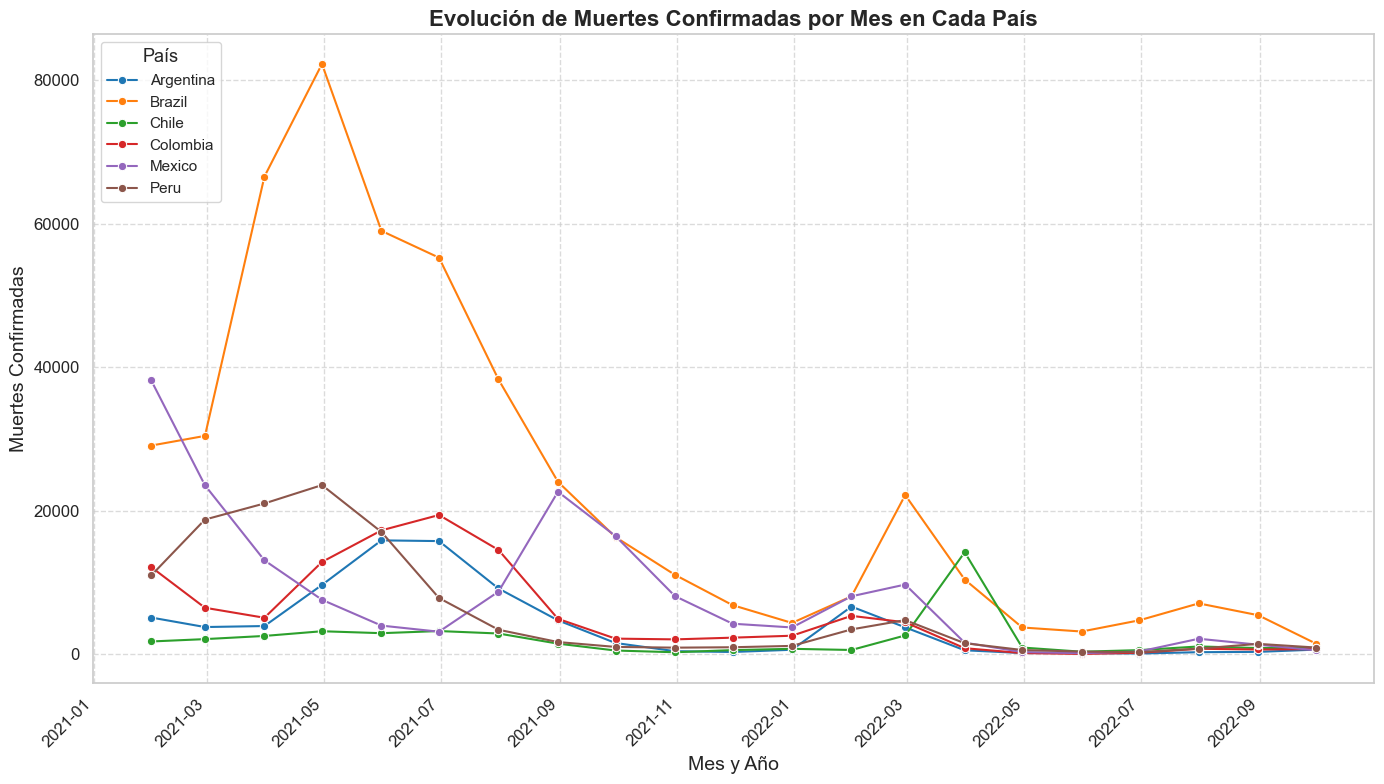

In [21]:
# Asegurarse de que el índice 'date' esté en formato datetime
data_latinoamerica_paises_fecha.index = pd.to_datetime(data_latinoamerica_paises_fecha.index, format='%Y-%m-%d')

# Agrupar por país y mes sobre el índice de fechas y sumar las muertes confirmadas
muertes_por_mes = (
    data_latinoamerica_paises_fecha
    .groupby('country_name')
    .resample('M')
    .sum(numeric_only=True)['new_deceased']
    .reset_index()
)

# Configuración del gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=muertes_por_mes, 
             x='date', 
             y='new_deceased', 
             hue='country_name', 
             marker='o', 
             palette='tab10')  # Paleta de colores profesional

# Añadir etiquetas y título
plt.title('Evolución de Muertes Confirmadas por Mes en Cada País', fontsize=16, fontweight='bold')
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Muertes Confirmadas', fontsize=14)

# Mejorar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir una cuadrícula para mayor claridad
plt.grid(True, linestyle='--', alpha=0.7)

# Mejorar la leyenda
plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar gráfico
plt.show()


 Casos confirmados por mes de cada país.

El país que más casos confirmados ha tenido es Brasil. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\4000405834.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\4000405834.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\4000405834.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\4000405834.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais.resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(
C:\Users

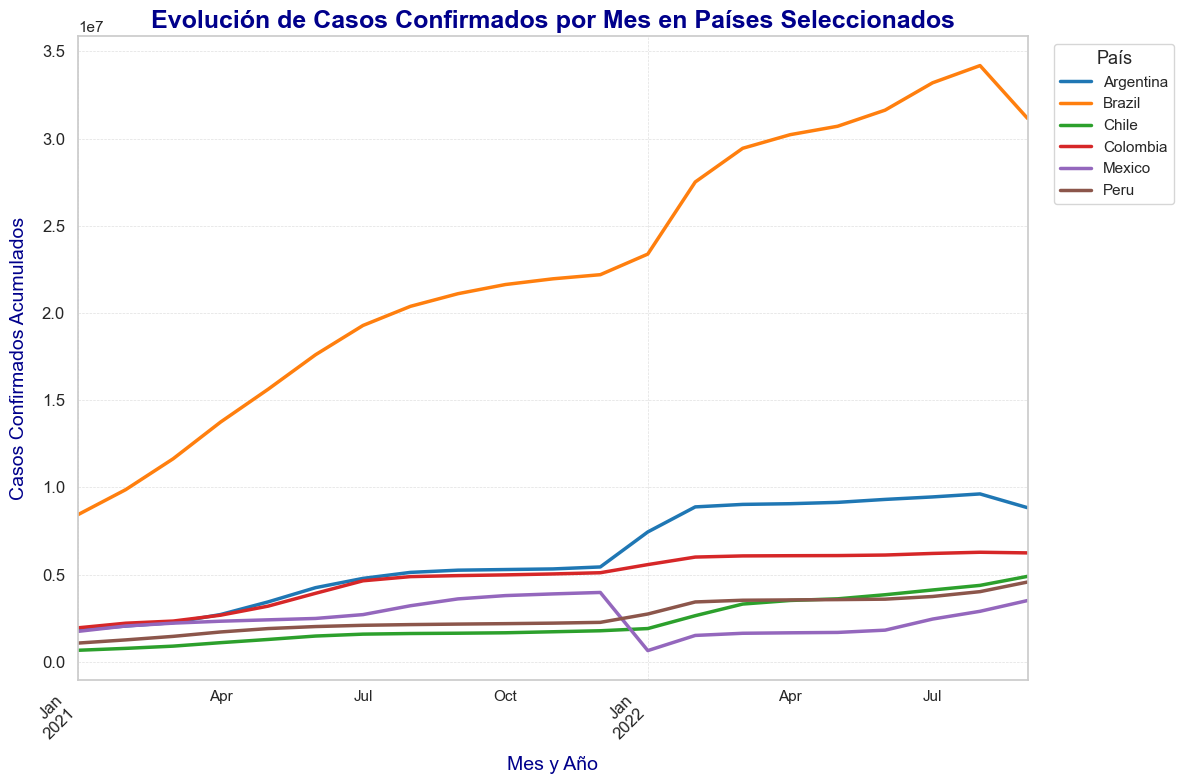

In [22]:

# Configuración de estilo de gráficos
sns.set(style="whitegrid")
colores = sns.color_palette("tab10", len(paises_seleccionados))  # Paleta profesional y distintiva

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar cada país con un color diferente y línea de tendencia
for i, pais in enumerate(paises_seleccionados):
    data_pais = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais]
    data_pais.resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot(
        ax=ax, 
        color=colores[i], 
        linewidth=2.5, 
        label=pais
    )

# Título y etiquetas
plt.title('Evolución de Casos Confirmados por Mes en Países Seleccionados', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Mes y Año', fontsize=14, labelpad=10, color='darkblue')
plt.ylabel('Casos Confirmados Acumulados', fontsize=14, labelpad=10, color='darkblue')

# Leyenda mejorada
plt.legend(title='País', title_fontsize=13, fontsize=11, loc='upper left', bbox_to_anchor=(1.02, 1))

# Etiquetas del eje X en ángulo
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir cuadrícula suave y sutil para visualización
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Ajuste final de diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

Recuperaciones de casos por mes de cada país.

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2133667878.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean(numeric_only=True)['cumulative_recovered'] \
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2133667878.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean(numeric_only=True)['cumulative_recovered'] \
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2133667878.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean(numeric_only=True)['cumulative_recovered'] \
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2133667878.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean(numeric_only=True)['cumulative_recovered'] \
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\213366787

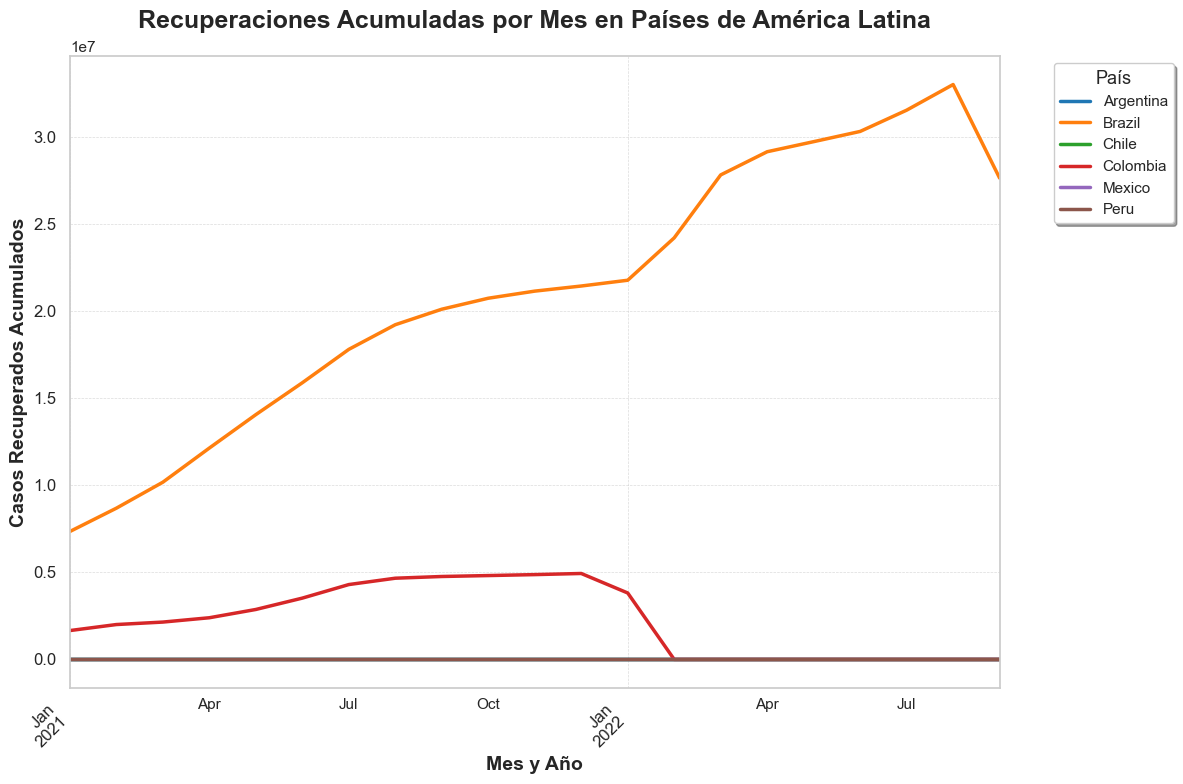

In [23]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico y el estilo
fig, ax = plt.subplots(figsize=(12, 8))
colores = plt.cm.tab10(range(len(paises_seleccionados)))  # Usar una paleta de colores llamativos

# Graficar los datos para cada país seleccionado
for i, pais in enumerate(paises_seleccionados):
    data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais] \
        .resample('M').mean(numeric_only=True)['cumulative_recovered'] \
        .plot(ax=ax, label=pais, color=colores[i], linewidth=2.5)

# Título y etiquetas de los ejes
plt.title('Recuperaciones Acumuladas por Mes en Países de América Latina', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Mes y Año', fontsize=14, fontweight='bold')
plt.ylabel('Casos Recuperados Acumulados', fontsize=14, fontweight='bold')

# Personalización de la leyenda
plt.legend(
    title='País', title_fontsize=13, fontsize=11,
    loc='upper left', bbox_to_anchor=(1.05, 1),
    fancybox=True, shadow=True, frameon=True
)

# Mejorar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Cuadrícula mejorada
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Comparación del Número de Casos Nuevos entre Países.



De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2505068639.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais = data_pais.resample('M').mean(numeric_only=True)  # Resample y media mensual


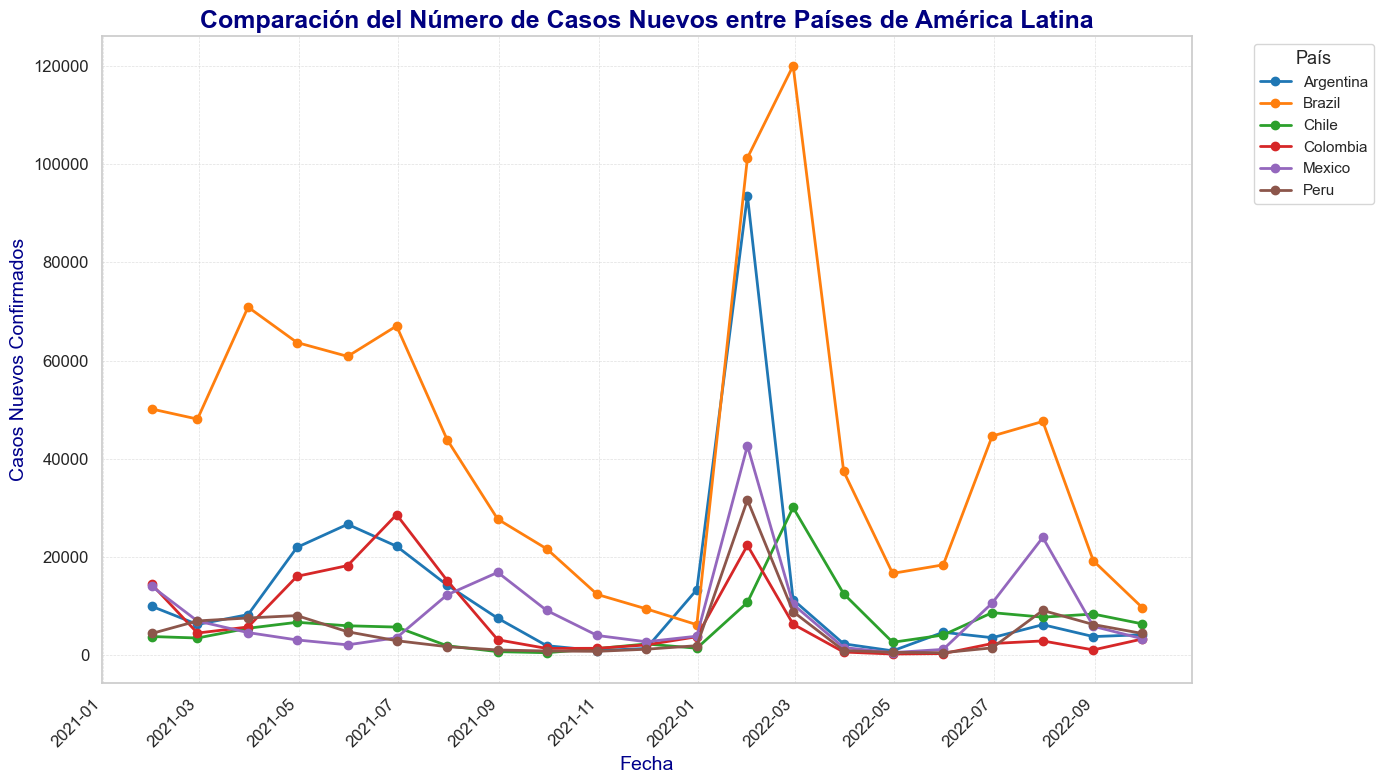

In [24]:
# Configuración de estilo y colores llamativos
sns.set(style="whitegrid", palette="tab10")
fig, ax = plt.subplots(figsize=(14, 8))

# Trazar cada país con colores diferentes y leyenda personalizada
for pais in paises_seleccionados:
    data_pais = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais]
    data_pais = data_pais.resample('M').mean(numeric_only=True)  # Resample y media mensual
    ax.plot(data_pais.index, data_pais['new_confirmed'], label=pais, marker='o', linewidth=2)

# Personalización de etiquetas y título
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Fecha', fontsize=14, color='darkblue')
plt.ylabel('Casos Nuevos Confirmados', fontsize=14, color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Mejorar la leyenda y su ubicación
plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1.05, 1))

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()



Dosis acumuladas por país

De los paises que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2783983539.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


<Figure size 1200x800 with 0 Axes>

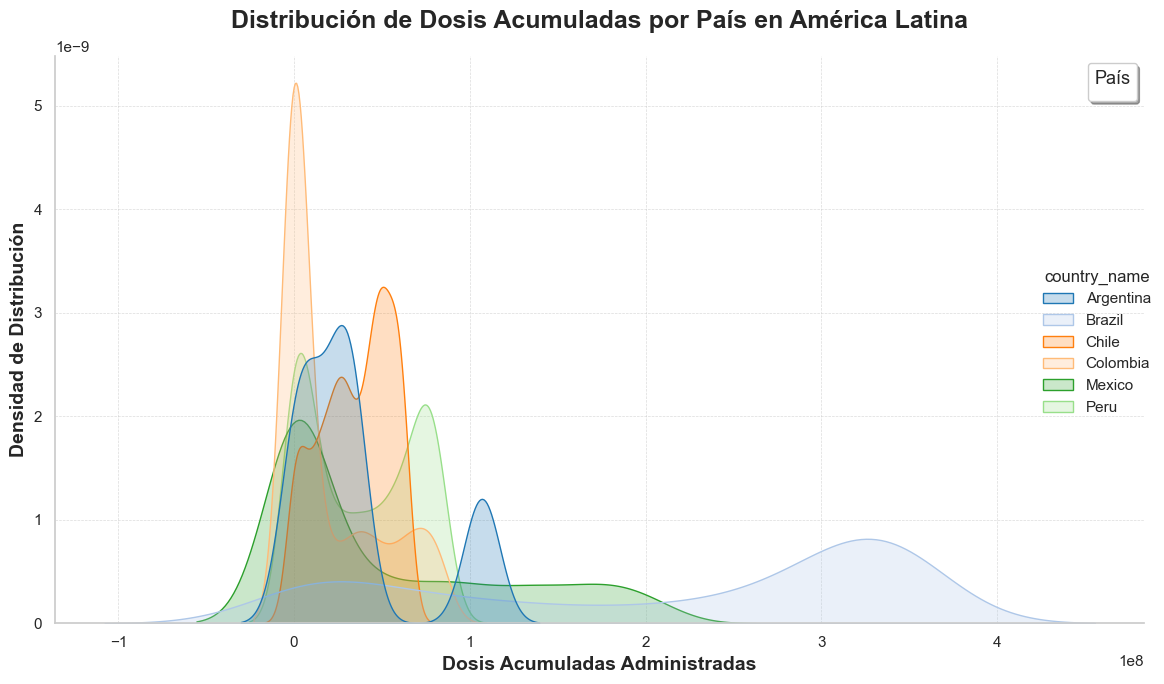

In [26]:
# Configuración del estilo y colores de Seaborn
sns.set_style("whitegrid")
palette = sns.color_palette("tab20", len(data_latinoamerica_paises_fecha['country_name'].unique()))

# Crear el gráfico KDE con mejoras visuales
plt.figure(figsize=(12, 8))
sns.displot(
    data=data_latinoamerica_paises_fecha,
    x="cumulative_vaccine_doses_administered",
    hue="country_name",
    kind="kde",
    fill=True,
    palette=palette,
    height=7,
    aspect=1.5
)

# Personalización del título y etiquetas de los ejes
plt.title('Distribución de Dosis Acumuladas por País en América Latina', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Dosis Acumuladas Administradas', fontsize=14, fontweight='bold')
plt.ylabel('Densidad de Distribución', fontsize=14, fontweight='bold')

# Ajustes de la leyenda
plt.legend(
    title='País', title_fontsize=13, fontsize=11, loc='upper right',
    fancybox=True, shadow=True, frameon=True
)

# Mejorar el diseño y mostrar el gráfico
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



Boxplot de temperatura media de cada país.

Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises.

Esto poco a poco nos ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada.
Seguiremos viendo como se comportan las variables de a traves de violinplots.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\3812227517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_latinoamerica_paises_fecha,


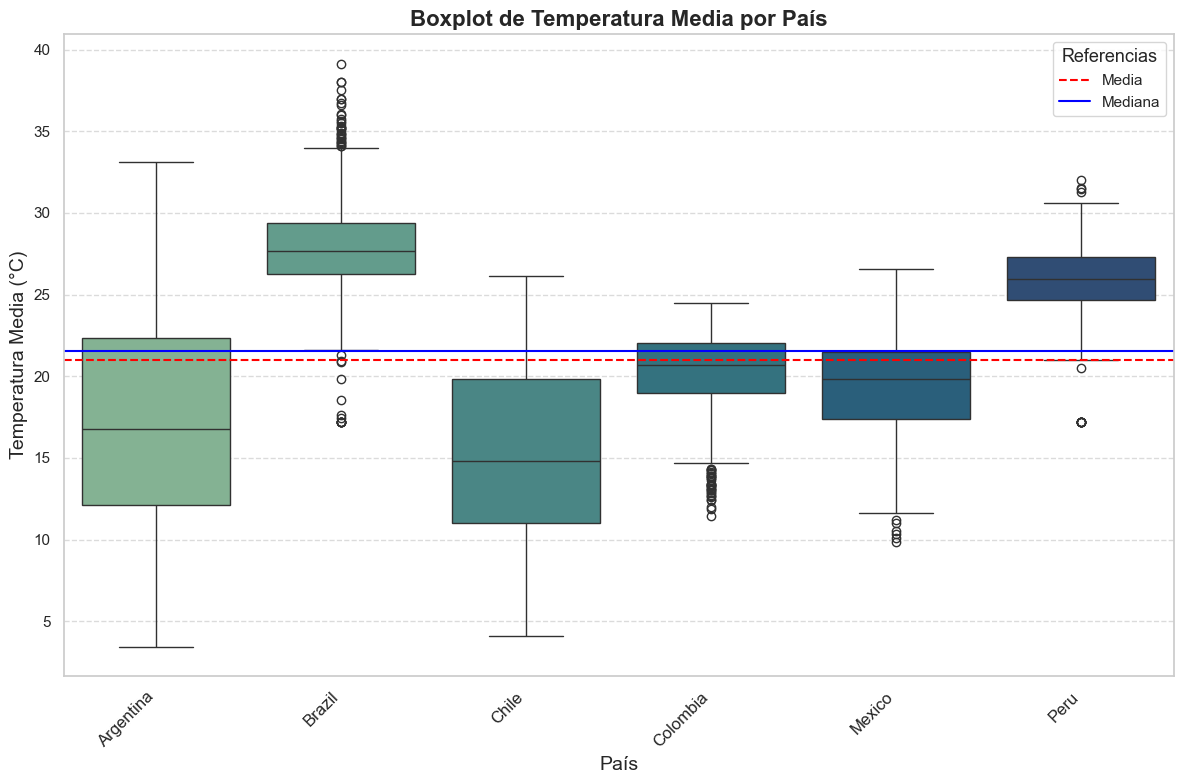

In [27]:

# Crear el boxplot de temperatura media por país
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_latinoamerica_paises_fecha, 
            x='country_name', 
            y='average_temperature_celsius', 
            palette="crest")  # Paleta de colores más profesional

# Título y etiquetas de los ejes
plt.title('Boxplot de Temperatura Media por País', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Temperatura Media (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir líneas de referencia para la media y la mediana
mean_temp = data_latinoamerica_paises_fecha['average_temperature_celsius'].mean()
median_temp = data_latinoamerica_paises_fecha['average_temperature_celsius'].median()
plt.axhline(mean_temp, color='red', linestyle='--', label='Media', linewidth=1.5)
plt.axhline(median_temp, color='blue', linestyle='-', label='Mediana', linewidth=1.5)

# Mejorar la leyenda
plt.legend(title='Referencias', title_fontsize='13', fontsize='11', loc='upper right')

# Añadir cuadrícula horizontal para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Violinplot de las variables que “Sí” tenga cambios de valores.

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Py

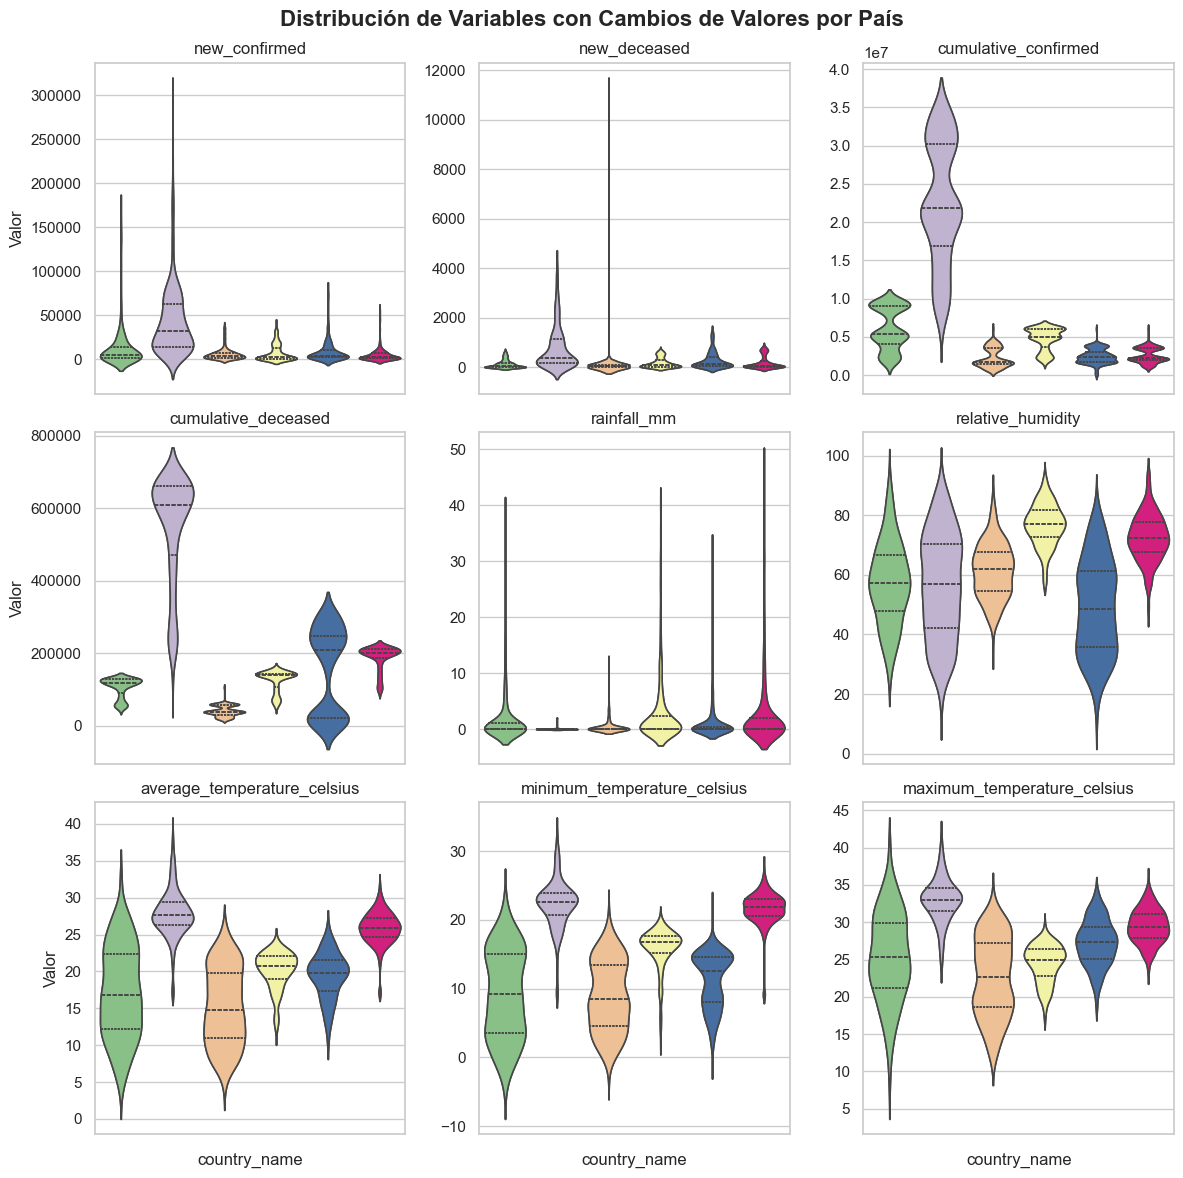

In [28]:
# Filtrar las columnas que tienen cambios de valores (más de un valor único)
columnas_con_cambios = [col for col in columnas_interes if data_latinoamerica_paises_fecha[col].nunique() > 1]

# Convertir el DataFrame al formato largo para FacetGrid
data_largo = data_latinoamerica_paises_fecha.melt(id_vars=['country_name'], 
                                                  value_vars=columnas_con_cambios, 
                                                  var_name='Variable', 
                                                  value_name='Valor')

# Crear FacetGrid para mostrar todos los gráficos de violín en una misma imagen
g = sns.FacetGrid(data_largo, col="Variable", col_wrap=3, height=4, sharey=False, despine=False)
g.map(sns.violinplot, "country_name", "Valor", palette="Accent", order=data_latinoamerica_paises_fecha['country_name'].unique(), inner="quartile", linewidth=1.2)

# Ajustar etiquetas y título
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_axis_labels("País", "Valor")
g.set_titles("{col_name}", fontsize=12)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Variables con Cambios de Valores por País", fontsize=16, fontweight='bold')

# Mejorar la cuadrícula y el diseño
g.map_dataframe(sns.violinplot, x="country_name", y="Valor", inner="quartile", linewidth=1.2, palette="Accent")

# Mostrar el gráfico
plt.show()


Distribución de la población por grupos de edad.

In [29]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises_fecha[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09           72354498.0
population_age_10_19           75821668.0
population_age_20_29           75953404.0
population_age_30_39           72153175.0
population_age_40_49           59596656.0
population_age_50_59           47961620.0
population_age_60_69           32654396.0
population_age_70_79           17789478.0
population_age_80_and_older     8711719.0
dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18872\3978295391.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Grupos de Edad', fontsize=12, title_fontsize=13, loc='upper right')


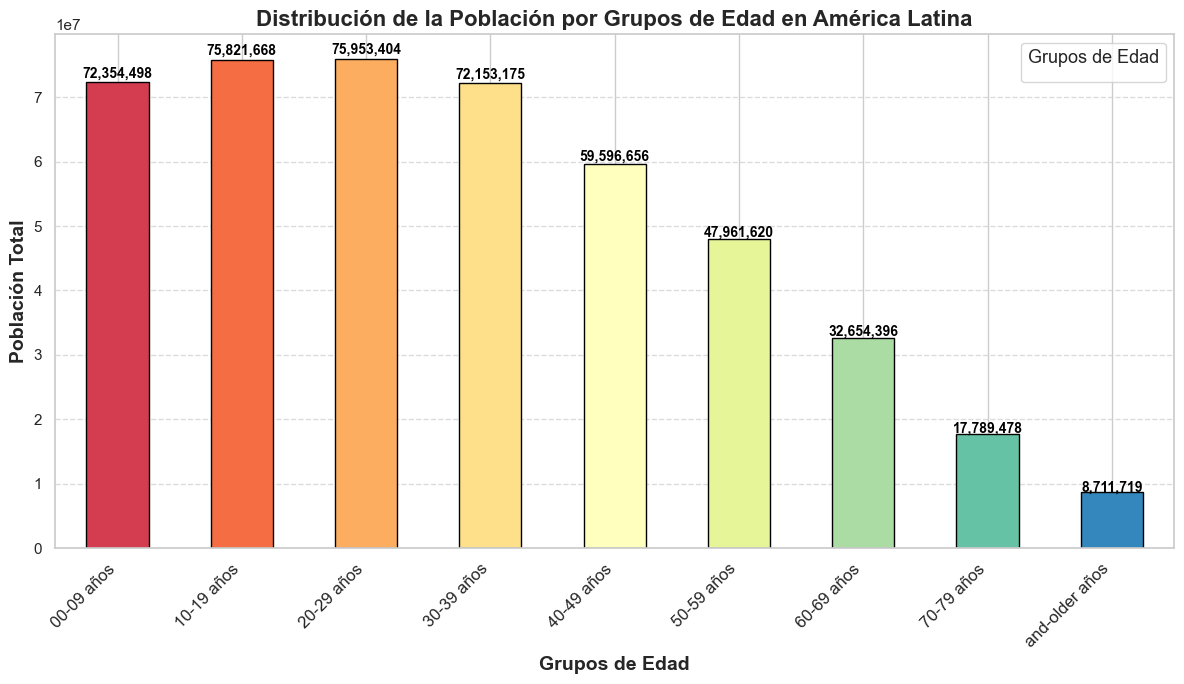

In [25]:
# Configuración de paleta de colores
colors = sns.color_palette("Spectral", len(age_columns))

# Gráfico de barras con detalles visuales
plt.figure(figsize=(12, 7))
age_distribution.plot(kind='bar', color=colors, edgecolor='black')

# Configuración de etiquetas y títulos
plt.xlabel('Grupos de Edad', fontsize=14, fontweight='bold')
plt.ylabel('Población Total', fontsize=14, fontweight='bold')
plt.title('Distribución de la Población por Grupos de Edad en América Latina', fontsize=16, fontweight='bold')

# Cambiar las etiquetas del eje X para mayor claridad
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] + ' años' for col in age_columns], rotation=45, ha='right', fontsize=12)

# Añadir etiquetas de valor encima de cada barra
for idx, value in enumerate(age_distribution):
    plt.text(idx, value + (value * 0.01), f'{int(value):,}', ha='center', fontsize=10, fontweight='bold', color='black')

# Añadir leyenda y ajustar visualización
plt.legend(title='Grupos de Edad', fontsize=12, title_fontsize=13, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula sutil en el eje Y

# Mostrar gráfico
plt.tight_layout()
plt.show()


Total vacunados en grupo etario 00_19: 96152587300
Total vacunados en grupo etario 20_39: 96591845528
Total vacunados en grupo etario 40_59: 70472713236
Total vacunados en grupo etario 60_79: 33186041679
Total vacunados en grupo etario 80_and_older: 5758549556


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2568\2087052277.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_pais = data_pais.resample('M').mean(numeric_only=True)  # Re-samplear los datos por mes y calcular la media


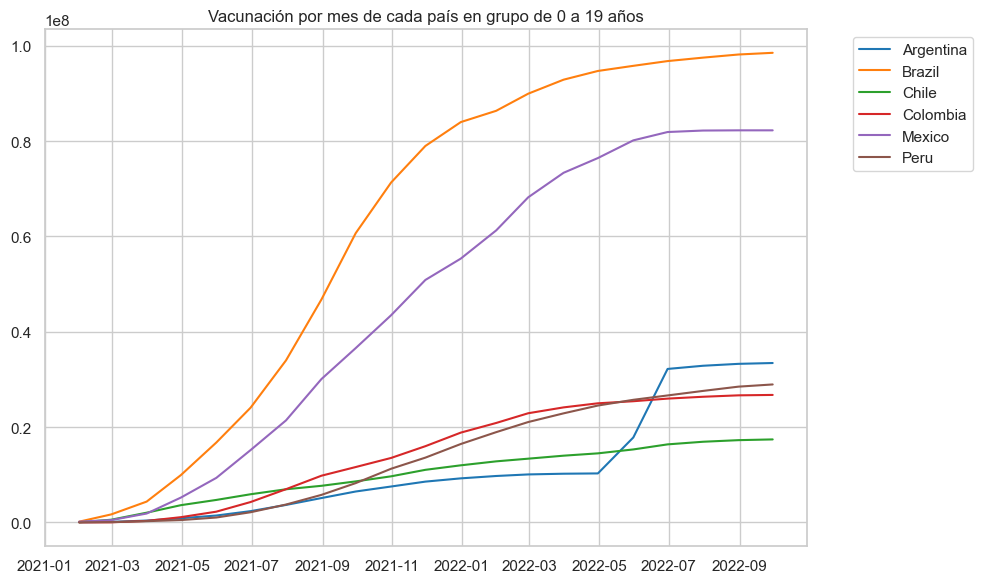

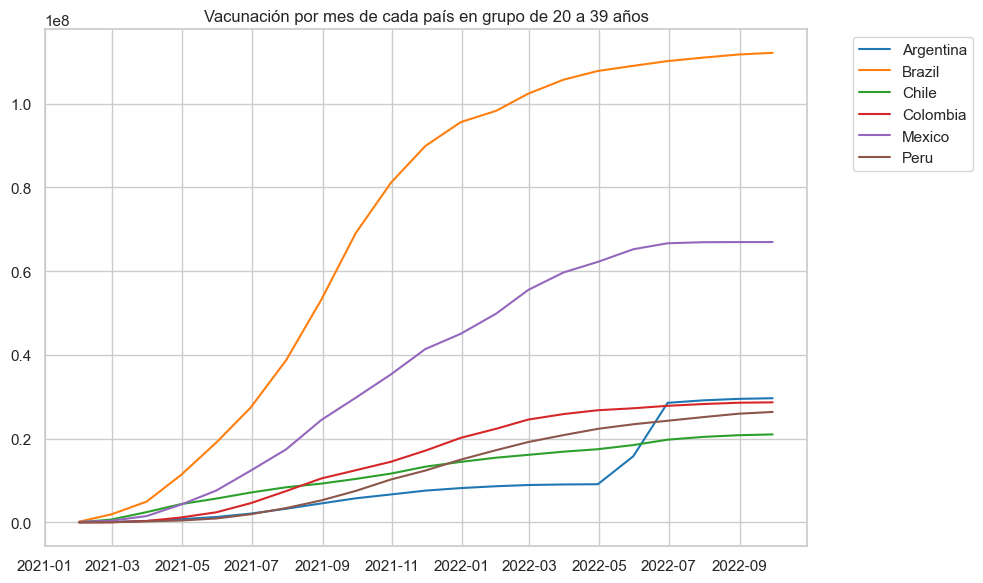

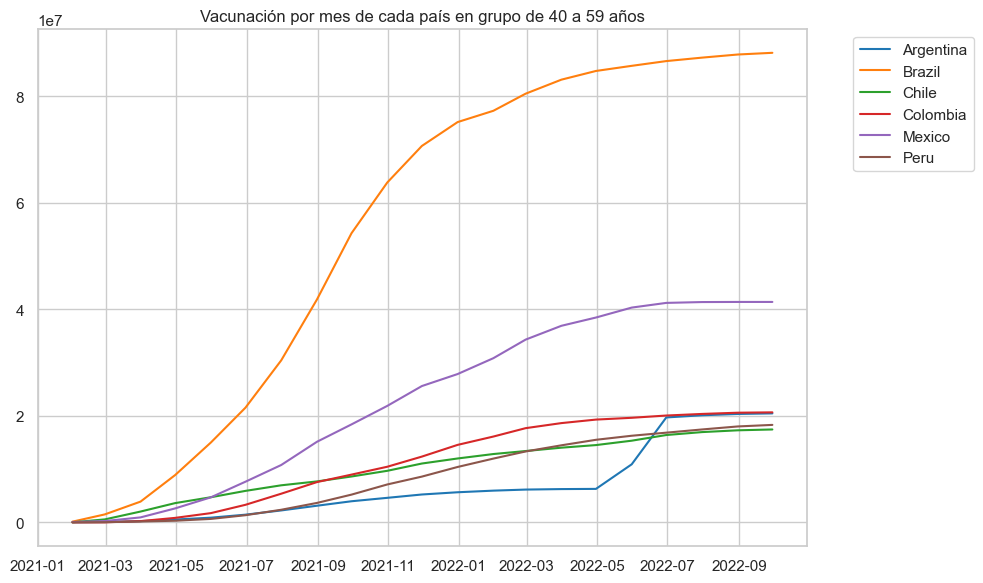

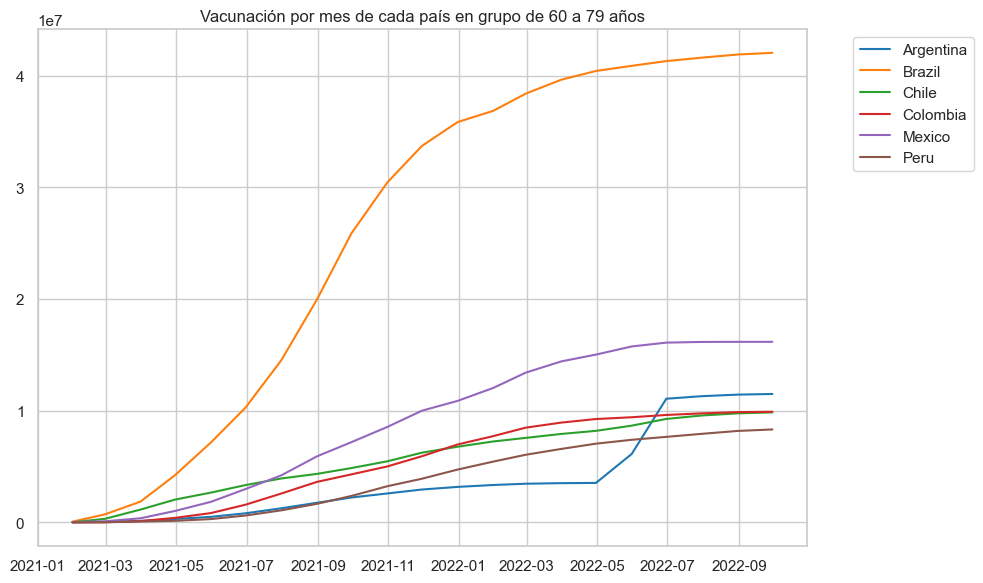

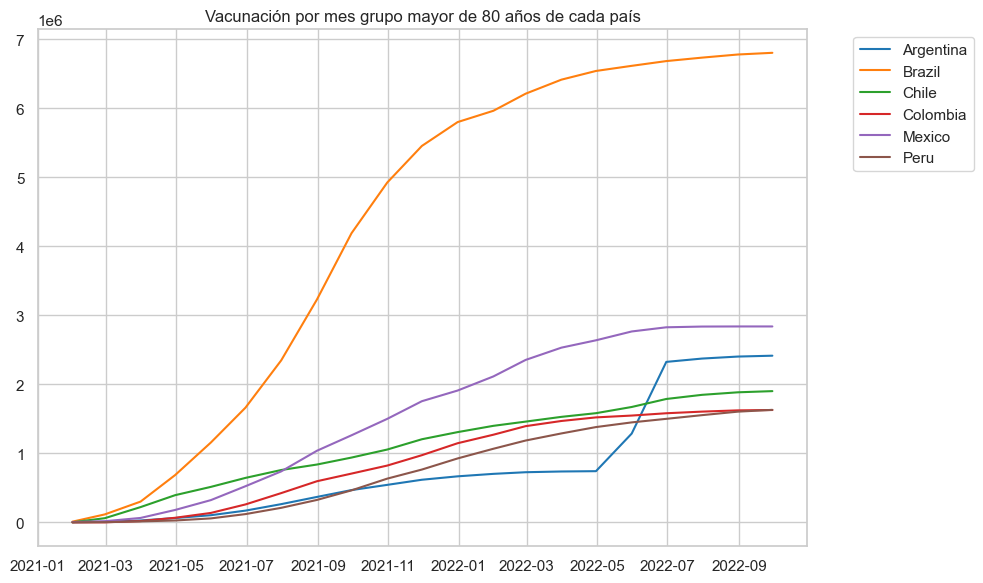

In [37]:
# Crear un nuevo DataFrame para almacenar los valores ajustados por país
doses_by_country_fixed = pd.DataFrame()  # Inicializamos un DataFrame vacío donde guardaremos los datos corregidos por país.

# Aplicar una función para asegurar que los valores sean siempre crecientes por cada país
for country, group in data_latinoamerica_paises.groupby('country_name'):  # Iteramos por cada país en el DataFrame agrupando por 'country_name'.
    group['cumulative_vaccine_doses_administered'] = group['cumulative_vaccine_doses_administered'].cummax()  # Aplicamos la función cummax() para que los valores acumulados no disminuyan.
    doses_by_country_fixed = pd.concat([doses_by_country_fixed, group])  # Añadimos el grupo corregido al DataFrame doses_by_country_fixed.

# Actualizar el DataFrame original con los valores acumulados corregidos
data_latinoamerica_paises_fecha = doses_by_country_fixed

# Grupo etario más vacunado
data_latinoamerica_paises_fecha['population_age_00_19'] = data_latinoamerica_paises_fecha['population_age_00_09'] + data_latinoamerica_paises_fecha['population_age_10_19']  # Sumar las poblaciones de los grupos de 0 a 19 años
data_latinoamerica_paises_fecha['population_age_20_39'] = data_latinoamerica_paises_fecha['population_age_20_29'] + data_latinoamerica_paises_fecha['population_age_30_39']  # Sumar las poblaciones de los grupos de 20 a 39 años
data_latinoamerica_paises_fecha['population_age_40_59'] = data_latinoamerica_paises_fecha['population_age_40_49'] + data_latinoamerica_paises_fecha['population_age_50_59']  # Sumar las poblaciones de los grupos de 40 a 59 años
data_latinoamerica_paises_fecha['population_age_60_79'] = data_latinoamerica_paises_fecha['population_age_60_69'] + data_latinoamerica_paises_fecha['population_age_70_79']  # Sumar las poblaciones de los grupos de 60 a 79 años
data_latinoamerica_paises_fecha['population_age_80_and_older'] = data_latinoamerica_paises_fecha['population_age_80_and_older']  # Mantener la población de 80 años y más

# Calcular el número de vacunados por grupo etario
for age_group in ['00_19', '20_39', '40_59', '60_79', '80_and_older']:
    column_name = f'population_age_{age_group}_vacunados'  # Nombre de la nueva columna para vacunados por grupo etario
    population_column = f'population_age_{age_group}'  # Nombre de la columna de población por grupo etario
    data_latinoamerica_paises_fecha[column_name] = (
        data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] *  # Dosis acumuladas corregidas
        data_latinoamerica_paises_fecha[population_column] /  # Población por grupo etario
        data_latinoamerica_paises_fecha['population']  # Población total
    ).fillna(0).astype(int)  # Rellenar valores nulos con 0 y convertir a entero

# Calcular el total de vacunados por grupo
for age_group in ['00_19', '20_39', '40_59', '60_79', '80_and_older']:
    column_name = f'population_age_{age_group}_vacunados'  # Nombre de la columna de vacunados por grupo etario
    print(f'Total vacunados en grupo etario {age_group}:', data_latinoamerica_paises_fecha[column_name].sum())  # Imprimir el total de vacunados por grupo etario

# Gráficos de vacunación por grupo etario para cada país
age_groups = {
    '00_19': 'Vacunación por mes de cada país en grupo de 0 a 19 años',
    '20_39': 'Vacunación por mes de cada país en grupo de 20 a 39 años',
    '40_59': 'Vacunación por mes de cada país en grupo de 40 a 59 años',
    '60_79': 'Vacunación por mes de cada país en grupo de 60 a 79 años',
    '80_and_older': 'Vacunación por mes grupo mayor de 80 años de cada país'
}

# Graficar la vacunación por grupo etario
for age_group, title in age_groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear un gráfico con tamaño específico
    for pais in paises_seleccionados:  # Iterar sobre los países seleccionados
        data_pais = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais]  # Filtrar datos del país
        data_pais = data_pais.resample('M').mean(numeric_only=True)  # Re-samplear los datos por mes y calcular la media
        ax.plot(data_pais.index, data_pais[f'population_age_{age_group}_vacunados'], label=pais)  # Graficar la cantidad de vacunados por mes

    plt.title(title)  # Título del gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la leyenda
    plt.tight_layout()  # Ajustar el layout del gráfico
    plt.show()  # Mostrar el gráfico



Mapa de calor de Métricas por país.

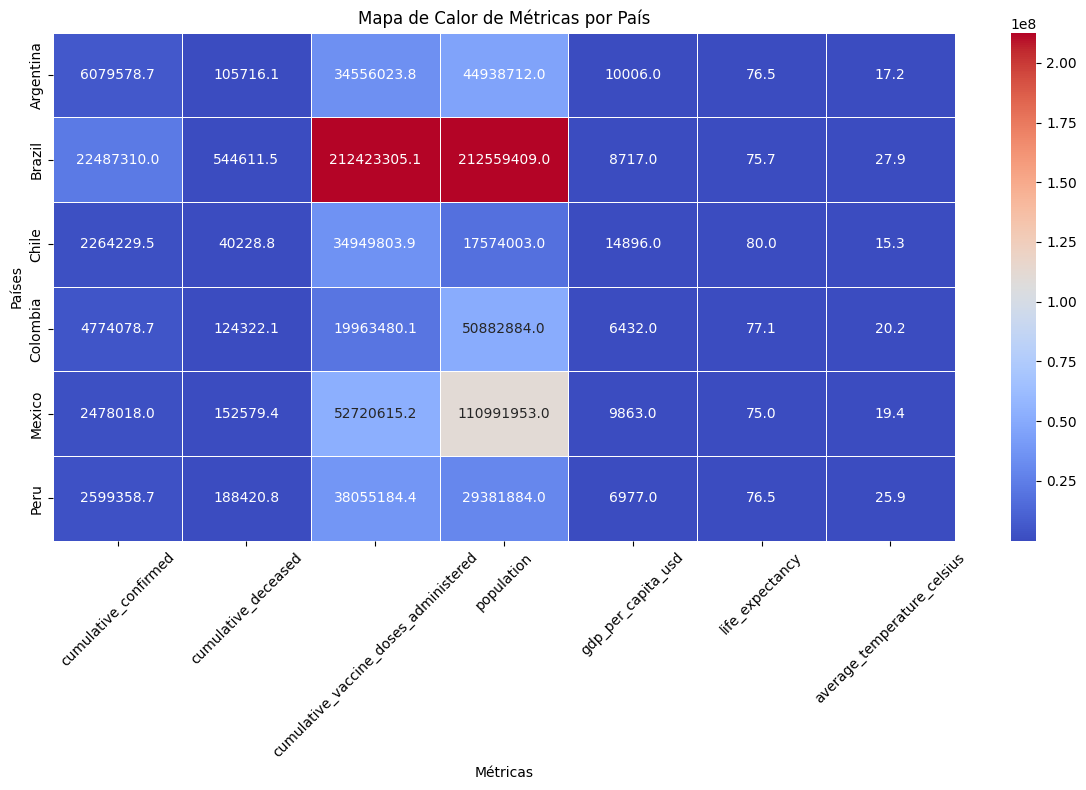

In [35]:
# Seleccionar las métricas de interés para el análisis
columnas_metrica = [
    'cumulative_confirmed', 'cumulative_deceased', 
    'cumulative_vaccine_doses_administered', 'population', 
    'gdp_per_capita_usd', 'life_expectancy', 'average_temperature_celsius'
]

# Agrupar por país y calcular la media de las métricas seleccionadas
data_metrica_pais = data_latinoamerica_paises_fecha.groupby('country_name')[columnas_metrica].mean()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(data_metrica_pais, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

# Personalizar el gráfico
plt.title('Mapa de Calor de Métricas por País')
plt.xlabel('Métricas')
plt.ylabel('Países')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.
De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.


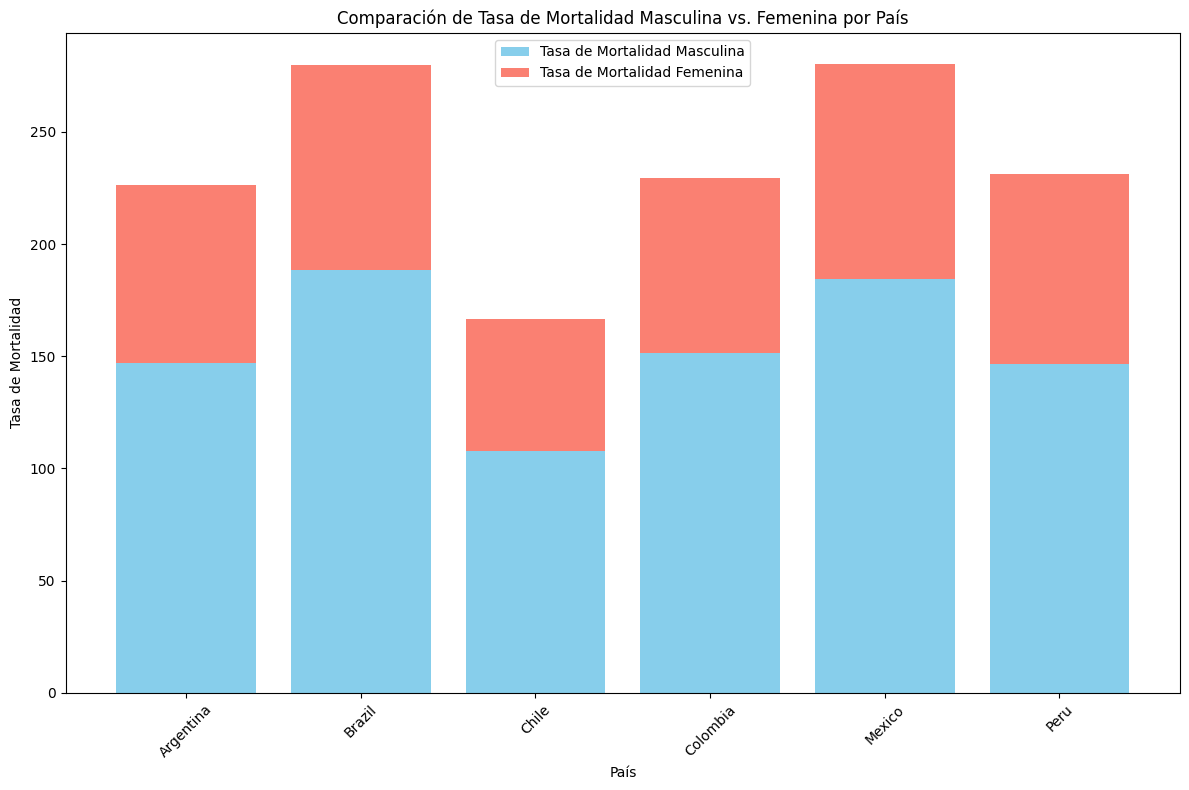

In [36]:
# Filtrar datos por país y tasas de mortalidad
mortalidad_data = data_latinoamerica_paises_fecha.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()

# Configurar datos para el gráfico
countries = mortalidad_data.index
male_mortality = mortalidad_data['adult_male_mortality_rate']
female_mortality = mortalidad_data['adult_female_mortality_rate']

# Crear el gráfico de barras apilado
plt.figure(figsize=(12, 8))
plt.bar(countries, male_mortality, label='Tasa de Mortalidad Masculina', color='skyblue')
plt.bar(countries, female_mortality, bottom=male_mortality, label='Tasa de Mortalidad Femenina', color='salmon')

# Configurar etiquetas y leyenda
plt.title('Comparación de Tasa de Mortalidad Masculina vs. Femenina por País')
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Matriz de correlación de indicadores demográficos y de salud

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.


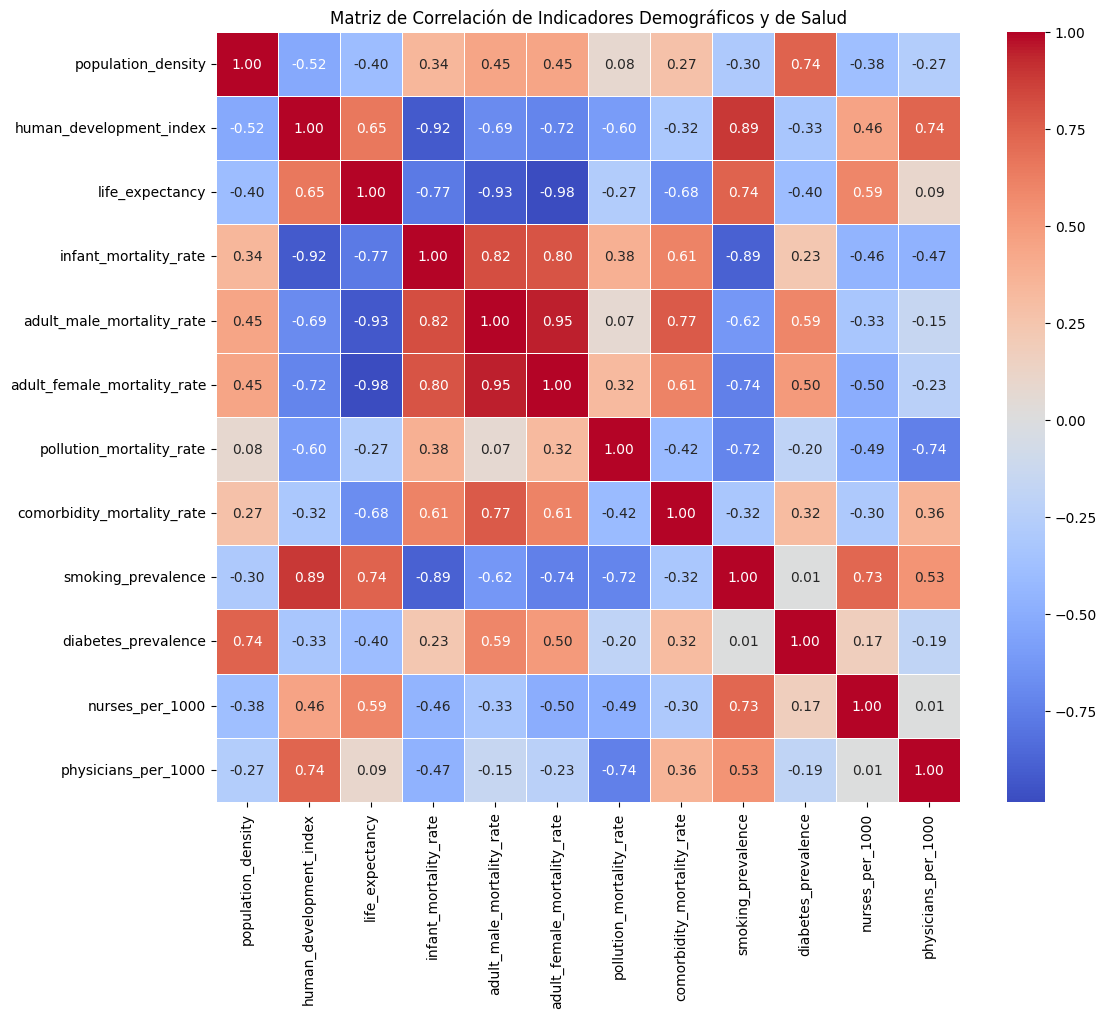

In [37]:
# Selección de columnas relacionadas con indicadores demográficos y de salud
indicadores_demograficos_salud = [
    'population_density', 'human_development_index', 'life_expectancy', 
    'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'pollution_mortality_rate', 'comorbidity_mortality_rate', 
    'smoking_prevalence', 'diabetes_prevalence', 'nurses_per_1000', 'physicians_per_1000'
]

# Filtrar el DataFrame para obtener solo esas columnas
data_filtrada = data_latinoamerica_paises_fecha[indicadores_demograficos_salud]

# Calcular la matriz de correlación
correlacion_matriz = data_filtrada.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Indicadores Demográficos y de Salud')
plt.show()


Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

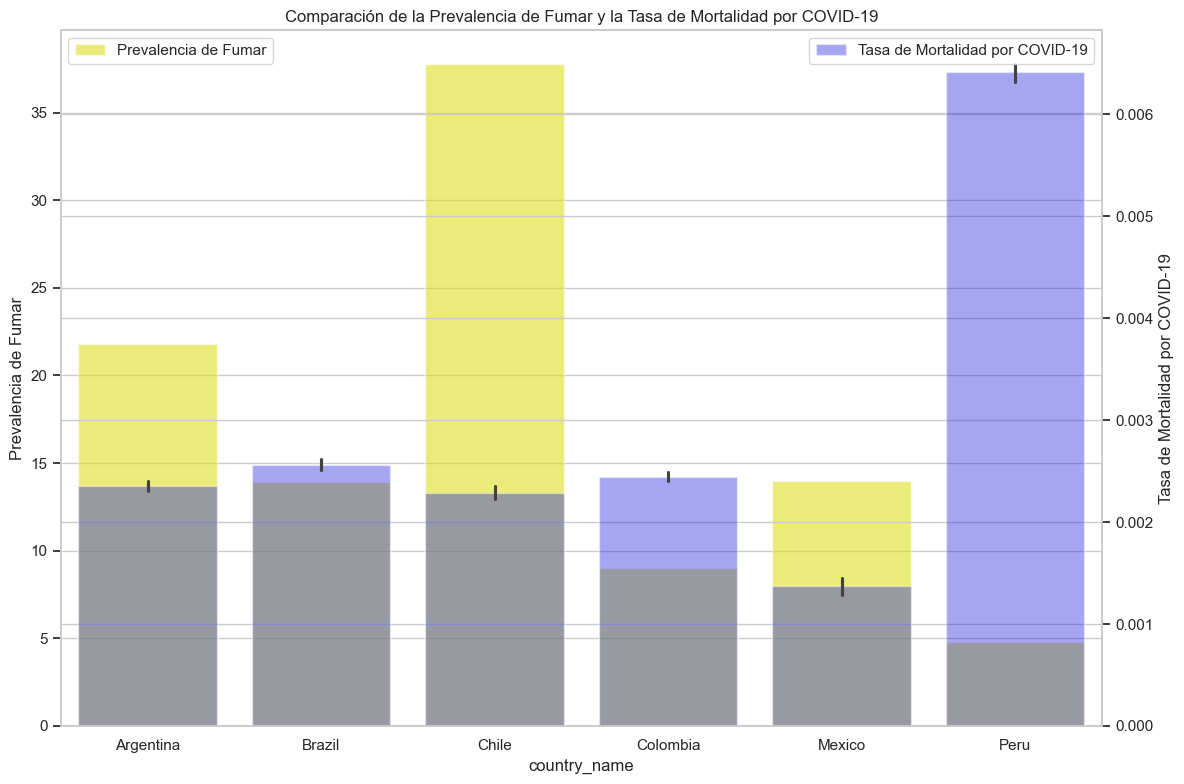

In [38]:
# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Crear un gráfico de barras que muestra la prevalencia de fumar por país
sns.barplot(data=data_latinoamerica_paises_fecha, 
            x=data_latinoamerica_paises_fecha['country_name'],  # Eje X: nombres de los países
            y=data_latinoamerica_paises_fecha['smoking_prevalence'],  # Eje Y: prevalencia de fumar
            color='yellow',  # Color de las barras
            label='Prevalencia de Fumar',  # Etiqueta para la leyenda
            ax=ax,  # Usar el eje creado previamente
            alpha=0.6)  # Transparencia de las barras

# Crear un segundo eje que comparte el mismo eje X
ax2 = ax.twinx()  # Crear un eje Y adicional que comparte el eje X del primer gráfico

# Crear un gráfico de barras que muestra la tasa de mortalidad por COVID-19 por país
sns.barplot(data=data_latinoamerica_paises_fecha, 
            x=data_latinoamerica_paises_fecha['country_name'],  # Eje X: nombres de los países
            y=data_latinoamerica_paises_fecha['cumulative_deceased'] / data_latinoamerica_paises_fecha['population'],  # Eje Y: tasa de mortalidad (muertos acumulados / población)
            color='Blue',  # Color de las barras
            label='Tasa de Mortalidad por COVID-19',  # Etiqueta para la leyenda
            ax=ax2,  # Usar el segundo eje Y
            alpha=0.4)  # Transparencia de las barras

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=90)

# Etiquetas para el eje Y del primer gráfico
ax.set_ylabel('Prevalencia de Fumar')  # Etiqueta para la prevalencia de fumar
# Etiquetas para el eje Y del segundo gráfico
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')  # Etiqueta para la tasa de mortalidad

# Añadir leyendas para ambos gráficos
ax.legend(loc='upper left')  # Leyenda para la prevalencia de fumar
ax2.legend(loc='upper right')  # Leyenda para la tasa de mortalidad

# Título del gráfico
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')  # Título del gráfico

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()  # Mostrar la figura creada


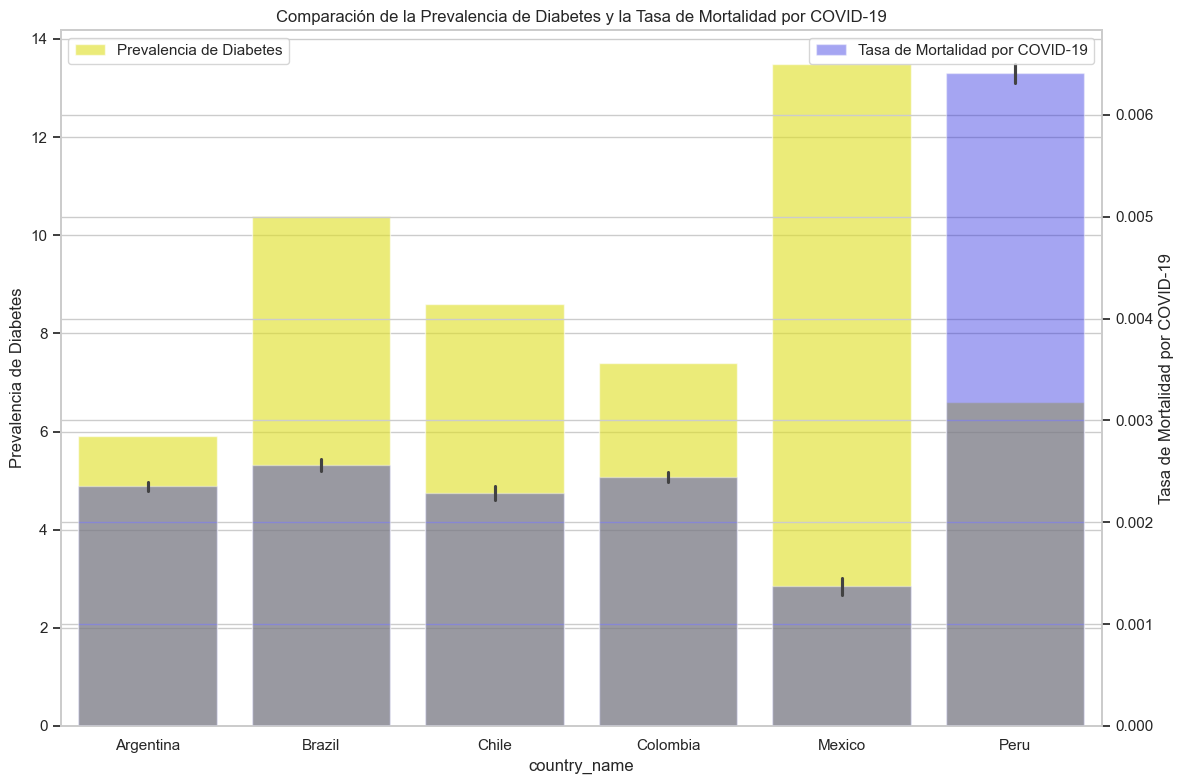

In [39]:
# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Crear un gráfico de barras que muestra la prevalencia de diabetes por país
sns.barplot(data=data_latinoamerica_paises_fecha, 
            x=data_latinoamerica_paises_fecha['country_name'],  # Eje X: nombres de los países
            y=data_latinoamerica_paises_fecha['diabetes_prevalence'],  # Eje Y: prevalencia de diabetes
            color='yellow',  # Color de las barras
            label='Prevalencia de Diabetes',  # Etiqueta para la leyenda
            ax=ax,  # Usar el eje creado previamente
            alpha=0.6)  # Transparencia de las barras

# Crear un segundo eje que comparte el mismo eje X
ax2 = ax.twinx()  # Crear un eje Y adicional que comparte el eje X del primer gráfico

# Crear un gráfico de barras que muestra la tasa de mortalidad por COVID-19 por país
sns.barplot(data=data_latinoamerica_paises_fecha, 
            x=data_latinoamerica_paises_fecha['country_name'],  # Eje X: nombres de los países
            y=data_latinoamerica_paises_fecha['cumulative_deceased'] / data_latinoamerica_paises_fecha['population'],  # Eje Y: tasa de mortalidad (muertos acumulados / población)
            color='Blue',  # Color de las barras
            label='Tasa de Mortalidad por COVID-19',  # Etiqueta para la leyenda
            ax=ax2,  # Usar el segundo eje Y
            alpha=0.4)  # Transparencia de las barras

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=90)

# Etiquetas para el eje Y del primer gráfico
ax.set_ylabel('Prevalencia de Diabetes')  # Etiqueta para la prevalencia de diabetes
# Etiquetas para el eje Y del segundo gráfico
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')  # Etiqueta para la tasa de mortalidad

# Añadir leyendas para ambos gráficos
ax.legend(loc='upper left')  # Leyenda para la prevalencia de diabetes
ax2.legend(loc='upper right')  # Leyenda para la tasa de mortalidad

# Título del gráfico
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')  # Título del gráfico

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()  # Mostrar la figura creada


AVANCE 3


1
Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 2 coloca el título: “Avance 3”.

2
Importa las librerías que necesites utilizar en este avance.

3
Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales.

In [40]:
#cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data_latinoamerica_paises=pd.read_csv('DatosFinalesFiltrados.csv')
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [34]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [ ]:
# Convertir la columna 'date' del DataFrame a un formato de fecha y hora
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])  
# Esto permite que las operaciones de fecha y tiempo se realicen correctamente sobre esta columna.

# Establecer la columna 'date' como índice del DataFrame
data_latinoamerica_paises = data_latinoamerica_paises.set_index('date')  
# Al hacer esto, se puede utilizar la fecha como índice, facilitando operaciones como resampling o filtrado temporal.

# Mostrar el DataFrame resultante con la columna 'date' como índice
data_latinoamerica_paises  
# Esto permite verificar que los cambios se hayan realizado correctamente y que los datos estén en el formato deseado.
                    

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

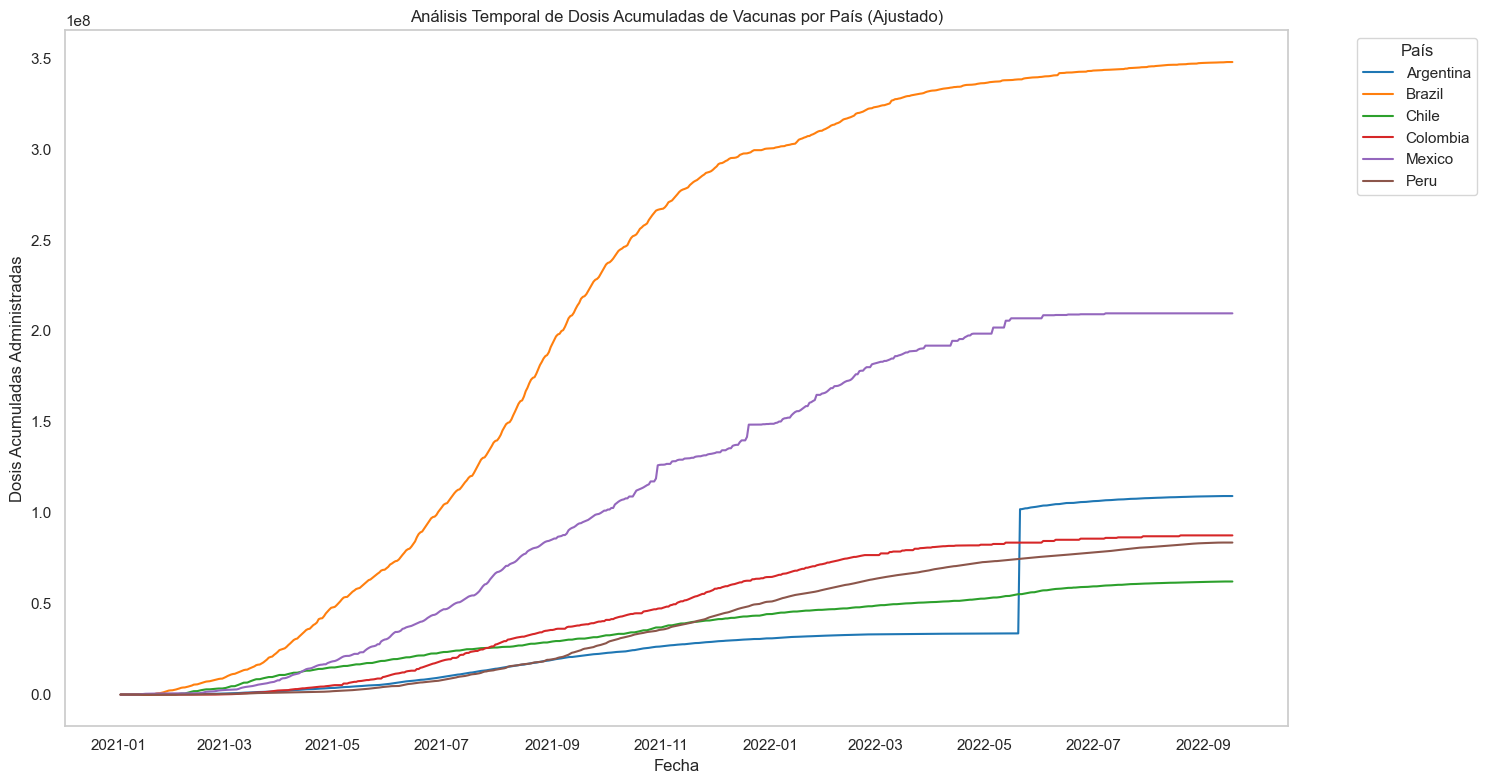

In [36]:

# Crear un nuevo DataFrame para almacenar los valores ajustados por país
doses_by_country_fixed = pd.DataFrame()  # Inicializamos un DataFrame vacío donde guardaremos los datos corregidos por país.

# Aplicar una función para asegurar que los valores sean siempre crecientes por cada país
for country, group in data_latinoamerica_paises.groupby('country_name'):  # Iteramos por cada país en el DataFrame agrupando por 'country_name'.
    group['cumulative_vaccine_doses_administered'] = group['cumulative_vaccine_doses_administered'].cummax()  # Aplicamos la función cummax() para que los valores acumulados no disminuyan.
    doses_by_country_fixed = pd.concat([doses_by_country_fixed, group])  # Añadimos el grupo corregido al DataFrame doses_by_country_fixed.

# Graficar el resultado
plt.figure(figsize=(15, 8))  # Creamos una figura para el gráfico con un tamaño específico.
for country in doses_by_country_fixed['country_name'].unique():  # Iteramos por cada país único en el DataFrame corregido.
    country_data = doses_by_country_fixed[doses_by_country_fixed['country_name'] == country]  # Filtramos los datos de cada país.
    plt.plot(country_data.index, country_data['cumulative_vaccine_doses_administered'], label=country)  # Graficamos la línea de dosis acumuladas para cada país.

# Personalizar el gráfico
plt.title('Análisis Temporal de Dosis Acumuladas de Vacunas por País (Ajustado)')  # Título del gráfico.
plt.xlabel('Fecha')  # Etiqueta del eje X.
plt.ylabel('Dosis Acumuladas Administradas')  # Etiqueta del eje Y.
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocamos la leyenda fuera del gráfico para mejor visualización.
plt.grid()  # Añadimos una cuadrícula para facilitar la lectura de los datos.
plt.tight_layout()  # Ajustamos el diseño para que no haya superposiciones.

# Mostrar el gráfico
plt.show()  # Finalmente, mostramos el gráfico.




In [50]:
# Asignar el número de la semana ISO correspondiente a cada fecha en el índice al nuevo DataFrame
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week  # Extrae el número de semana del índice de fechas

# Mostrar el DataFrame que ahora incluye la columna de semanas
data_latinoamerica_paises  


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [54]:
# Filtrar el DataFrame para incluir solo los datos del año 2021
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[ 
    # Establecer las condiciones para filtrar las filas
    (data_latinoamerica_paises.index >= '2021-01-01') &  # Seleccionar fechas a partir del 1 de enero de 2021
    (data_latinoamerica_paises.index <= '2021-12-31')   # Seleccionar fechas hasta el 31 de diciembre de 2021
]

# Mostrar el DataFrame filtrado que contiene solo los datos del año 2021
data_latinoamerica_paises_2021  


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [52]:
# Agrupar por país y sumar los casos confirmados
casos_por_pais = data_latinoamerica_paises.groupby('country_name')['new_confirmed'].sum()

# Imprimir el resultado
print(casos_por_pais)



country_name
Argentina    8.056705e+06
Brazil       2.689408e+07
Chile        3.839378e+06
Colombia     4.644243e+06
Mexico       5.549906e+06
Peru         3.171600e+06
Name: new_confirmed, dtype: float64


In [55]:
# Asegurarse de que 'week' esté en 'data_latinoamerica_paises_2021'
data_latinoamerica_paises_2021['week'] = data_latinoamerica_paises_2021.index.isocalendar().week  # Extrae el número de semana del índice de fechas

# Agrupar los datos de casos semanales por país y semana
weekly_cases = data_latinoamerica_paises_2021.groupby(
    ['country_name', 'week']  # Agrupar por nombre de país y número de semana
)[['new_confirmed', 'new_deceased']].sum().reset_index()  # Sumar los casos confirmados y fallecidos por semana

# Mostrar el DataFrame que contiene los casos semanales agrupados
weekly_cases


country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [56]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [57]:
import warnings
warnings.filterwarnings('ignore')

Evolución Anual de Casos Nuevos

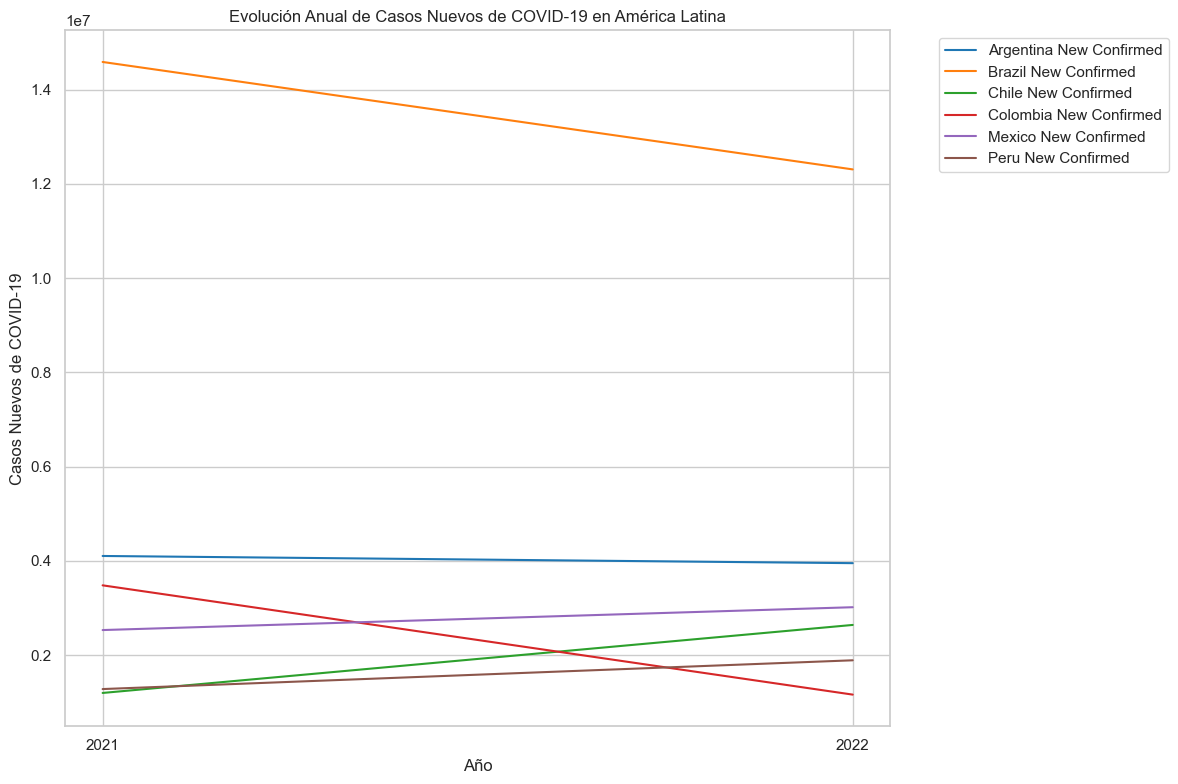

In [58]:
# Vamos a analizar cómo evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por año
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.year  # Extraemos el año del índice 'date'
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'year'])[['new_confirmed']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax.plot(country_yearly_cases['year'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')

# Configuración de la gráfica de nuevos casos
ax.set_xlabel("Año")
ax.set_ylabel("Casos Nuevos de COVID-19")
ax.set_title("Evolución Anual de Casos Nuevos de COVID-19 en América Latina")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Aseguramos que los años en el eje X se muestren como enteros
ax.xaxis.get_major_locator().set_params(integer=True)

plt.tight_layout()
plt.show()



-Evolución Semanal de Casos Nuevos

De las graficas se observa que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta,ademas se nota un pico en las fechas finales

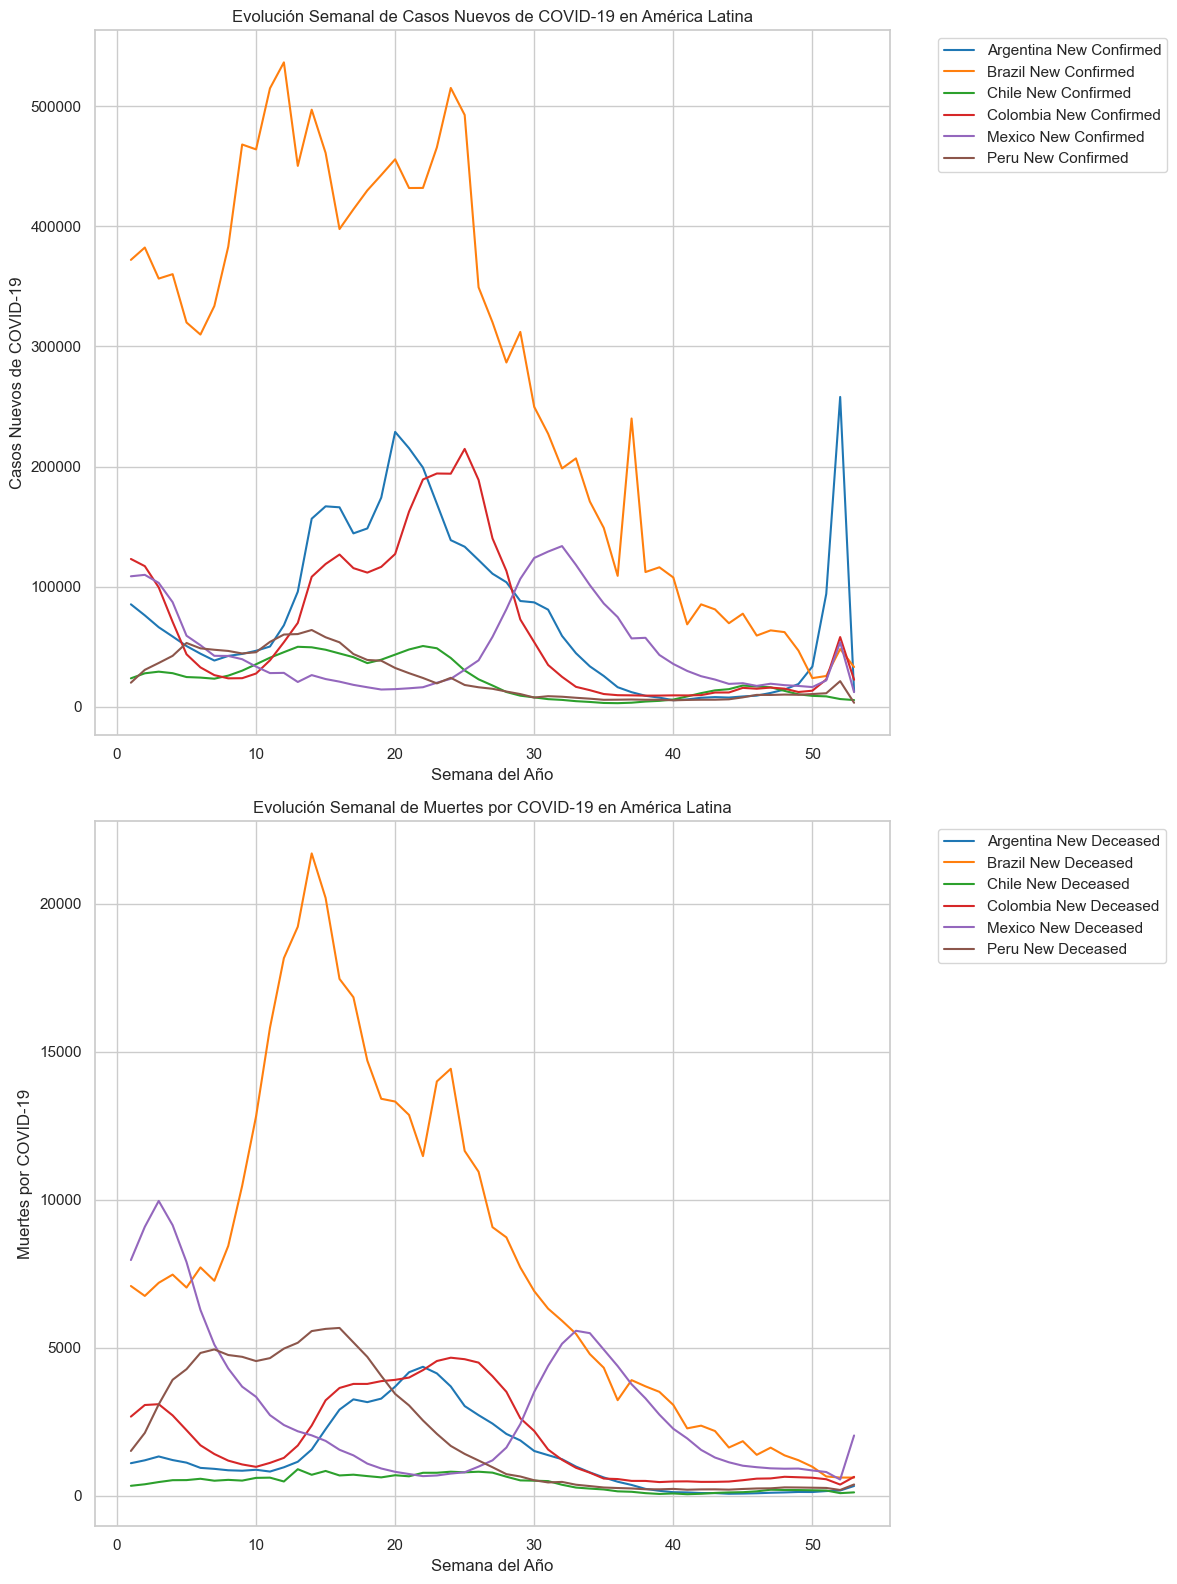

In [60]:
# Vamos a analizar cómo evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana

# Agrupamos los datos por país y semana, sumando los casos nuevos confirmados y fallecimientos para cada semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()

# Creamos una figura con 2 subgráficos en una columna, uno para casos nuevos y otro para fallecimientos
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))

# Iteramos sobre cada país para agregar sus datos en las gráficas
for country in weekly_cases['country_name'].unique():
    # Filtramos los datos de cada país
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    # Graficamos la evolución semanal de casos nuevos de COVID-19 para cada país en el primer subgráfico
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    # Graficamos la evolución semanal de muertes por COVID-19 para cada país en el segundo subgráfico
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

# Configuramos etiquetas y título para el primer subgráfico (casos nuevos confirmados)
ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicamos la leyenda fuera de la gráfica para una mejor visualización

# Configuramos etiquetas y título para el segundo subgráfico (muertes por COVID-19)
ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes por COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicamos la leyenda fuera de la gráfica

# Ajustamos el diseño para evitar solapamiento de elementos y mostrar todo el contenido adecuadamente
plt.tight_layout()
plt.show()  # Mostramos la gráfica completa con ambos subgráficos


-Variación Mensual de Casos y Muertes

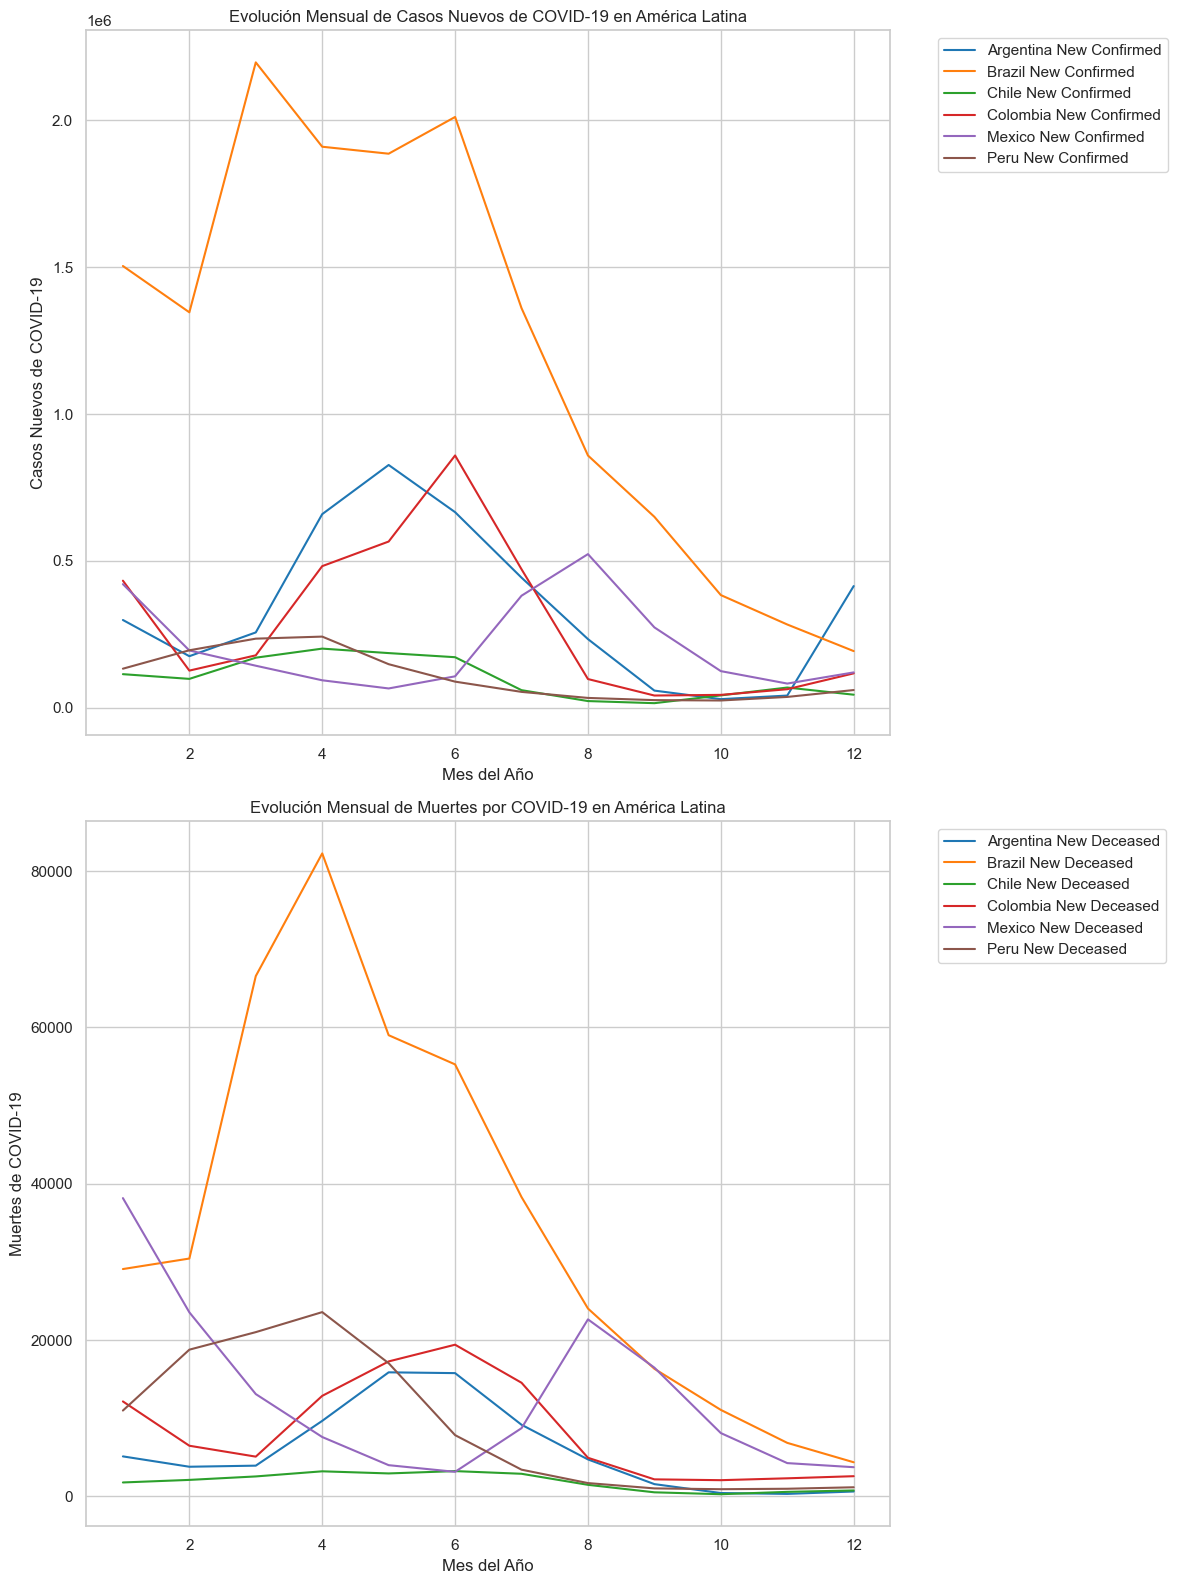

In [61]:
# Ahora vamos a agrupar los datos por mes del año

# Extraemos el mes de cada registro en el índice de fechas y lo asignamos a una nueva columna 'month'
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month  # type: ignore

# Agrupamos los datos por país y mes, sumando los casos nuevos confirmados y fallecimientos para cada mes
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed', 'new_deceased']].sum().reset_index()  # type: ignore

# Creamos una figura con 2 subgráficos, uno para los casos nuevos confirmados y otro para las muertes
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))

# Iteramos sobre cada país para graficar la evolución de casos nuevos y fallecimientos mes a mes
for country in yearly_cases['country_name'].unique():
    # Filtramos los datos para el país actual
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    # Graficamos la evolución mensual de casos nuevos de COVID-19 para cada país en el primer subgráfico
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    # Graficamos la evolución mensual de muertes por COVID-19 para cada país en el segundo subgráfico
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

# Configuramos etiquetas y título para el primer subgráfico (casos nuevos confirmados)
ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicamos la leyenda fuera del gráfico

# Configuramos etiquetas y título para el segundo subgráfico (muertes por COVID-19)
ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicamos la leyenda fuera del gráfico

# Ajustamos el diseño para evitar solapamiento de elementos y mostrar todo el contenido adecuadamente
plt.tight_layout()
plt.show()  # Mostramos la gráfica con ambos subgráficos


4-Genera gráficas acordes a tu análisis. Las mismas pueden ser:

-Evolución de Casos Activos vs. Recuperados
-Tasa de Crecimiento (%)
-Relación entre la Cobertura de Vacunación y la Reducción de Casos
-('País') Progreso de la vacunación por país
-Nuevos casos y temperatura promedio
-Impacto de la Urbanización en la Propagación del Covid-19
-Evolución Semanal de Casos Nuevos
-Evolución Anual de Casos Nuevos
-Distribución de la Población por Edad en Países
-Comparación de Estrategias de Vacunación en América Latina
-Evolución del Número de Muertes Diarias.
-Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
-Variación Mensual de Casos y Muertes
-Análisis Temporal de la Mortalidad/
-Comparación de la Situación Actual (Contexto de los datos)

-Nuevos casos y temperatura promedio

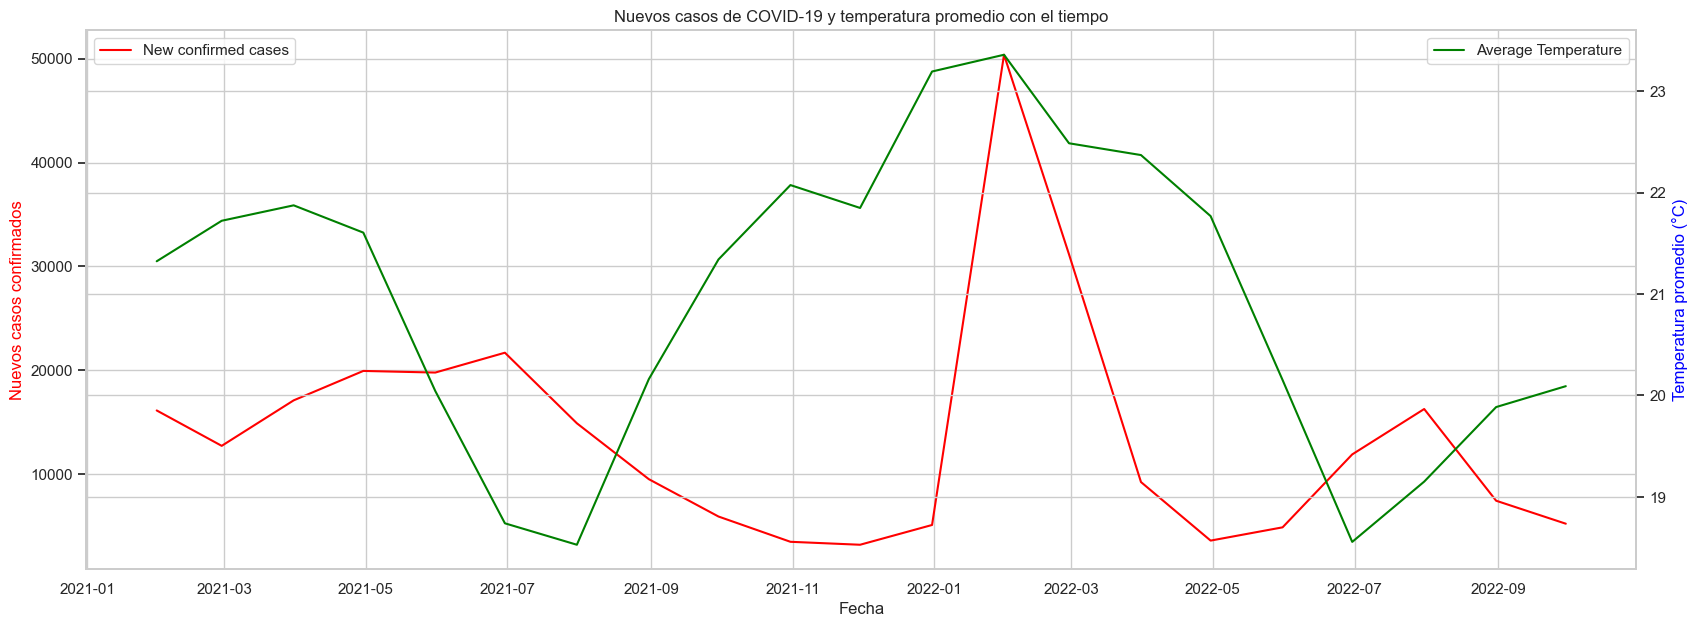

In [62]:
# Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))  # Definimos el tamaño de la figura
ax1 = plt.gca()  # Obtiene el eje actual de la gráfica y lo asigna a ax1

# Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas
ax2 = ax1.twinx()

# Graficamos los nuevos casos confirmados de COVID-19
ax1.plot(
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index,  # Reescalamos los datos a nivel mensual (ME) y obtenemos el promedio de los valores numéricos
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'],  # Promedio mensual de nuevos casos confirmados
    color='red',  # Color de la línea de nuevos casos confirmados
    label='New confirmed cases'  # Etiqueta de la línea
)

# Graficamos la temperatura promedio en el segundo eje (ax2) que comparte el eje x con ax1
ax2.plot(
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index,  # Reescalamos los datos a nivel mensual (ME)
    data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],  # Promedio mensual de la temperatura
    color='green',  # Color de la línea de temperatura promedio
    label='Average Temperature'  # Etiqueta de la línea
)

# Etiqueta del eje x
ax1.set_xlabel('Fecha')
# Etiqueta y color para el eje y de ax1 (nuevos casos confirmados)
ax1.set_ylabel('Nuevos casos confirmados', color='red')
# Etiqueta y color para el eje y de ax2 (temperatura promedio)
ax2.set_ylabel("Temperatura promedio (°C)", color='blue')

# Título de la gráfica
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')

# Ubicamos las leyendas para ambos ejes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Mostramos la gráfica con ambos ejes y sus datos correspondientes
plt.show()


Podemos notar que la temperatura promedio ha ido aumentando pero los casos han ido disminuyendo, pero observando que en marzo de 2022 hubo un pico el cual se puede o no haber dado por las dosis administradas

-Impacto de la Urbanización en la Propagación del Covid-19

In [63]:
data_latinoamerica_paises[["population", "population_urban", "cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02  44938712.0        41339571.0          1.670634e+06
2021-01-03  44938712.0        41339571.0          1.675568e+06
2021-01-04  44938712.0        41339571.0          1.689521e+06
2021-01-05  44938712.0        41339571.0          1.703606e+06
2021-01-06  44938712.0        41339571.0          1.718102e+06
...                ...               ...                   ...
2022-09-13  29381884.0        25390339.0          4.127612e+06
2022-09-14  29381884.0        25390339.0          6.079579e+06
2022-09-15  29381884.0        25390339.0          6.079579e+06
2022-09-16  29381884.0        25390339.0          6.079579e+06
2022-09-17  29381884.0        25390339.0          6.079579e+06

[3744 rows x 3 columns]

In [64]:
# Impacto de la urbanización en la propagación del Covid-19

# Calcula el porcentaje de población urbana de cada país y lo guarda en una nueva columna
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']

# Calcula el porcentaje de casos confirmados en relación a la población total de cada país y lo guarda en otra nueva columna
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']

# Agrupa los datos por país, selecciona la última entrada de cada país y los ordena por porcentaje de población urbana
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Muestra el DataFrame ordenado, donde cada fila representa el último valor registrado para cada país en cuanto a
# porcentaje de población urbana y porcentaje de casos confirmados
urban_cases


location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO   12911.385484    134.379032   
Brazil                 BR           BR   12911.385484    134.379032   
Peru                   PE           PE   12911.385484    134.379032   
Argentina              AR           AR   12911.385484    134.379032   
Mexico                 MX           MX   12911.385484    134.379032   
Chile                  CL           CL   12911.385484    134.379032   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia              6.079579e+06        105716.119355   
Brazil                6.079579e+06        105716.119355   
Peru                  6.079579e+06        105716.119355   
Argentina             6.079579e+06        105716.119355   
Mexico                6.079579e+06        105716.119355   
Chile                 6.079579e+06        105716.119355   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                        0.0   50882884.0   
Brazil                                          0.0  212559409.0   
Peru                                            0.0   29381884.0   
Argentina                                       0.0   44938712.0   
Mexico                                          0.0  110991953.0   
Chile                                           0.0   17574003.0   

              population_male  population_female  ...  \
country_name                                      ...   
Colombia           24984564.0         25898320.0  ...   
Brazil            104435783.0        108123626.0  ...   
Peru               14450757.0         14931127.0  ...   
Argentina          19523766.0         20593330.0  ...   
Mexico             54855231.0         57481307.0  ...   
Chile               8972014.0          8601989.0  ...   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                        151.616                       77.999   
Brazil                          188.528                       91.421   
Peru                            146.370                       84.815   
Argentina                       147.086                       79.483   
Mexico                          184.379                       95.815   
Chile                           107.669                       59.035   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                          37.0                        15.8   
Brazil                            29.9                        16.6   
Peru                              63.9                        12.6   
Argentina                         26.6                        15.8   
Mexico                            36.7                        15.7   
Chile                             25.3                        12.4   

              new_recovered  cumulative_recovered  week  year  \
country_name                                                    
Colombia                0.0                   0.0    37  2022   
Brazil                  0.0                   0.0    37  2022   
Peru                    0.0                   0.0    37  2022   
Argentina               0.0                   0.0    37  2022   
Mexico                  0.0                   0.0    37  2022   
Chile                   0.0                   0.0    37  2022   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                         0.802378                         0.119482  
Brazil                           0.862073                         0.028602  
Pe

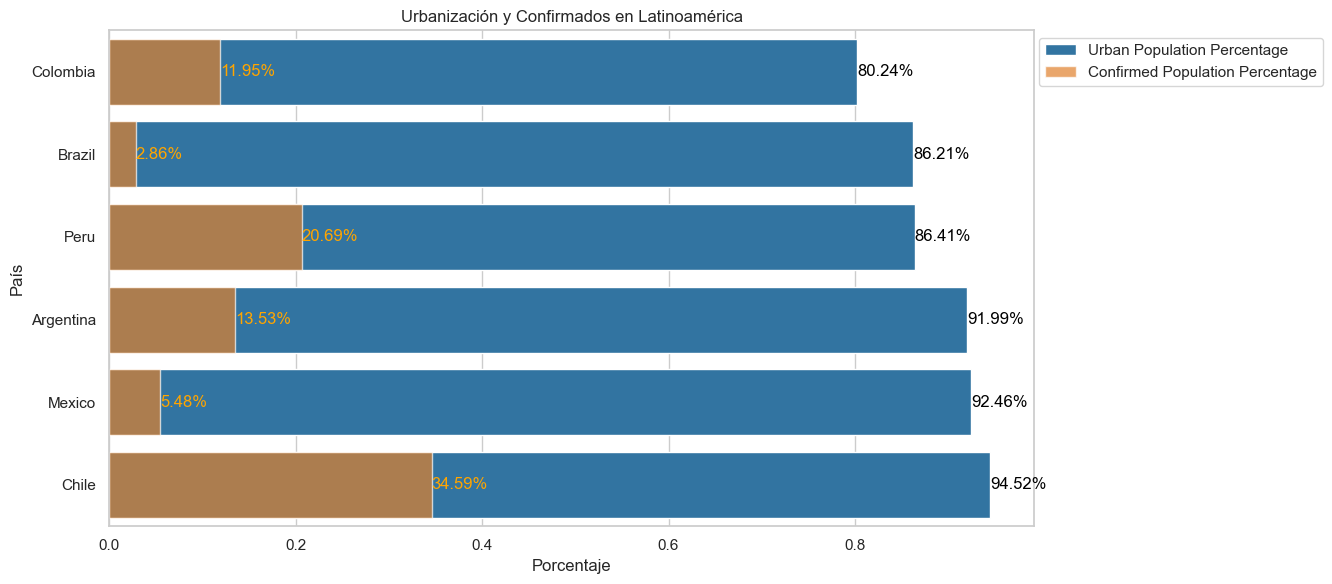

In [65]:
# Impacto de la urbanización en la propagación del Covid-19: Urbanización en Latinoamérica

# Calcula el porcentaje de población urbana de cada país y lo almacena en una nueva columna
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']

# Calcula el porcentaje de casos confirmados respecto a la población total y lo almacena en otra columna
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']

# Agrupa los datos por país, selecciona el último registro disponible para cada país y ordena los resultados por porcentaje de población urbana
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Configura el tamaño de la figura
plt.figure(figsize=(14, 6))

# Crea un gráfico de barras con el porcentaje de población urbana para cada país
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añade etiquetas a cada barra del gráfico de población urbana con el valor en porcentaje
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f"{value*100:.2f}%", color='black', ha='left', va='center')

# Superpone una segunda serie de barras para el porcentaje de casos confirmados de COVID-19 en cada país
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añade etiquetas a cada barra de confirmados de COVID-19 con el valor en porcentaje
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f"{value*100:.2f}%", color='orange', ha='left', va='center')

# Etiquetas de los ejes
plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamérica')

# Configura la leyenda para identificar las series de datos
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")

# Ajusta el diseño para evitar que los elementos se solapen
plt.tight_layout()

# Muestra el gráfico
plt.show()


El pais con mayor impacto de la propagación de la pandemia fue Chile, donde esto puede deberse a la densidad poblacional del mismo, aunque hay que tener en cuenta de que Chile fue uno de los paises que mejor manejo la pandemia.

-Distribución de la Población por Edad en Países

In [67]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  adult_female_mortality_rate  \
date                         ...                                
2021-01-02       19523766.0  ...                       79.483   
2021-01-03       19523766.0  ...                       79.483   
2021-01-04       19523766.0  ...                       79.483   
2021-01-05       19523766.0  ...                       79.483   
2021-01-06       19523766.0  ...                       79.483   
...                     ...  ...                          ...   
2022-09-13       14450757.0  ...                       84.815   
2022-09-14       14450757.0  ...                       84.815   
2022-09-15       14450757.0  ...                       84.815   
2022-09-16       14450757.0  ...                       84.815   
2022-09-17       14450757.0  ...                       84.815   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2021-01-02                      26.6                        15.8   
2021-01-03                      26.6                        15.8   
2021-01-04                      26.6                        15.8   
2021-01-05                      26.6                        15.8   
2021-01-06                      26.6                        15.8   
...                              .

In [68]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [71]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_groups

['population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older']

In [72]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Mexico                  21575859.0            21966049.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Mexico                  18680448.0            16763785.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Mexico                  12937956.0             8959656.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Mexico                   5433731.0             3119417.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Mexico                          1502231.0  
Peru                             573103.0

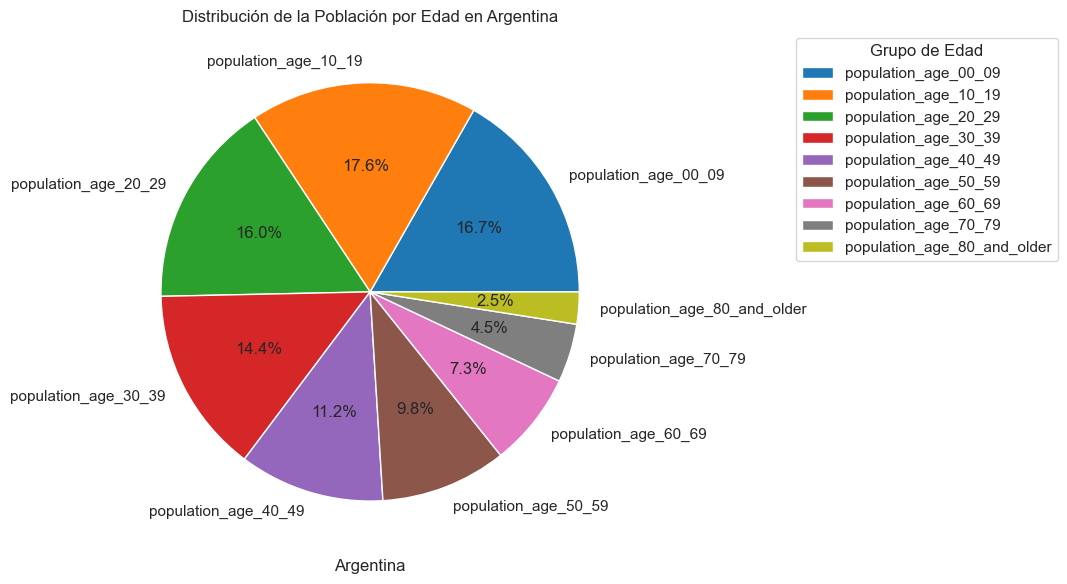

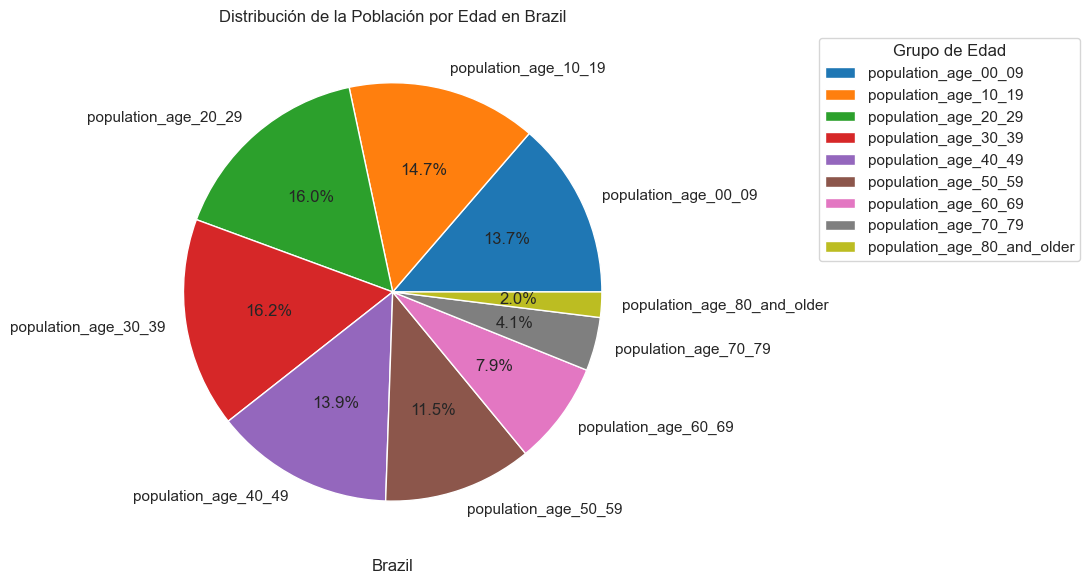

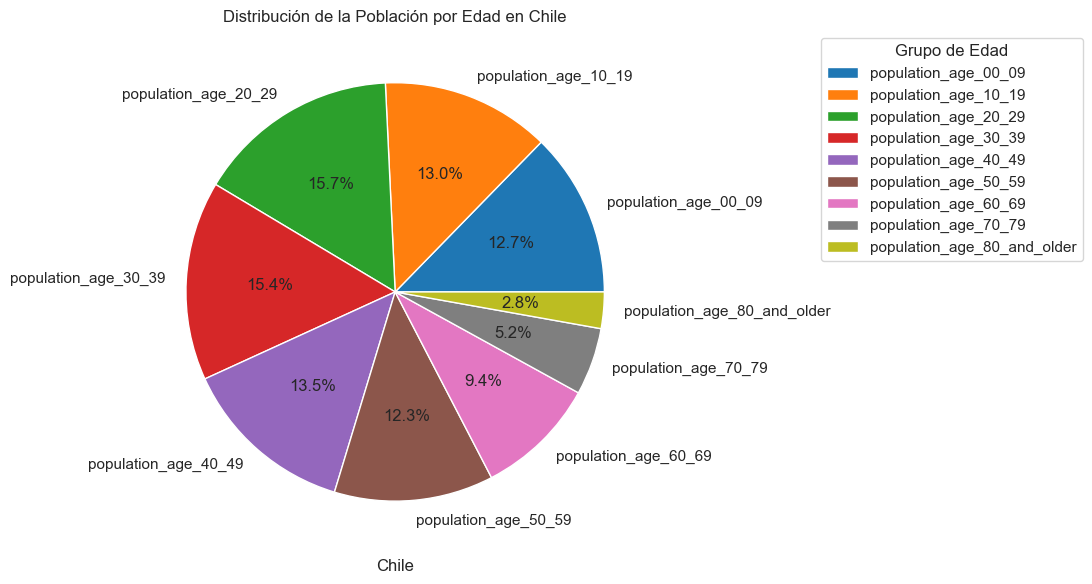

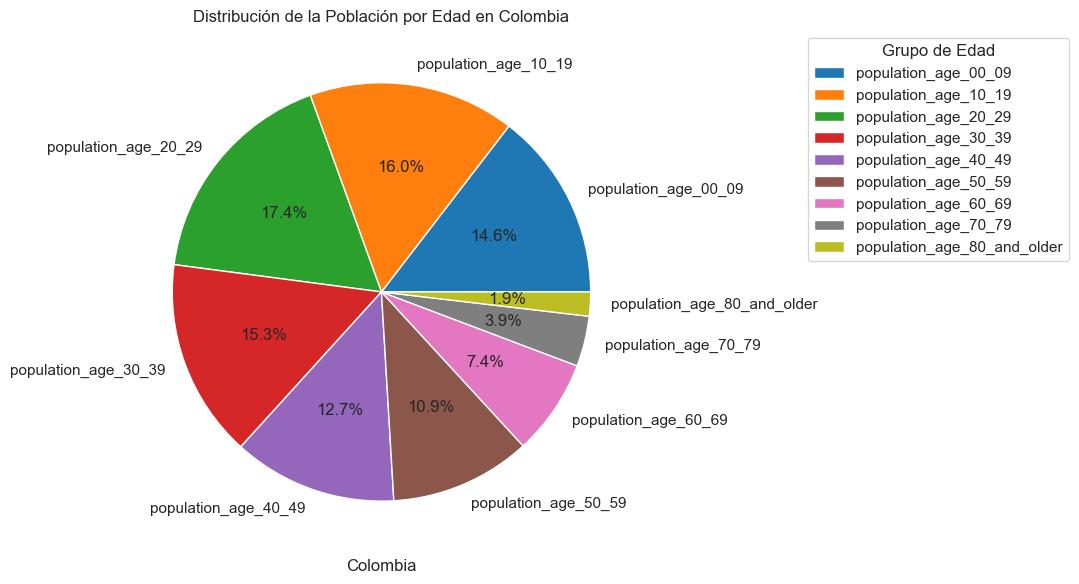

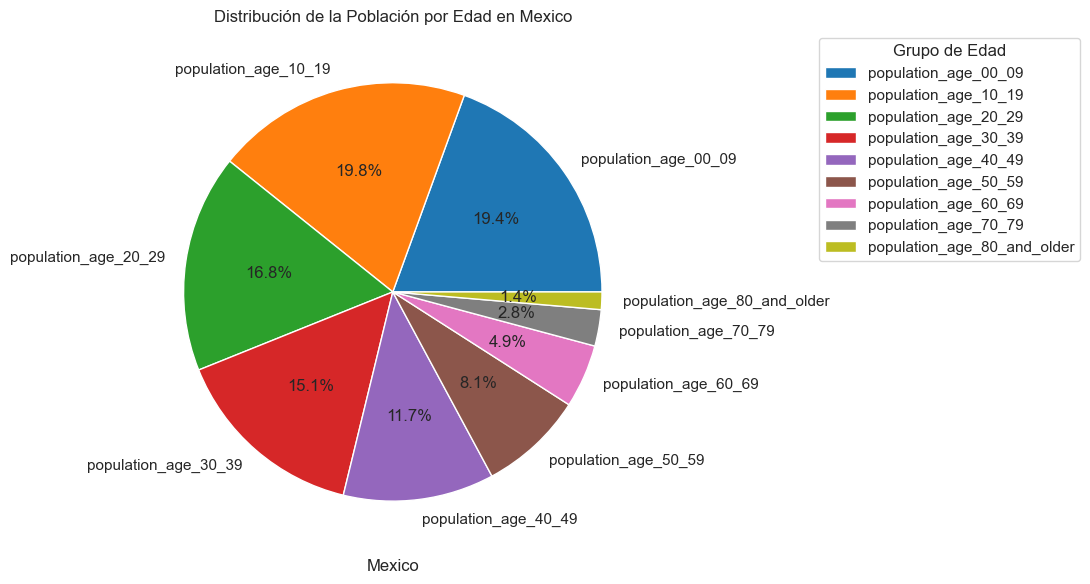

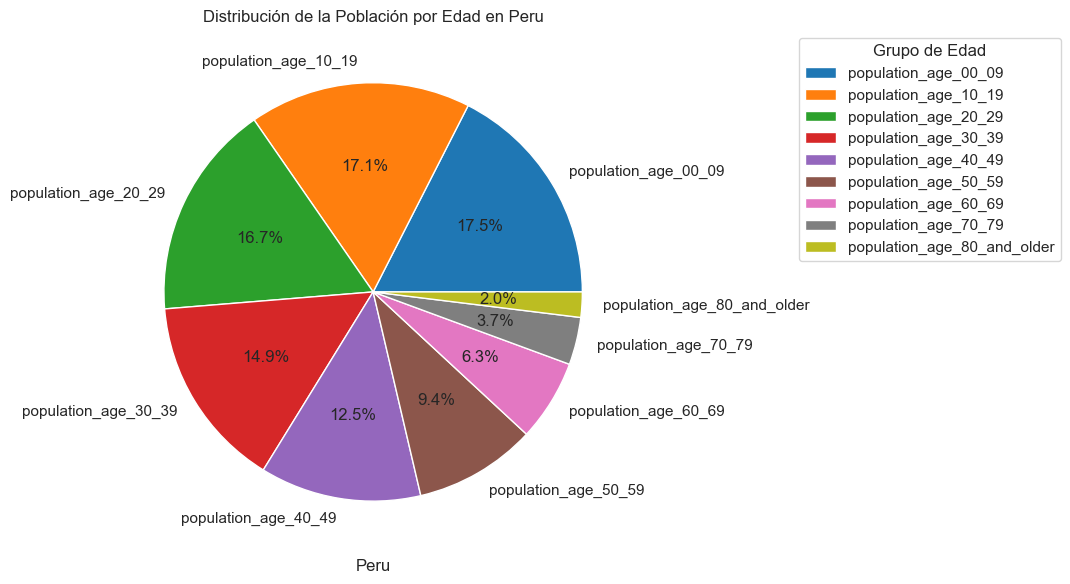

In [77]:
# Densidad de población por grupos de edad

# Identifica los 10 países con el porcentaje de mortalidad más alto, basándose en la columna 'deceased_percentage'
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(10).index

# Define los grupos de edad en columnas que serán analizados
age_groups = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Calcula la distribución promedio de población por grupo de edad para los países con alta mortalidad
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

# Extrae los nombres únicos de los países seleccionados para realizar un gráfico para cada país
paises = age_distribution.index.unique()

# Itera sobre cada país y genera un gráfico de pastel (pie chart) para mostrar la distribución de población por grupo de edad
for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,  # Valores de distribución de edad para el país actual
        labels=age_distribution.loc[pais].index,  # Etiquetas de grupos de edad
        autopct='%1.1f%%'  # Formato de porcentaje para cada segmento del gráfico
    )
    
    # Etiqueta el gráfico con el nombre del país actual
    plt.xlabel(f"{pais}")
    plt.title(f'Distribución de la Población por Edad en {pais}')
    
    # Configura la leyenda para identificar cada grupo de edad
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    
    # Ajusta el diseño para evitar que los elementos se solapen
    plt.tight_layout()
    
    # Muestra el gráfico de pastel para el país actual
    plt.show()



-Comparación de Estrategias de Vacunación en América Latina

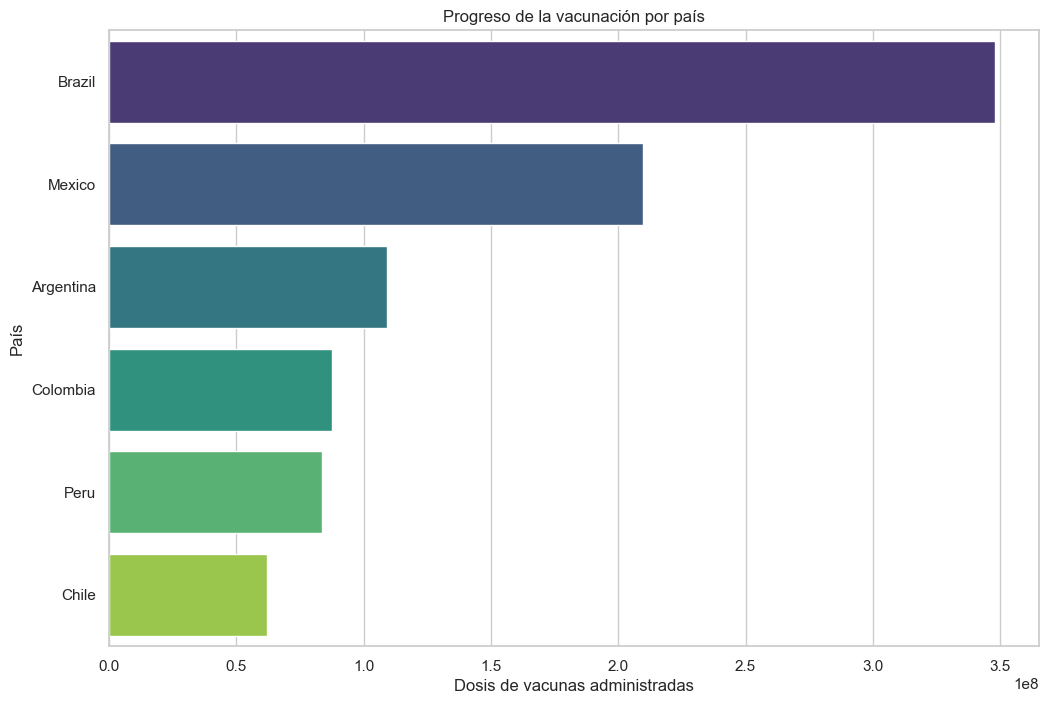

In [78]:
# Comparación de Estrategias de Vacunación en América Latina

# Agrupa los datos por país y calcula el total máximo de dosis de vacunas administradas en cada país.
# Luego, ordena los resultados de forma descendente para mostrar los países con más dosis administradas primero.
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(12, 8))

# Crea un gráfico de barras usando seaborn para comparar la cantidad de dosis de vacunas administradas por país
# 'x' son los valores de dosis administradas y 'y' corresponde a los nombres de los países.
# La paleta de colores "viridis" proporciona una visualización continua y atractiva de los valores.
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette="viridis")

# Configura la etiqueta del eje x para describir que muestra la cantidad de dosis administradas
plt.xlabel('Dosis de vacunas administradas')

# Configura la etiqueta del eje y para mostrar los nombres de los países
plt.ylabel('País')

# Título del gráfico que describe el propósito: comparar el progreso de vacunación por país en América Latina
plt.title('Progreso de la vacunación por país')

# Muestra el gráfico en pantalla
plt.show()


El pais con mayor dosis administradas es Brasiil, seguido de Mexico, Argentina, Colombia, Peru y Chile Peru. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada pais y las vacunas disponibles

In [12]:

# Agrupar por país y sumar las vacunas administradas
total_vacunas_por_pais = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].sum()
total_vacunas_por_pais = total_vacunas_por_pais.sort_values(ascending=False)
# Mostrar el resultado
print(total_vacunas_por_pais)


country_name
Brazil       1.325521e+11
Mexico       3.289766e+10
Peru         2.374644e+10
Chile        2.180868e+10
Argentina    2.156296e+10
Colombia     1.245721e+10
Name: cumulative_vaccine_doses_administered, dtype: float64


-Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [79]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [80]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [81]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru         0.007357
Chile        0.006015
Brazil       0.003224
Colombia     0.003061
Argentina    0.002889
Mexico       0.002739
Name: deceased_percentage, dtype: float64

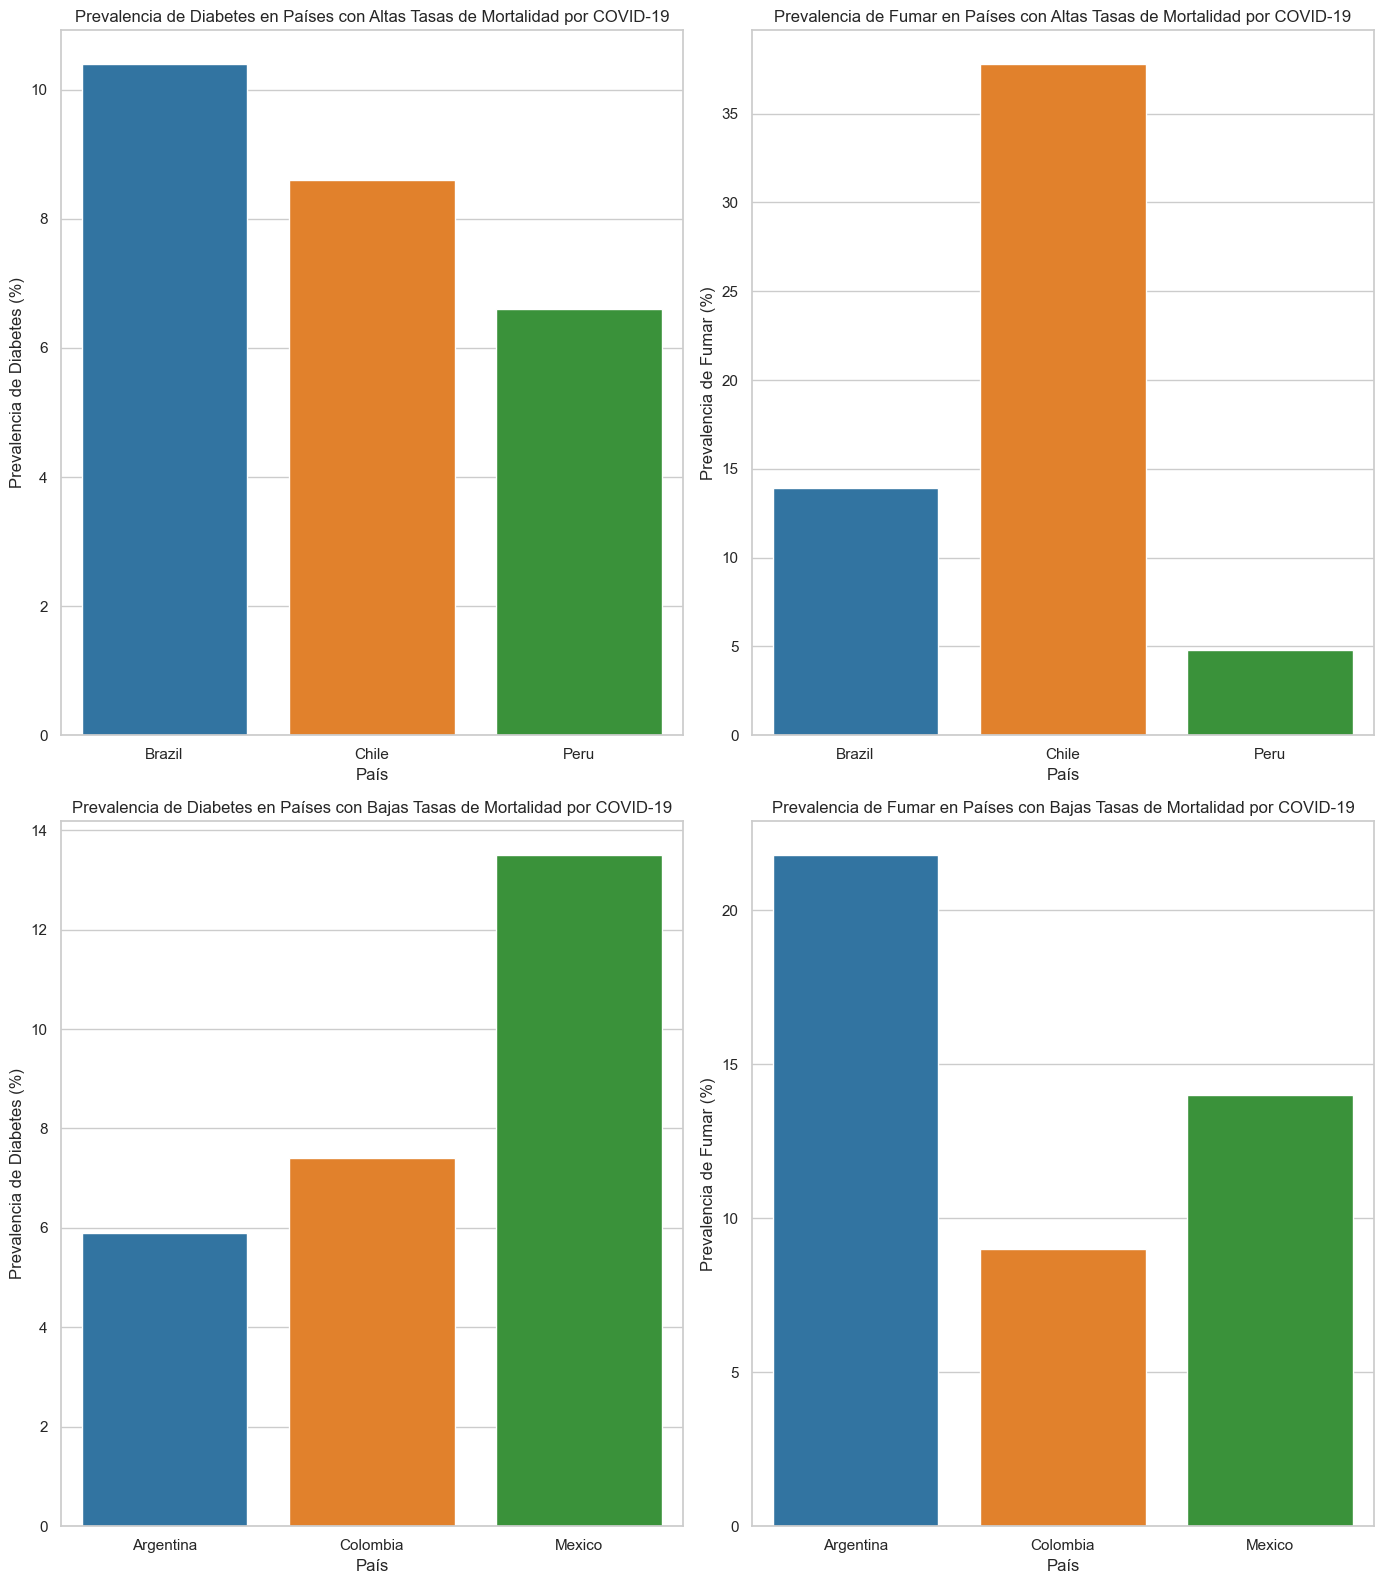

In [82]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

# Selección de países con altas y bajas tasas de mortalidad
# Agrupa los datos por país y calcula la tasa máxima de mortalidad ('deceased_percentage') por país.
# Luego selecciona los 3 países con las tasas de mortalidad más altas (top_countries) y los 3 países con las más bajas (bottom_countries).
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 3 países con mayor mortalidad
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 3 países con menor mortalidad

# Filtra los datos para incluir solo los países seleccionados (altas y bajas tasas de mortalidad)
conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

# Configuración de la visualización en una cuadrícula de 2x2 para comparar prevalencias
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Gráfico de prevalencia de diabetes en países con altas tasas de mortalidad
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Gráfico de prevalencia de fumar en países con altas tasas de mortalidad
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Gráfico de prevalencia de diabetes en países con bajas tasas de mortalidad
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Gráfico de prevalencia de fumar en países con bajas tasas de mortalidad
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

# Ajusta el espaciado entre gráficos para una mejor presentación
plt.tight_layout()

# Muestra todos los gráficos en la cuadrícula
plt.show()


Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 


-Evolución de Casos Activos vs. Recuperados


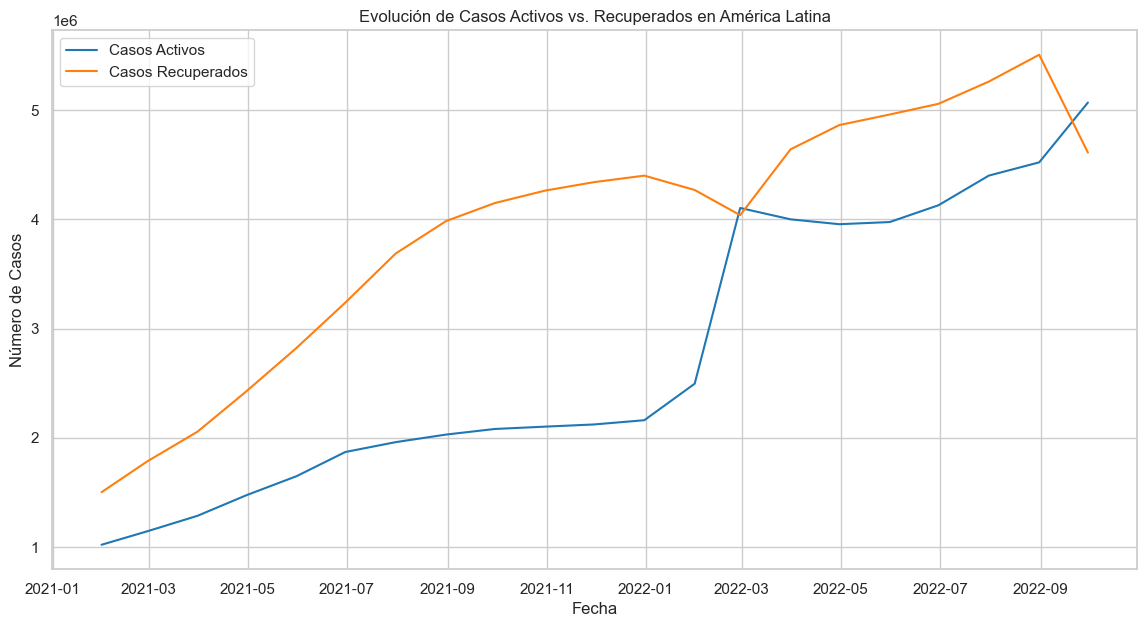

In [84]:
# Como evolucionan los casos activos y recuperados en América Latina

## Creo la columna active_cases
# Calculamos los "casos activos" restando el total de fallecidos y el total de recuperados del total de casos confirmados.
# Esto nos da el número de personas que actualmente están infectadas.
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos líneas sobre el mismo eje: 
plt.figure(figsize=(14, 7))  # Configuramos el tamaño de la figura para que sea de 14x7 pulgadas

# Creamos una línea que muestra la evolución de los casos activos a lo largo del tiempo.
# Utilizamos "resample('ME')" para agrupar los datos por mes y ".mean(numeric_only=True)" para calcular el promedio mensual de los valores numéricos.
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')

# Creamos una segunda línea en el mismo gráfico que muestra la evolución de los casos recuperados a lo largo del tiempo.
# Resampling y cálculo del promedio mensual se aplican de la misma forma.
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

# Configuramos las etiquetas del gráfico para mejorar la interpretación.
plt.xlabel('Fecha')  # Etiqueta del eje X como "Fecha"
plt.ylabel('Número de Casos')  # Etiqueta del eje Y como "Número de Casos"
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')  # Título descriptivo del gráfico

# Añadimos una leyenda para identificar las líneas (Casos Activos y Casos Recuperados)
plt.legend()

# Mostramos el gráfico en pantalla
plt.show()


La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

-Relación entre la Cobertura de Vacunación y la Reducción de Casos


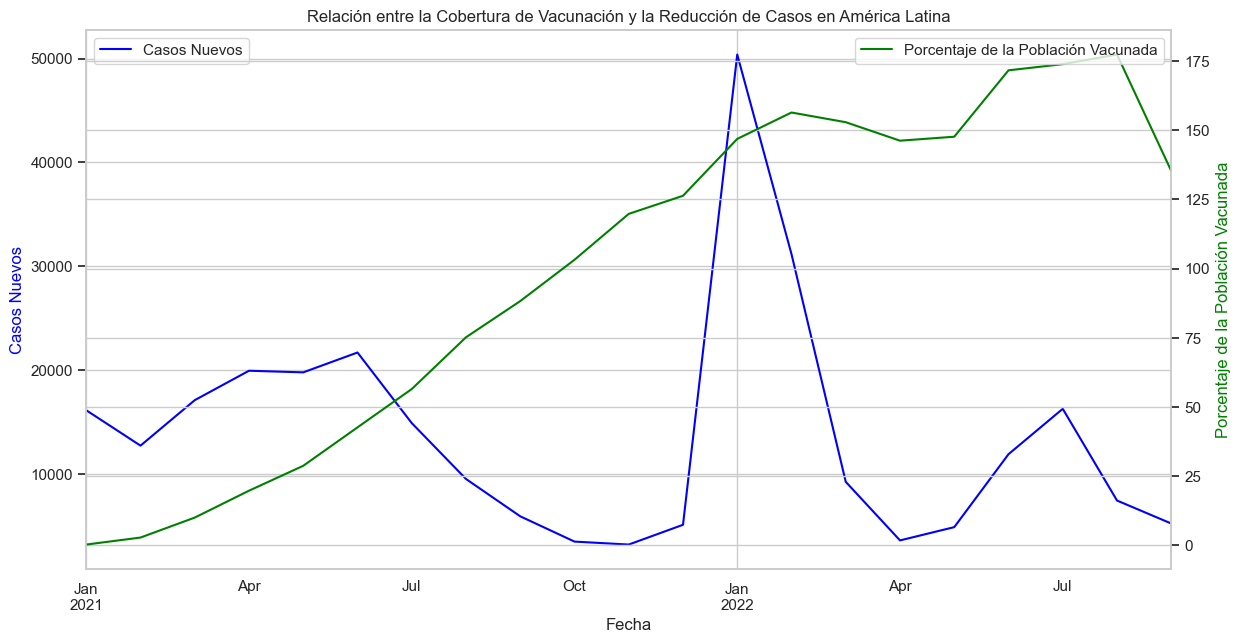

In [83]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19 

plt.figure(figsize=(14, 7))  # Configuramos el tamaño de la figura en 14x7 pulgadas

# Definimos dos ejes Y para el gráfico: uno para los casos nuevos y otro para el porcentaje de vacunación.
ax1 = plt.gca()  # "ax1" será el eje principal del gráfico, utilizado para los casos nuevos de COVID-19
ax2 = ax1.twinx()  # "ax2" es un segundo eje Y, que comparte el mismo eje X y será usado para el porcentaje de vacunación

# Crea una nueva columna en el DataFrame para almacenar el porcentaje de población vacunada
# Calculamos el porcentaje de vacunación dividiendo el total de dosis administradas acumuladas
# por la población total y multiplicando por 100 para obtener un valor en porcentaje.
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Graficamos dos líneas en el mismo gráfico utilizando los dos ejes Y definidos (ax1 y ax2)

# Línea para los "Casos Nuevos" de COVID-19:
# Agrupamos los datos por mes utilizando "resample('ME')" y calculamos el promedio mensual para suavizar los datos diarios.
# Utilizamos "ax=ax1" para indicar que esta línea debe graficarse en el eje Y principal (ax1).
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')

# Línea para el "Porcentaje de la Población Vacunada":
# También agrupamos por mes y calculamos el promedio mensual.
# Utilizamos "ax=ax2" para indicar que esta línea debe graficarse en el segundo eje Y (ax2).
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')

# Personalización del gráfico
ax1.set_xlabel('Fecha')  # Etiqueta del eje X como "Fecha"
ax1.set_ylabel('Casos Nuevos', color='blue')  # Etiqueta del eje Y principal (casos nuevos) con color azul
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')  # Etiqueta del segundo eje Y (porcentaje vacunación) con color verde
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')  # Título del gráfico

# Añadimos leyendas para cada línea en posiciones opuestas para mejorar la claridad
ax1.legend(loc='upper left')  # Leyenda para los casos nuevos, situada en la esquina superior izquierda
ax2.legend(loc='upper right')  # Leyenda para el porcentaje de vacunación, situada en la esquina superior derecha

# Mostramos el gráfico en pantalla
plt.show()


Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

-('País') Progreso de la vacunación por país

In [85]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina    109204825.0
Brazil       347868481.0
Chile         62204235.0
Colombia      87566541.0
Mexico       209673612.0
Peru          83624934.0
Name: cumulative_vaccine_doses_administered, dtype: float64

In [86]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina     44938712.0
Brazil       212559409.0
Chile         17574003.0
Colombia      50882884.0
Mexico       110991953.0
Peru          29381884.0
Name: population, dtype: float64

In [87]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    2.430084
Brazil       1.636571
Chile        3.539560
Colombia     1.720943
Mexico       1.889088
Peru         2.846139
dtype: float64

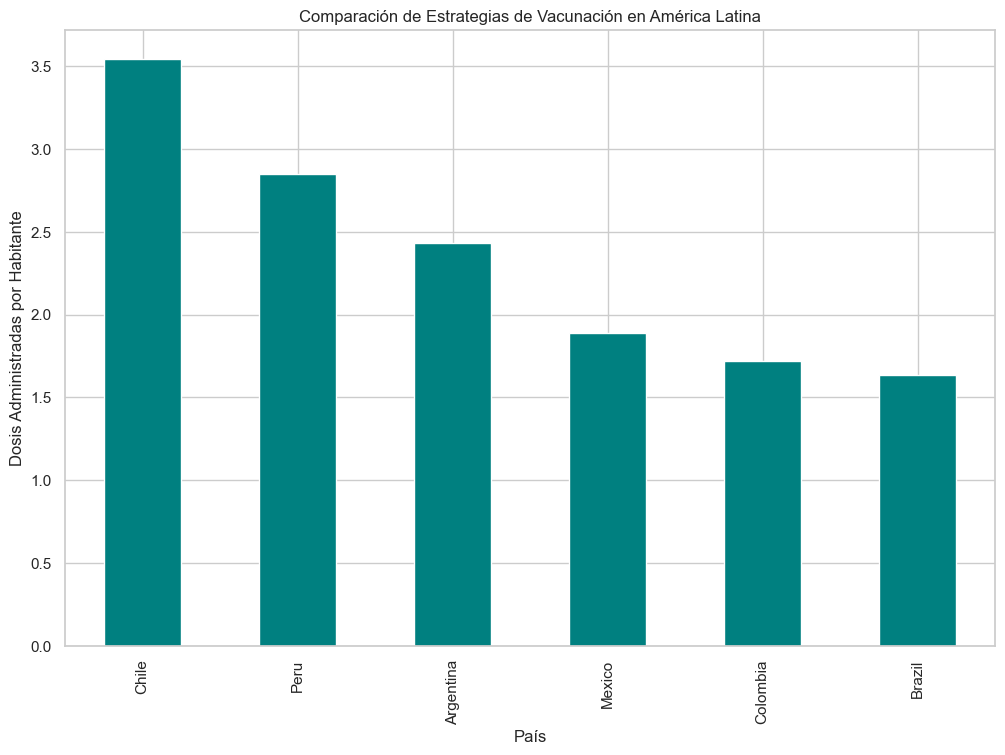

In [88]:
# Cálculo de la estrategia de vacunación para cada país

# Divide la máxima cantidad de dosis de vacunas administradas por el promedio de la población de cada país.
# Esto da como resultado una métrica de "dosis administradas por habitante" para cada país.
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

# Ordena los países de mayor a menor en términos de dosis administradas por habitante y grafica los resultados en un gráfico de barras.
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

# Configuración de etiquetas y título para la gráfica
plt.xlabel('País')  # Etiqueta del eje X, que representa cada país
plt.ylabel('Dosis Administradas por Habitante')  # Etiqueta del eje Y, que representa la cantidad de dosis administradas por cada habitante
plt.title('Comparación de Estrategias de Vacunación en América Latina')  # Título de la gráfica

# Muestra la gráfica de barras final
plt.show()


Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.



-Análisis Temporal de la Mortalidad/

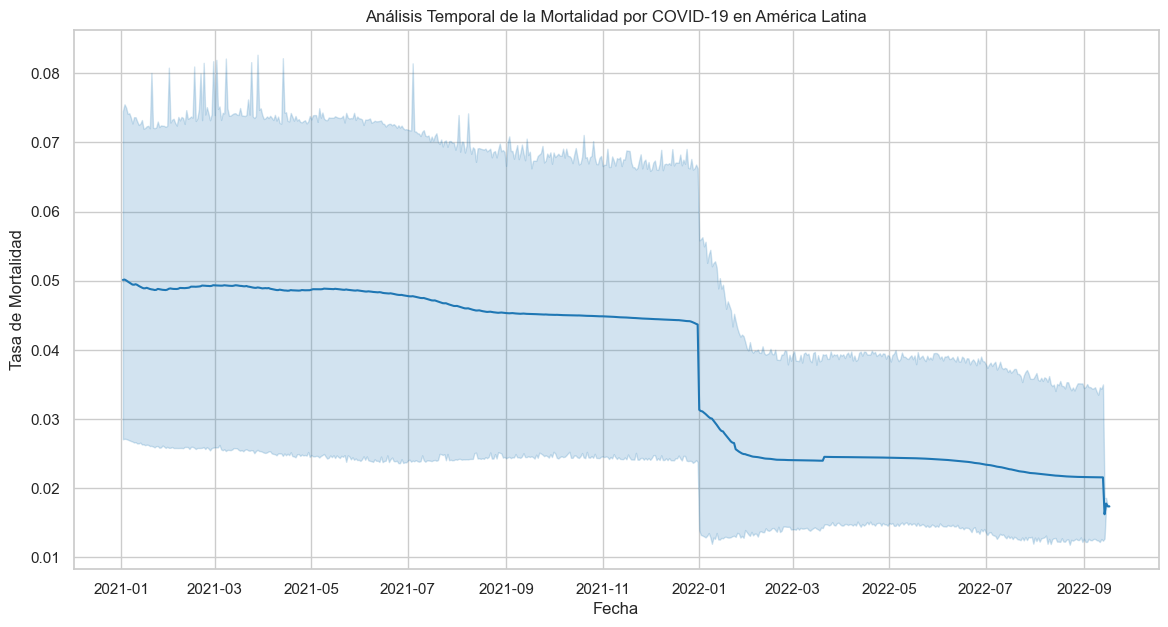

In [89]:
# Cálculo de la tasa de mortalidad por COVID-19

# Calcula la tasa de mortalidad como la relación entre las muertes acumuladas y los casos confirmados acumulados.
# Esta tasa representa la proporción de muertes sobre el total de casos confirmados en un momento dado.
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Configuración de la visualización para la evolución temporal de la tasa de mortalidad
plt.figure(figsize=(14, 7))  # Define el tamaño de la figura
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date',  # Usa la fecha para el eje x, lo que permite observar el cambio en el tiempo
    y='mortality_rate',  # La tasa de mortalidad será el eje y
    estimator='mean'  # Toma el promedio de la tasa de mortalidad para cada fecha
)

# Configuración de etiquetas y título para la gráfica
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')  # Título de la gráfica
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Tasa de Mortalidad')  # Etiqueta del eje y

# Muestra el gráfico de líneas que permite observar la evolución de la tasa de mortalidad con el tiempo
plt.show()


-Evolución del Número de Muertes Diarias.

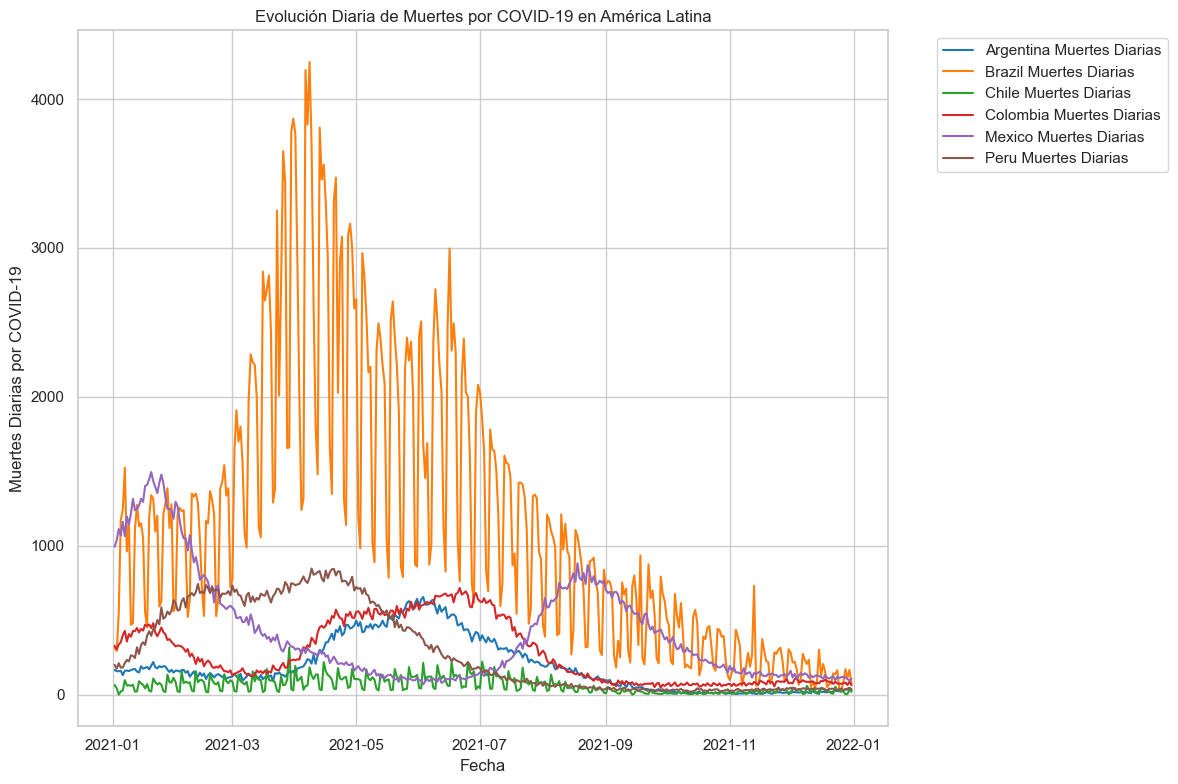

In [90]:
# Filtrar solo los datos de muertes diarias

# Agrupa los datos por país y fecha, y calcula la suma de muertes diarias ('new_deceased') por cada combinación.
# Luego, restablece el índice para que 'country_name' y 'date' sean columnas.
daily_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'date'])[['new_deceased']].sum().reset_index()

# Crea la figura y el eje para la gráfica
fig, ax = plt.subplots(figsize=(12, 8))  # Define un tamaño adecuado para la visualización

# Graficar las muertes diarias para cada país
# Itera sobre cada país único en los datos de muertes diarias
for country in daily_cases['country_name'].unique():
    # Filtra los datos para obtener únicamente las muertes diarias de un país específico
    country_daily_cases = daily_cases[daily_cases['country_name'] == country]
    # Grafica la evolución diaria de muertes de ese país
    ax.plot(country_daily_cases['date'], country_daily_cases['new_deceased'], label=f'{country} Muertes Diarias')

# Configuración de la gráfica
ax.set_xlabel("Fecha")  # Etiqueta del eje x como "Fecha"
ax.set_ylabel("Muertes Diarias por COVID-19")  # Etiqueta del eje y para indicar las muertes diarias
ax.set_title("Evolución Diaria de Muertes por COVID-19 en América Latina")  # Título descriptivo de la gráfica

# Añade una leyenda a la gráfica con etiquetas para cada país
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posiciona la leyenda fuera de la gráfica para mejor visualización

# Ajusta el diseño de la gráfica para evitar que los elementos se superpongan
plt.tight_layout()

# Muestra la gráfica final, que muestra la evolución diaria de muertes para cada país en América Latina
plt.show()



-Tasa de Crecimiento (%)

-Comparación de la Situación Actual (Contexto de los datos)

In [91]:
# Agrupa los datos por 'country_name' y selecciona las columnas relevantes ('active_cases', 'cumulative_recovered', 'cumulative_deceased').
# Luego, toma el último valor registrado en cada grupo (representando el valor más reciente en cada país).
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last()

# Ordena los datos resultantes por la columna 'active_cases' en orden ascendente,
# permitiendo ver los países desde aquellos con menos casos activos hasta aquellos con más.
current_situation = current_situation.sort_values(by="active_cases")

# Muestra el DataFrame 'current_situation', que contiene la situación actual de casos activos, recuperados y fallecimientos en cada país.
current_situation


active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina     5.973863e+06                   0.0        105716.119355
Brazil        5.973863e+06                   0.0        105716.119355
Chile         5.973863e+06                   0.0        105716.119355
Colombia      5.973863e+06                   0.0        105716.119355
Mexico        5.973863e+06                   0.0        105716.119355
Peru          5.973863e+06                   0.0        105716.119355

In [92]:
# Agrupa los datos por 'country_name' y selecciona las columnas de interés
# ('active_cases', 'cumulative_recovered', 'cumulative_deceased').
# Se utiliza max() para obtener el valor máximo registrado en cada país,
# garantizando que capture el acumulado total de recuperados y fallecidos.
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max()

# Ordena los datos resultantes en orden ascendente de 'active_cases'
# para ver los países desde aquellos con menos casos activos hasta aquellos con más.
current_situation = current_situation.sort_values(by="active_cases")

# Muestra el DataFrame 'current_situation', que contiene el acumulado máximo de casos activos,
# recuperados y fallecidos para cada país.
current_situation



active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile         5.973863e+06                   0.0        105716.119355
Mexico        5.973863e+06                   0.0        304025.000000
Peru          5.973863e+06                   0.0        216173.000000
Colombia      6.162609e+06             5441021.0        155770.000000
Argentina     9.567933e+06                   0.0        129830.000000
Brazil        3.381931e+07            33706231.0        685203.000000

In [93]:
# Selecciona las columnas de interés: 'country_name', 'active_cases', 'cumulative_recovered', 'cumulative_deceased'.
# Luego, filtra las filas cuyo índice sea igual a la última fecha en el DataFrame.
data_latinoamerica_paises_last_date = data_latinoamerica_paises[['country_name', 'active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    data_latinoamerica_paises.index == data_latinoamerica_paises.index.max() # Filtra por la última fecha en el índice.
]

# Muestra los datos filtrados
data_latinoamerica_paises_last_date


country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina  5.973863e+06                   0.0   
2022-09-17       Brazil  5.973863e+06                   0.0   
2022-09-17        Chile  5.973863e+06                   0.0   
2022-09-17     Colombia  5.973863e+06                   0.0   
2022-09-17       Mexico  5.973863e+06                   0.0   
2022-09-17         Peru  5.973863e+06                   0.0   

            cumulative_deceased  
date                             
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355  
2022-09-17        105716.119355

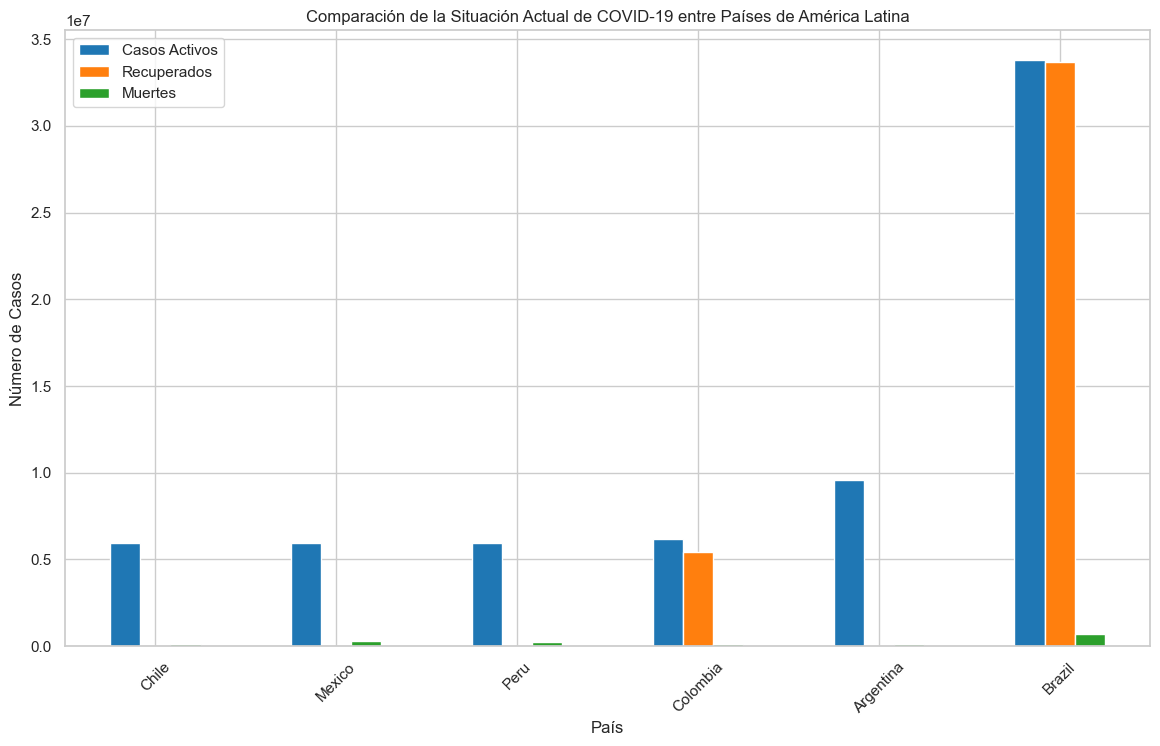

In [94]:
# Agrupa los datos por país y selecciona las columnas de interés: casos activos, recuperados acumulados y fallecidos acumulados.
# Luego, toma el valor máximo para cada país en estas columnas. Esto permite obtener los valores más altos de casos activos,
# recuperados y muertes acumulados, ya que no todos los países tienen datos completos.
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")

# Grafica los datos de la situación actual en un gráfico de barras.
# Cada barra representa un país, con las columnas separadas para mostrar los casos activos, recuperados y muertes.
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))

# Configura el título del gráfico para indicar el análisis que se está realizando.
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')

# Etiqueta del eje X para indicar que representa los países.
plt.xlabel('País')

# Etiqueta del eje Y para indicar que representa el número de casos.
plt.ylabel('Número de Casos')

# Agrega una leyenda para identificar cada tipo de dato (Casos Activos, Recuperados, Muertes) en el gráfico.
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])

# Rota las etiquetas del eje X (nombres de países) para facilitar su lectura.
plt.xticks(rotation=45)

# Muestra el gráfico.
plt.show()


### EXTRA CREDIT

In [95]:
! pip install folium


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
! pip freeze > ../requirements.txt

In [97]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

In [98]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [99]:
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [100]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [101]:
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [102]:
# Mergeo con mi dataset agrupado
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...         9.697763e+06  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...         6.079579e+06  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...         6.079579e+06  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...         3.456883e+07  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...         6.079579e+06  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...         6.304317e+06  

[6 rows x 170 columns]

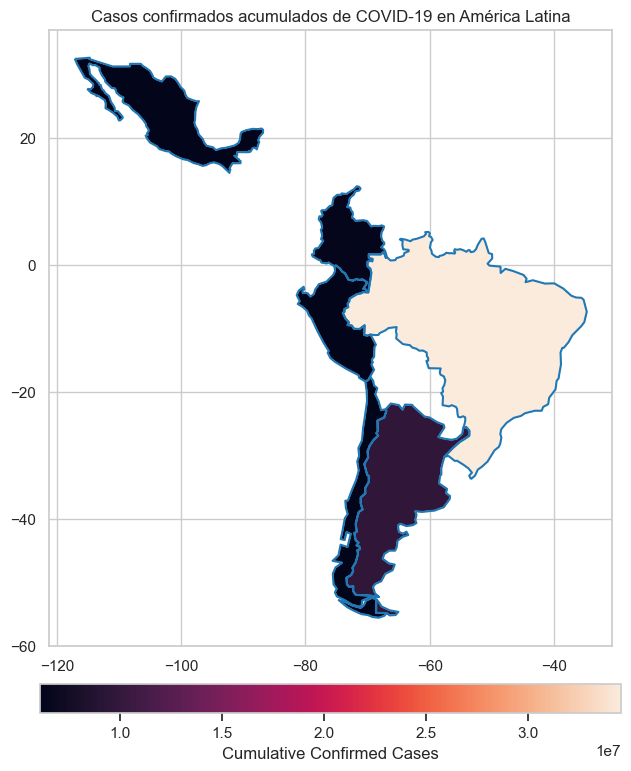

In [103]:
# Crea una figura y un solo eje (ax) con un tamaño específico de 15x10 pulgadas.
fig, ax = plt.subplots(1, 1, figsize=(15, 10)) 

# Dibuja las fronteras de los países en el mapa mundial utilizando el objeto 'world'.
# Esto ayuda a definir claramente los límites geográficos en el gráfico.
world.boundary.plot(ax=ax)

# Dibuja el mapa mundial, coloreando los países según el número acumulado de casos confirmados de COVID-19.
# Se utiliza el argumento 'column' para especificar la columna de datos que se va a visualizar.
# 'ax=ax' especifica que se debe dibujar en el eje previamente definido.
# Se agrega una leyenda para explicar el significado de los colores.
# 'legend_kwds' permite personalizar la leyenda, estableciendo el título, la orientación horizontal,
# el tamaño de la leyenda, el espacio entre elementos y el aspecto de la leyenda.
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})

# Establece el título del gráfico, que describe lo que se está mostrando en el mapa.
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')

# Muestra el gráfico en la pantalla.
plt.show()



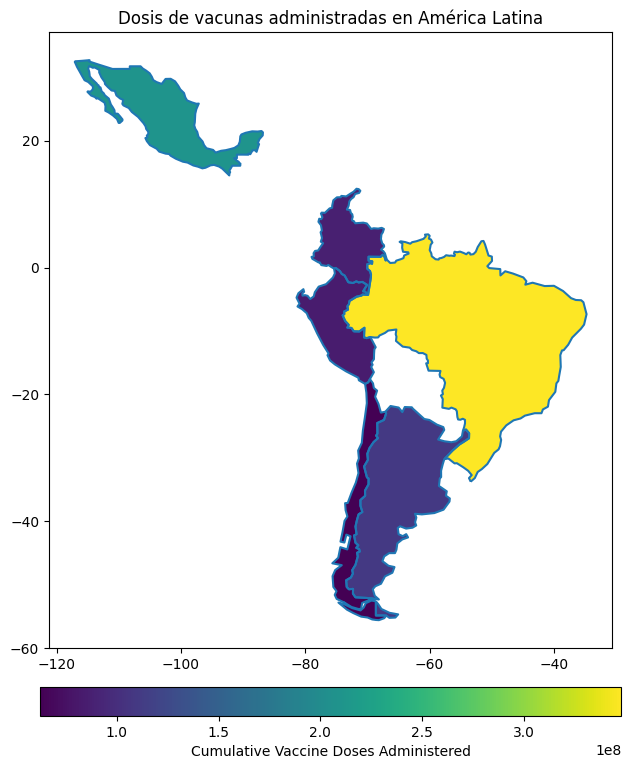

In [135]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

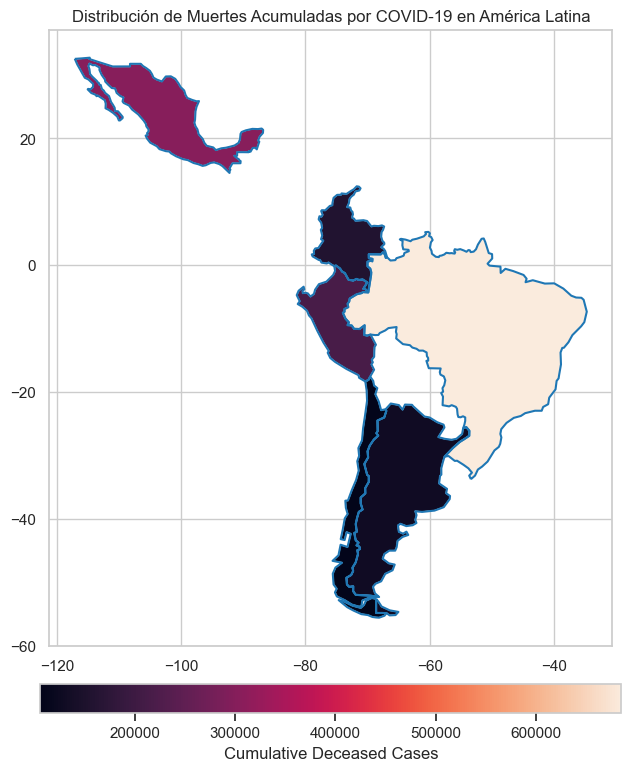

In [104]:
# Se crea un mapa para visualizar la distribución de muertes en América Latina por país.

# Se realiza una fusión (merge) entre el DataFrame 'world' y los datos de muertes acumuladas por país.
# Se agrupan los datos por 'country_name' y se obtienen las muertes acumuladas utilizando 'max()' para 
# asegurarse de que se considera la cifra más reciente. El resultado se reinicia el índice para 
# facilitar la fusión.
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")

# Se crea una figura y un solo eje (ax) con un tamaño específico de 15x10 pulgadas.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dibuja las fronteras de los países en el mapa mundial utilizando el objeto 'world'.
# Esto define claramente los límites geográficos en el gráfico.
world.boundary.plot(ax=ax)

# Dibuja el mapa mundial, coloreando los países según el número acumulado de muertes por COVID-19.
# El argumento 'column' se utiliza para especificar la columna de datos que se va a visualizar.
# 'ax=ax' especifica que se debe dibujar en el eje previamente definido.
# Se agrega una leyenda para explicar el significado de los colores.
# 'legend_kwds' permite personalizar la leyenda, estableciendo el título, la orientación horizontal,
# el tamaño de la leyenda, el espacio entre elementos y el aspecto de la leyenda.
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})

# Establece el título del gráfico, que describe lo que se está mostrando en el mapa.
plt.title('Distribución de Muertes Acumuladas por COVID-19 en América Latina')

# Muestra el gráfico en la pantalla.
plt.show()


Correlación entre algunas variables


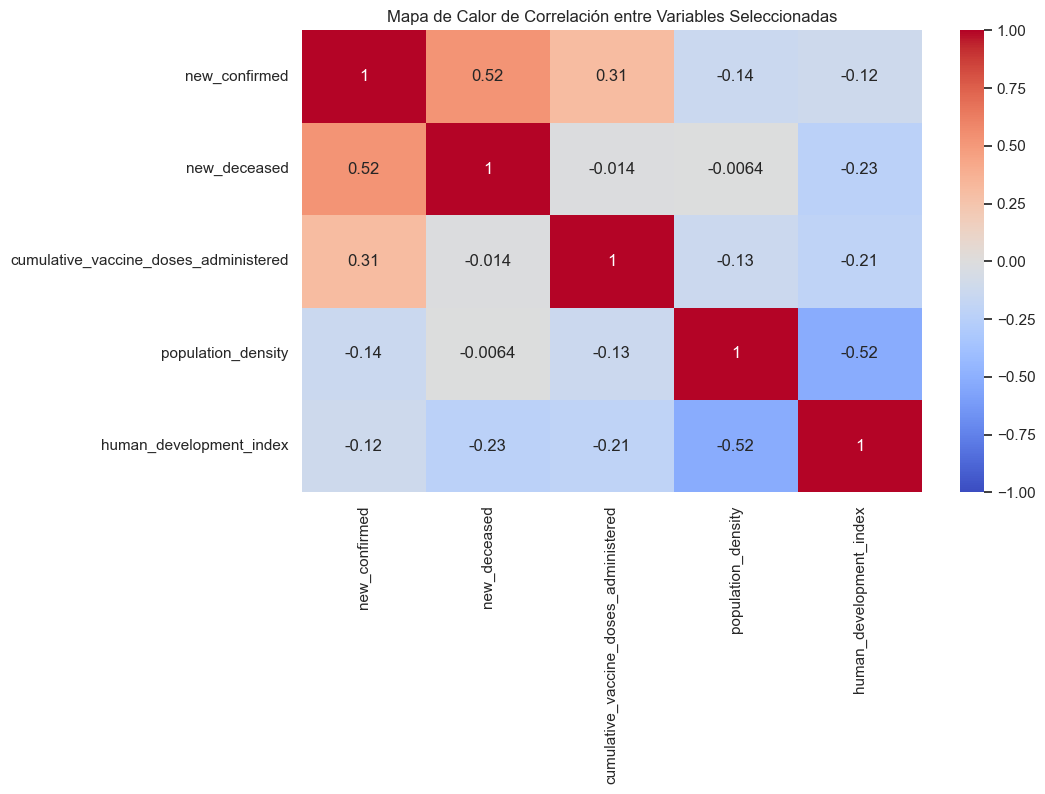

In [105]:

# Selecciona las cinco columnas clave para el análisis de correlación
selected_columns = data_latinoamerica_paises[['new_confirmed', 'new_deceased', 
                                              'cumulative_vaccine_doses_administered', 
                                              'population_density', 'human_development_index']]

# Calcula la matriz de correlación para estas columnas
correlation_matrix = selected_columns.corr()

# Visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlación entre Variables Seleccionadas")
plt.show()


In [106]:

# Seleccionar solo las columnas 'country_name' y 'population'
population_data = data_latinoamerica_paises[['country_name', 'population']]

# Eliminar duplicados para obtener un único valor de población por país
population_data = population_data.drop_duplicates(subset='country_name')

# Mostrar los datos de población por país
print(population_data)



           country_name   population
date                                
2021-01-02    Argentina   44938712.0
2021-01-02       Brazil  212559409.0
2021-01-02        Chile   17574003.0
2021-01-02     Colombia   50882884.0
2021-01-02       Mexico  110991953.0
2021-01-02         Peru   29381884.0


In [107]:

# Verificamos los países específicos y rellenamos los valores cero en la columna 'cumulative_vaccine_doses_administered'

# Lista de países donde queremos reemplazar ceros
paises_a_corregir = ['Mexico', 'Colombia', 'Peru']

# Función para rellenar los ceros con el valor anterior
def rellenar_ceros(data_latinoamerica_paises):
    # Reemplazamos solo los valores cero con nulos para poder aplicar ffill
    data_latinoamerica_paises['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'].replace(0, pd.NA)
    # Rellenamos hacia adelante con el último valor válido
    data_latinoamerica_paises['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'].fillna(method='ffill')
    return data_latinoamerica_paises

# Aplicamos la función solo a los países en la lista
data_latinoamerica_paises.loc[data_latinoamerica_paises['country_name'].isin(paises_a_corregir)] = (
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_a_corregir)]
    .groupby('country_name', group_keys=False)
    .apply(rellenar_ceros)
)

# Verificación: mostramos los primeros registros para confirmar
print(data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_a_corregir)].head())


           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           CO           CO     Colombia        11723.0   
2021-01-03           CO           CO     Colombia        10808.0   
2021-01-04           CO           CO     Colombia        16688.0   
2021-01-05           CO           CO     Colombia        22234.0   
2021-01-06           CO           CO     Colombia        20143.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         328.0             1723443.0              50806.0   
2021-01-03         304.0             1734251.0              51110.0   
2021-01-04         336.0             1750939.0              51446.0   
2021-01-05         352.0             1773173.0              51798.0   
2021-01-06         399.0             1793316.0              52197.0   

           cumulative_vac

In [108]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame y 'date' es el índice
# Aquí se busca cualquier valor cero en la columna 'cumulative_vaccine_doses_administered'

# Filtramos las filas donde 'cumulative_vaccine_doses_administered' es igual a cero
zeros_in_doses = data_latinoamerica_paises[data_latinoamerica_paises['cumulative_vaccine_doses_administered'] == 0]

# Comprobamos si hay valores cero y mostramos el resultado
if not zeros_in_doses.empty:
    print("Se encontraron valores cero en la columna 'cumulative_vaccine_doses_administered'.")
    print(zeros_in_doses)
else:
    print("No se encontraron valores cero en la columna 'cumulative_vaccine_doses_administered'.")


Se encontraron valores cero en la columna 'cumulative_vaccine_doses_administered'.
           location_key country_code country_name  new_confirmed  \
date                                                               
2022-09-14           AR           AR    Argentina   12911.385484   
2022-09-15           AR           AR    Argentina   12911.385484   
2022-09-16           AR           AR    Argentina   12911.385484   
2022-09-17           AR           AR    Argentina   12911.385484   
2021-01-02           BR           BR       Brazil   15827.000000   
2021-01-03           BR           BR       Brazil   17341.000000   
2021-01-04           BR           BR       Brazil   20006.000000   
2021-01-05           BR           BR       Brazil   56648.000000   
2021-01-06           BR           BR       Brazil   63430.000000   
2021-01-07           BR           BR       Brazil   87843.000000   
2021-01-08           BR           BR       Brazil   52035.000000   
2021-01-09           BR          

Matriz de ponderación

In [109]:
import pandas as pd

# Supongamos que ya tienes el DataFrame 'data_latinoamerica_paises' cargado y configurado

# Agregar la columna de índice de mortalidad calculado
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Agrupar por país y sumar o promediar los totales para cada indicador
grouped_data = data_latinoamerica_paises.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'cumulative_vaccine_doses_administered': 'sum',
    'population': 'sum',
    'nurses_per_1000': 'mean',
    'human_development_index': 'mean',
    'mortality_rate': 'mean',
    'new_deceased': 'sum',
    'physicians_per_1000': 'mean',
    'population_density': 'mean'
}).reset_index()

# Normalizamos cada columna dividiendo por su suma total
normalization_factors = grouped_data[['new_confirmed', 'cumulative_vaccine_doses_administered', 
                                      'population', 'nurses_per_1000', 
                                      'human_development_index', 'mortality_rate', 
                                      'new_deceased', 'physicians_per_1000', 
                                      'population_density']].sum()

# Crear la matriz de ponderación
weight_matrix = grouped_data[['country_name']].copy()
weight_matrix['new_confirmed'] = grouped_data['new_confirmed'] / normalization_factors['new_confirmed']
weight_matrix['cumulative_vaccine_doses_administered'] = grouped_data['cumulative_vaccine_doses_administered'] / normalization_factors['cumulative_vaccine_doses_administered']
weight_matrix['population'] = grouped_data['population'] / normalization_factors['population']
weight_matrix['nurses_per_1000'] = grouped_data['nurses_per_1000'] / normalization_factors['nurses_per_1000']
weight_matrix['human_development_index'] = grouped_data['human_development_index'] / normalization_factors['human_development_index']
weight_matrix['mortality_rate'] = grouped_data['mortality_rate'] / normalization_factors['mortality_rate']
weight_matrix['new_deceased'] = grouped_data['new_deceased'] / normalization_factors['new_deceased']
weight_matrix['physicians_per_1000'] = grouped_data['physicians_per_1000'] / normalization_factors['physicians_per_1000']
weight_matrix['population_density'] = grouped_data['population_density'] / normalization_factors['population_density']

# Sumar los puntajes normalizados para cada país
weight_matrix['total_score'] = weight_matrix[['new_confirmed', 'cumulative_vaccine_doses_administered',
                                              'population', 'nurses_per_1000',
                                              'human_development_index', 'mortality_rate',
                                              'new_deceased', 'physicians_per_1000', 
                                              'population_density']].sum(axis=1)

# Mostrar solo los totales finales por país
final_scores = weight_matrix[['country_name', 'total_score']]
final_scores = final_scores.sort_values(by='total_score', ascending=False).reset_index(drop=True)

# Mostrar los resultados finales por país
print(final_scores)


  country_name total_score
0       Brazil    2.743369
1       Mexico    1.723046
2        Chile    1.209298
3         Peru    1.122267
4     Colombia    1.101206
5    Argentina    1.100815


In [50]:
import pandas as pd

# Supongamos que ya tienes el DataFrame 'data_latinoamerica_paises' cargado y configurado

# Agregar la columna de índice de mortalidad calculado
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Agrupar por país y calcular los totales de cada indicador (sumas o promedios, según corresponda)
grouped_data = data_latinoamerica_paises.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'cumulative_vaccine_doses_administered': 'sum',
    'population': 'sum',
    'nurses_per_1000': 'mean',
    'human_development_index': 'mean',
    'mortality_rate': 'mean',
    'new_deceased': 'sum',
    'physicians_per_1000': 'mean',
    'population_density': 'mean'
}).reset_index()

# Normalizamos cada columna dividiendo por su suma total
normalization_factors = grouped_data[['new_confirmed', 'cumulative_vaccine_doses_administered', 
                                      'population', 'nurses_per_1000', 
                                      'human_development_index', 'mortality_rate', 
                                      'new_deceased', 'physicians_per_1000', 
                                      'population_density']].sum()

# Normalizar los valores y reorganizar en el formato deseado
normalized_data = grouped_data.set_index('country_name')
for column in normalized_data.columns:
    normalized_data[column] = normalized_data[column] / normalization_factors[column]

# Transponer la tabla para que las filas sean los factores y las columnas los países
transposed_table = normalized_data.T

# Mostrar la tabla con países como columnas y factores como filas
print(transposed_table)


country_name                           Argentina    Brazil     Chile  \
new_confirmed                           0.154473  0.515648  0.073613   
cumulative_vaccine_doses_administered   0.088003  0.540974  0.089006   
population                              0.096367  0.455814  0.037686   
nurses_per_1000                         0.080707  0.314155  0.413683   
human_development_index                 0.176887  0.161664  0.178388   
mortality_rate                          0.086474  0.110690  0.088021   
new_deceased                            0.081040  0.473624  0.043200   
physicians_per_1000                     0.272960  0.148058  0.177262   
population_density                      0.080325  0.123691  0.125048   

country_name                           Colombia    Mexico      Peru  
new_confirmed                          0.089045  0.106410  0.060810  
cumulative_vaccine_doses_administered  0.050841  0.134262  0.096914  
population                             0.109114  0.238012  0.063007  

In [110]:
# Sumar todas las dosis aplicadas en Latinoamérica
total_doses = data_latinoamerica_paises['cumulative_vaccine_doses_administered'].sum()

print(f"El número total de dosis aplicadas en Latinoamérica es: {total_doses}")


El número total de dosis aplicadas en Latinoamérica es: 301238374240.0


In [111]:
import pandas as pd

# Agrupar por país y obtener el valor máximo de dosis administradas para cada uno
total_doses_administered = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sum()

# Mostrar el total de dosis administradas en toda Latinoamérica
print("Total de dosis administradas en Latinoamérica:", total_doses_administered)


Total de dosis administradas en Latinoamérica: 900142628.0


In [58]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

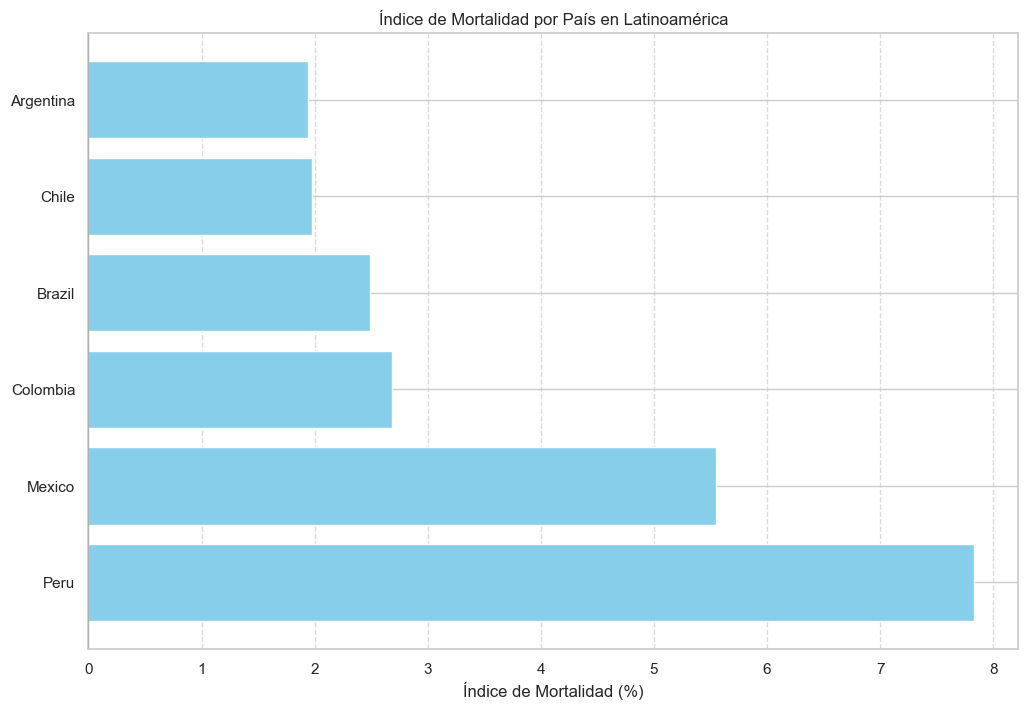

In [112]:


# Supongamos que ya tienes cargado el DataFrame `data_latinoamerica_paises`
# Asegúrate de que la columna de población no tenga valores nulos
data_latinoamerica_paises['population'] = data_latinoamerica_paises['population'].replace(0, pd.NA)

# Crear una nueva columna para el índice de mortalidad por país
# El índice de mortalidad se calcula como el número de muertes nuevas dividido por la población total
data_latinoamerica_paises['mortality_rate'] = (
    data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
) * 100  # Se multiplica por 100 para obtener el porcentaje

# Agrupar los datos por país y calcular la media del índice de mortalidad
mortality_rate_by_country = data_latinoamerica_paises.groupby('country_name')['mortality_rate'].mean().reset_index()

# Ordenar los países por el índice de mortalidad en orden descendente
mortality_rate_by_country = mortality_rate_by_country.sort_values(by='mortality_rate', ascending=False)

# Visualización del índice de mortalidad
plt.figure(figsize=(12, 8))
plt.barh(mortality_rate_by_country['country_name'], mortality_rate_by_country['mortality_rate'], color='skyblue')
plt.xlabel('Índice de Mortalidad (%)')
plt.title('Índice de Mortalidad por País en Latinoamérica')
plt.axvline(0, color='black', linewidth=0.8)  # Línea de referencia en el eje x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
